In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# font
#!pip install koreanize-matplotlib
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

In [3]:
# !pip install pyarrow
# !pip install fastparquet
df = pd.read_parquet('C:/Users/Hong/Desktop/business/BusinessPy/data/online_retail.gzip')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

# 관찰

## 데이터 미리보기 및 요약

In [5]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [6]:
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  CustomerID Country  
541904  2011-12-09 12:50:00       0.85     12680.0  France  
541905  2011-12-09 12:50:00       2.10     12680.0  France  
541906  2011-12-09 12:50:00       4.15     12680.0  France  
541907  2011-12-09 12:50:00       4.15     12680.0  France  
541908  2011-12-09 12:50:00       4.95     12680.0  France

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


## 기술통계

In [8]:
df.describe()

# Quantity, UnitPrice에 음수는 취소건?

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.689453
std       218.081158      96.759853    1713.600342
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [9]:
df.describe(exclude='number')

InvoiceNo StockCode                         Description  \
count     541909    541909                              540455   
unique     25900      4070                                4223   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq        1114      2313                                2369   

                InvoiceDate         Country  
count                541909          541909  
unique                23260              38  
top     2011-10-31 14:41:00  United Kingdom  
freq                   1114          495478

In [10]:
# df.describe?

## 결측치

In [11]:
df.shape

(541909, 8)

In [12]:
df.isnull().sum()
# CustomerID? 아마도 비회원 주문

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
df.isnull().mean() * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

<Axes: >

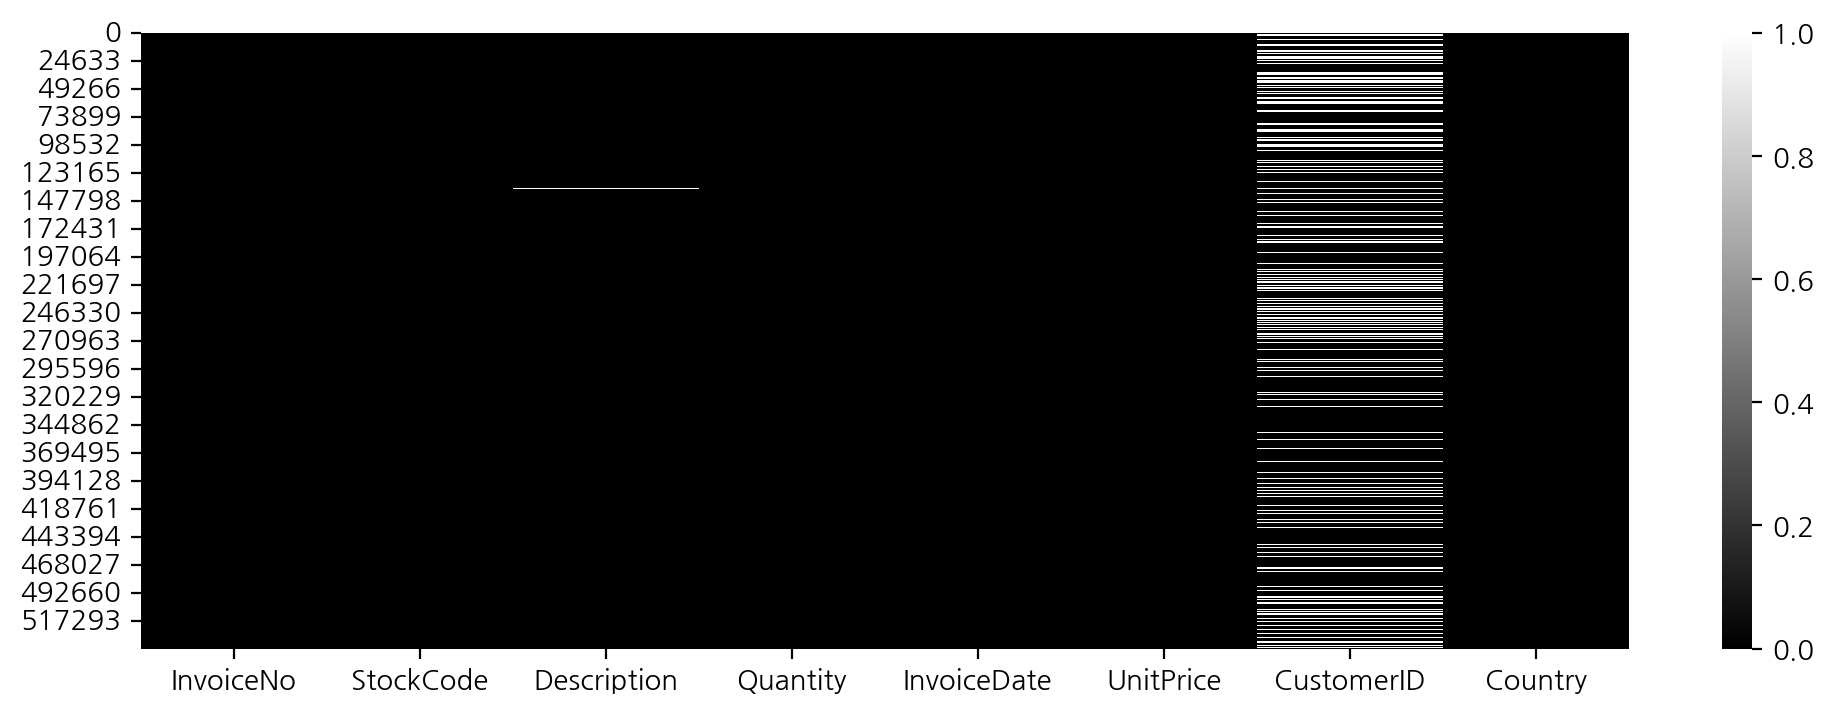

In [14]:
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), cmap= 'gray')

## histogram

In [15]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.689453
std       218.081158      96.759853    1713.600342
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

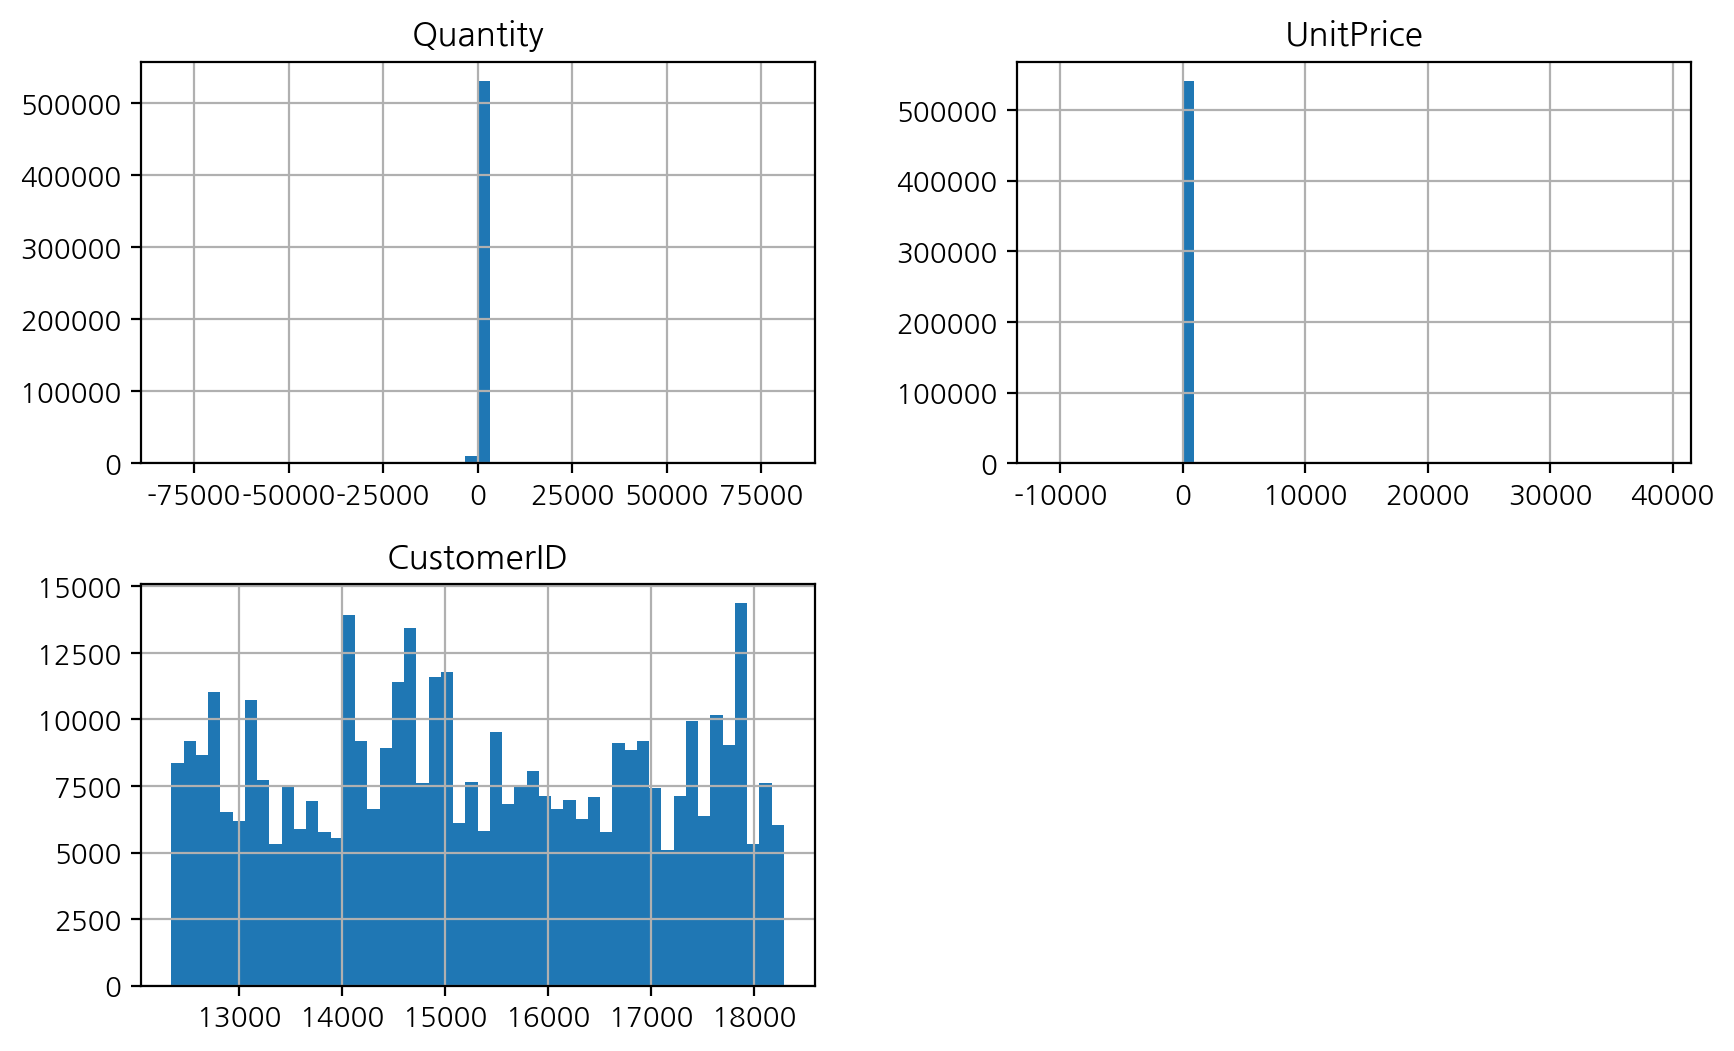

In [16]:
df.hist(figsize=(10, 6), bins = 50);
# 이상치 (값이 몰려있다.)

## 전체 주문 금액 컬럼

In [17]:
# TotalPrice는 RFM 중 MonetaryValue의 값이 된다.

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00

## 회원 vs 비회원 구매

In [18]:
df.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00

In [19]:
df['CustomerID'].isnull().value_counts(1) # normalize = True

CustomerID
False    0.750733
True     0.249267
Name: proportion, dtype: float64

In [20]:
# null
# df.loc[~df['CustomerID'].notnull(), "Country"].value_counts()
# notnull
df.loc[df['CustomerID'].notnull(), "Country"].value_counts()

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


- 빈도수가 많은 국가가 결측치도 많다.

In [21]:
# 회원 가입 여부
df['isRegistered'] = df['CustomerID'].notnull()
df.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   

   isRegistered  
0          True  
1          True  
2          True

In [22]:
pd.crosstab(df['Country'], df['isRegistered']).sort_values(True, ascending=False)

isRegistered           False   True 
Country                             
United Kingdom        133600  361878
Germany                    0    9495
France                    66    8491
EIRE                     711    7485
Spain                      0    2533
Netherlands                0    2371
Belgium                    0    2069
Switzerland              125    1877
Portugal                  39    1480
Australia                  0    1259
Norway                     0    1086
Italy                      0     803
Channel Islands            0     758
Finland                    0     695
Cyprus                     0     622
Sweden                     0     462
Austria                    0     401
Denmark                    0     389
Japan                      0     358
Poland                     0     341
USA                        0     291
Israel                    47     250
Unspecified              202     244
Singapore                  0     229
Iceland                    0     182
Canada                     0     151
Greece                     0     146
Malta                      0     127
United Arab Emirates       0      68
European Community         0      61
RSA                        0      58
Lebanon                    0      45
Lithuania                  0      35
Brazil                     0      32
Czech Republic             0      30
Bahrain                    2      17
Saudi Arabia               0      10
Hong Kong                288       0

## 구매 취소 비율

In [23]:
# Quantity가 0보다 작으면 True, 0보다 크다면 False 값으로 isCancel 컬럼을 생성
# df['isCancel']

df['InvoiceCode'] = df['InvoiceNo'].str.replace("[0-9]",  "", regex=True)
df['InvoiceCode'].value_counts()

InvoiceCode
     532618
C      9288
A         3
Name: count, dtype: int64

In [24]:
df["isCancel"] = (df["InvoiceCode"] == "C")

In [25]:
pd.crosstab(df['isRegistered'], df['InvoiceCode'])

InvoiceCode           A     C
isRegistered                 
False         134694  3   383
True          397924  0  8905

In [26]:
df[df["InvoiceCode"] == "A"]

# StockCode B?

InvoiceNo StockCode      Description  Quantity          InvoiceDate  \
299982   A563185         B  Adjust bad debt         1  2011-08-12 14:50:00   
299983   A563186         B  Adjust bad debt         1  2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1  2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  TotalPrice  isRegistered  \
299982   11062.06         NaN  United Kingdom    11062.06         False   
299983  -11062.06         NaN  United Kingdom   -11062.06         False   
299984  -11062.06         NaN  United Kingdom   -11062.06         False   

       InvoiceCode  isCancel  
299982           A     False  
299983           A     False  
299984           A     False

In [27]:
pd.crosstab(df['CustomerID'], df['isCancel'])

isCancel    False  True 
CustomerID              
12346.0         1      1
12347.0       182      0
12348.0        31      0
12349.0        73      0
12350.0        17      0
...           ...    ...
18280.0        10      0
18281.0         7      0
18282.0        12      1
18283.0       756      0
18287.0        70      0

[4372 rows x 2 columns]

In [28]:
df.groupby(['CustomerID','isCancel'])['InvoiceNo'].count().unstack()

isCancel    False  True 
CustomerID              
12346.0       1.0    1.0
12347.0     182.0    NaN
12348.0      31.0    NaN
12349.0      73.0    NaN
12350.0      17.0    NaN
...           ...    ...
18280.0      10.0    NaN
18281.0       7.0    NaN
18282.0      12.0    1.0
18283.0     756.0    NaN
18287.0      70.0    NaN

[4372 rows x 2 columns]

In [29]:
# 고객별 구매 취소 비율 상위 ID 10개
customer_cancel = pd.crosstab(df['CustomerID'], df['isCancel'])
customer_cancel.columns = ['정상','취소']
customer_cancel['취소비율'] = customer_cancel['취소'] / customer_cancel['정상']
customer_cancel.nlargest(10, '취소비율')

정상  취소  취소비율
CustomerID              
12503.0      0   1   inf
12505.0      0   1   inf
12605.0      0   3   inf
12666.0      0   2   inf
12870.0      0   2   inf
12943.0      0   1   inf
13154.0      0   1   inf
13693.0      0   4   inf
13829.0      0   1   inf
13958.0      0   5   inf

In [30]:
# 고객별 구매취소 빈도수 상위 ID 10개
customer_cancel.nlargest(10, "취소")

정상   취소      취소비율
CustomerID                     
14911.0     5677  226  0.039810
17841.0     7847  136  0.017331
17511.0      963  113  0.117342
15311.0     2379  112  0.047079
12607.0      101  101  1.000000
14410.0      194   93  0.479381
13798.0      349   90  0.257880
14606.0     2700   82  0.030370
13113.0      201   79  0.393035
12471.0      460   71  0.154348

- 정상구매가 많은 사람이 취소도 많이 한다.

## 특정 고객의 구매 건 조회

In [31]:
# 취소 건을 조회
# 취소 건은 InvocieNo에 C를 붙이고 Quantity를 마이너스로 표기되어 있습니다.
df[df['InvoiceCode'] == "C"].describe()

Quantity     UnitPrice    CustomerID     TotalPrice
count   9288.000000   9288.000000   8905.000000    9288.000000
mean     -29.885228     48.393661  14991.666992     -96.556039
std     1145.786965    666.600430   1706.772339    2039.905511
min   -80995.000000      0.010000  12346.000000 -168469.600000
25%       -6.000000      1.450000  13510.000000     -17.700000
50%       -2.000000      2.950000  14895.000000      -8.500000
75%       -1.000000      5.950000  16393.000000      -3.700000
max       -1.000000  38970.000000  18282.000000      -0.120000

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'TotalPrice'}>]], dtype=object)

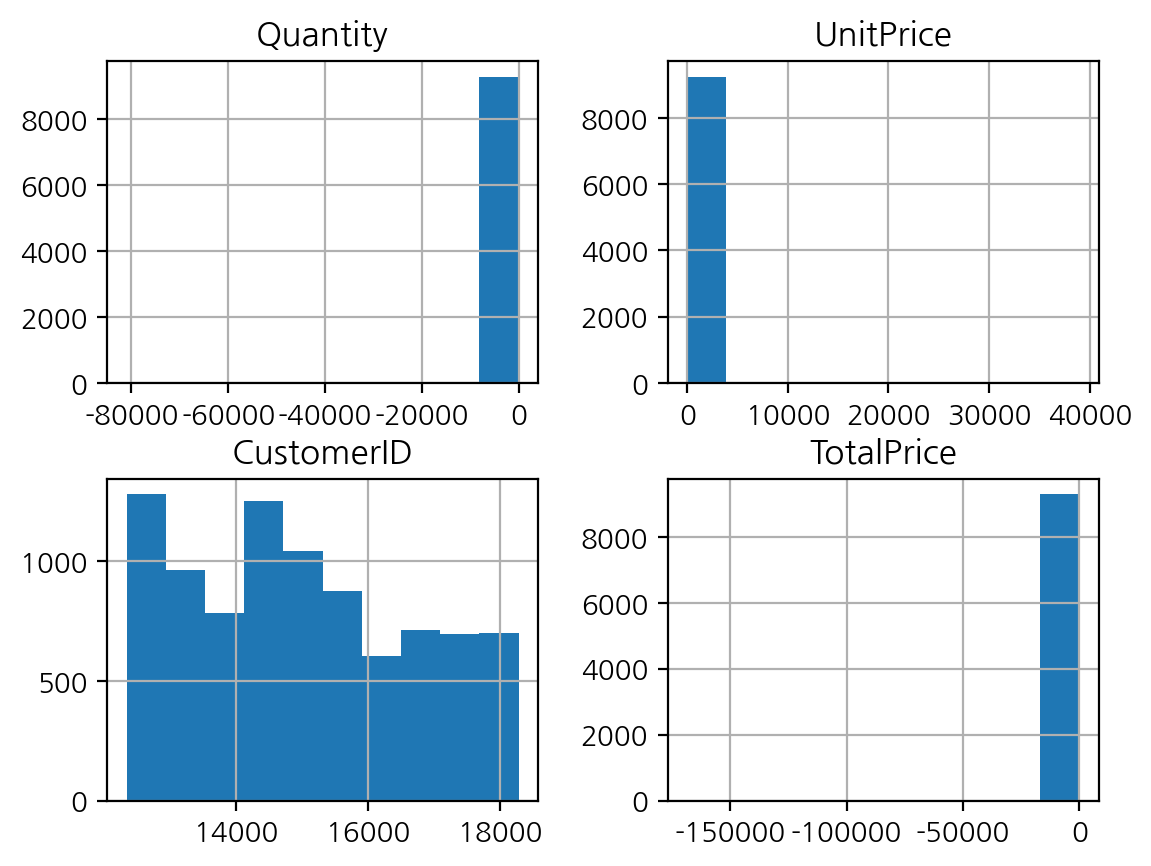

In [32]:
df[df['InvoiceCode'] == "C"].hist()

- 전처리할 때 0 이하 값은 제외하고 봐야 겠다

In [33]:
df[df['CustomerID'] == 14911]

InvoiceNo StockCode                          Description  Quantity  \
1404      536540     22968           ROSE COTTAGE KEEPSAKE BOX          4   
1405      536540    85071A  BLUE CHARLIE+LOLA PERSONAL DOORSIGN         6   
1406      536540    85071C    CHARLIE+LOLA"EXTREMELY BUSY" SIGN         6   
1407      536540     22355            CHARLOTTE BAG SUKI DESIGN        50   
1408      536540     21579      LOLITA  DESIGN  COTTON TOTE BAG         6   
...          ...       ...                                  ...       ...   
539151    581433     22192                BLUE DINER WALL CLOCK         2   
539152    581433     48187                  DOORMAT NEW ENGLAND         2   
539153    581433     48184                DOORMAT ENGLISH ROSE          2   
539154    581433     20685                DOORMAT RED RETROSPOT         2   
539155    581433    79302M               ART LIGHTS,FUNK MONKEY         6   

                InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
1404    2010-12-01 14:05:00       9.95     14911.0    EIRE        39.8   
1405    2010-12-01 14:05:00       2.95     14911.0    EIRE        17.7   
1406    2010-12-01 14:05:00       2.55     14911.0    EIRE        15.3   
1407    2010-12-01 14:05:00       0.85     14911.0    EIRE        42.5   
1408    2010-12-01 14:05:00       2.25     14911.0    EIRE        13.5   
...                     ...        ...         ...     ...         ...   
539151  2011-12-08 15:54:00       8.50     14911.0    EIRE        17.0   
539152  2011-12-08 15:54:00       8.25     14911.0    EIRE        16.5   
539153  2011-12-08 15:54:00       8.25     14911.0    EIRE        16.5   
539154  2011-12-08 15:54:00       8.25     14911.0    EIRE        16.5   
539155  2011-12-08 15:54:00       2.95     14911.0    EIRE        17.7   

        isRegistered InvoiceCode  isCancel  
1404            True                 False  
1405            True                 False  
1406            True                 False  
1407            True                 False  
1408            True                 False  
...              ...         ...       ...  
539151          True                 False  
539152          True                 False  
539153          True                 False  
539154          True                 False  
539155          True                 False  

[5903 rows x 12 columns]

## 제품별 구매 취소 비율

In [34]:
pd.crosstab(df['StockCode'], df['isCancel'])

isCancel      False  True 
StockCode                 
10002            73      0
10080            24      0
10120            30      0
10123C            4      0
10123G            1      0
...             ...    ...
gift_0001_20     10      0
gift_0001_30      8      0
gift_0001_40      3      0
gift_0001_50      4      0
m                 1      0

[4070 rows x 2 columns]

In [35]:
stock_cancel = pd.crosstab(df['StockCode'], df['isCancel'])
df_stock_desc = df[['StockCode','Description']].drop_duplicates().set_index('StockCode')

In [36]:
df_stock_desc[df_stock_desc.duplicated()]

Description
StockCode                                
82613C     METAL SIGN,CUPCAKE SINGLE HOOK
21134                                 NaN
22145                                 NaN
37509                                 NaN
85226A                                NaN
...                                   ...
22576                               check
23090                             missing
47591b           SCOTTIES CHILDRENS APRON
85175                                 NaN
23169                             smashed

[1528 rows x 1 columns]

In [37]:
df_stock_desc = df[['StockCode','Description']].drop_duplicates("StockCode").dropna().set_index('StockCode')
df_stock_desc[df_stock_desc.duplicated()]

Description
StockCode                                   
82613C        METAL SIGN,CUPCAKE SINGLE HOOK
10135           COLOURING PENCILS BROWN TUBE
15056bl              EDWARDIAN PARASOL BLACK
15056p                EDWARDIAN PARASOL PINK
47566b                TEA TIME PARTY BUNTING
...                                      ...
72802c     VANILLA SCENT CANDLE JEWELLED BOX
85049c               ROMANTIC PINKS RIBBONS 
85034b     3 WHITE CHOC MORRIS BOXED CANDLES
85179a               GREEN BITTY LIGHT CHAIN
47591b              SCOTTIES CHILDRENS APRON

[141 rows x 1 columns]

In [38]:
# merge, join, columns
stock_cancel.merge(df_stock_desc, left_index=True, right_index=True)

False  True                         Description
StockCode                                                    
10002            73     0         INFLATABLE POLITICAL GLOBE 
10080            24     0            GROOVY CACTUS INFLATABLE
10120            30     0                        DOGGY RUBBER
10123C            4     0               HEARTS WRAPPING TAPE 
10124A            5     0         SPOTS ON RED BOOKCOVER TAPE
...             ...   ...                                 ...
gift_0001_20     10     0  Dotcomgiftshop Gift Voucher £20.00
gift_0001_30      8     0  Dotcomgiftshop Gift Voucher £30.00
gift_0001_40      3     0  Dotcomgiftshop Gift Voucher £40.00
gift_0001_50      4     0  Dotcomgiftshop Gift Voucher £50.00
m                 1     0                              Manual

[3894 rows x 3 columns]

In [39]:
stock_cancel.join(df_stock_desc)

False  True                         Description
StockCode                                                    
10002            73     0         INFLATABLE POLITICAL GLOBE 
10080            24     0            GROOVY CACTUS INFLATABLE
10120            30     0                        DOGGY RUBBER
10123C            4     0               HEARTS WRAPPING TAPE 
10123G            1     0                                 NaN
...             ...   ...                                 ...
gift_0001_20     10     0  Dotcomgiftshop Gift Voucher £20.00
gift_0001_30      8     0  Dotcomgiftshop Gift Voucher £30.00
gift_0001_40      3     0  Dotcomgiftshop Gift Voucher £40.00
gift_0001_50      4     0  Dotcomgiftshop Gift Voucher £50.00
m                 1     0                              Manual

[4070 rows x 3 columns]

In [40]:
stock_cancel["Desc"] = df_stock_desc['Description']
stock_cancel

isCancel      False  True                                Desc
StockCode                                                    
10002            73     0         INFLATABLE POLITICAL GLOBE 
10080            24     0            GROOVY CACTUS INFLATABLE
10120            30     0                        DOGGY RUBBER
10123C            4     0               HEARTS WRAPPING TAPE 
10123G            1     0                                 NaN
...             ...   ...                                 ...
gift_0001_20     10     0  Dotcomgiftshop Gift Voucher £20.00
gift_0001_30      8     0  Dotcomgiftshop Gift Voucher £30.00
gift_0001_40      3     0  Dotcomgiftshop Gift Voucher £40.00
gift_0001_50      4     0  Dotcomgiftshop Gift Voucher £50.00
m                 1     0                              Manual

[4070 rows x 3 columns]

In [41]:
stock_cancel.columns = ['정상','취소','설명']
stock_cancel.nlargest(10, '정상')

정상   취소                                  설명
StockCode                                               
85123A     2271   42  WHITE HANGING HEART T-LIGHT HOLDER
85099B     2115   44             JUMBO BAG RED RETROSPOT
22423      2022  181            REGENCY CAKESTAND 3 TIER
47566      1707   20                       PARTY BUNTING
20725      1595   44             LUNCH BAG RED RETROSPOT
84879      1490   12       ASSORTED COLOUR BIRD ORNAMENT
22197      1426   50                SMALL POPCORN HOLDER
22720      1403   74   SET OF 3 CAKE TINS PANTRY DESIGN 
21212      1370   15     PACK OF 72 RETROSPOT CAKE CASES
20727      1328   22             LUNCH BAG  BLACK SKULL.

- stockcode 가 같아도 설명이 다 다를 수 있으나 무시하였다.(일단 전체적인 분석이였음)

# 유효한 데이터

## 고객 ID가 없는 주문과 취소 주문은 전체 데이터에서 제외

- 취소와 취소에 대한 본 주문건 제거
- 고객ID가 없는 건도 제거

In [42]:
df.shape

(541909, 12)

In [43]:
# "CustomerID" 가 있고(not null) "Quantity", "UnitPrice" 가 0보다 큰 데이터를 가져옵니다.
# 구매하고 취소한 건 중 취소한 건만 제외하고 구매 건은 남깁니다.
# 유효한 데이터를 df_valid 변수에 할당합니다.
df['CustomerID'].notnull()
df.loc[df['Quantity'] < 0, "InvoiceCode"].value_counts()

InvoiceCode
C    9288
     1336
Name: count, dtype: int64

In [44]:
# InvoiceNo가 숫자로만 되어 있는 것
df[(df['Quantity'] < 0) & (df["InvoiceCode"] != "C")]

InvoiceNo StockCode Description  Quantity          InvoiceDate  \
2406      536589     21777         NaN       -10  2010-12-01 16:50:00   
4347      536764    84952C         NaN       -38  2010-12-02 14:42:00   
7188      536996     22712         NaN       -20  2010-12-03 15:30:00   
7189      536997     22028         NaN       -20  2010-12-03 15:30:00   
7190      536998     85067         NaN        -6  2010-12-03 15:30:00   
...          ...       ...         ...       ...                  ...   
535333    581210     23395       check       -26  2011-12-07 18:36:00   
535335    581212     22578        lost     -1050  2011-12-07 18:38:00   
535336    581213     22576       check       -30  2011-12-07 18:38:00   
536908    581226     23090     missing      -338  2011-12-08 09:56:00   
538919    581422     23169     smashed      -235  2011-12-08 15:24:00   

        UnitPrice  CustomerID         Country  TotalPrice  isRegistered  \
2406          0.0         NaN  United Kingdom        -0.0         False   
4347          0.0         NaN  United Kingdom        -0.0         False   
7188          0.0         NaN  United Kingdom        -0.0         False   
7189          0.0         NaN  United Kingdom        -0.0         False   
7190          0.0         NaN  United Kingdom        -0.0         False   
...           ...         ...             ...         ...           ...   
535333        0.0         NaN  United Kingdom        -0.0         False   
535335        0.0         NaN  United Kingdom        -0.0         False   
535336        0.0         NaN  United Kingdom        -0.0         False   
536908        0.0         NaN  United Kingdom        -0.0         False   
538919        0.0         NaN  United Kingdom        -0.0         False   

       InvoiceCode  isCancel  
2406                   False  
4347                   False  
7188                   False  
7189                   False  
7190                   False  
...            ...       ...  
535333                 False  
535335                 False  
535336                 False  
536908                 False  
538919                 False  

[1336 rows x 12 columns]

In [45]:
df.loc[(df['Quantity'] < 0) & (df["InvoiceCode"] != "C"), "Description"].value_counts()

Description
check                        120
damages                       45
damaged                       42
?                             41
sold as set on dotcom         20
                            ... 
FRYING PAN BLUE POLKADOT       0
FRYING PAN PINK POLKADOT       0
FRYING PAN RED POLKADOT        0
FRYING PAN RED RETROSPOT       0
MEMO BOARD COTTAGE DESIGN      0
Name: count, Length: 4223, dtype: int64

In [46]:
df[df["Description"] == "MEMO BOARD COTTAGE DESIGN"]

InvoiceNo StockCode                Description  Quantity  \
3978      536742     22505  MEMO BOARD COTTAGE DESIGN         1   
5187      536846     22505  MEMO BOARD COTTAGE DESIGN         1   
6598      536960     22505  MEMO BOARD COTTAGE DESIGN         4   
7103      536988     22505  MEMO BOARD COTTAGE DESIGN         3   
7121      536989     22505  MEMO BOARD COTTAGE DESIGN         1   
...          ...       ...                        ...       ...   
528314    580729     22505  MEMO BOARD COTTAGE DESIGN         1   
534588    581164     22505  MEMO BOARD COTTAGE DESIGN         4   
535619    581217     22505  MEMO BOARD COTTAGE DESIGN         2   
538740    581414     22505  MEMO BOARD COTTAGE DESIGN         1   
541729    581570     22505  MEMO BOARD COTTAGE DESIGN         4   

                InvoiceDate  UnitPrice  CustomerID         Country  \
3978    2010-12-02 13:14:00       4.95     16916.0  United Kingdom   
5187    2010-12-02 19:59:00       4.95     14573.0  United Kingdom   
6598    2010-12-03 12:48:00       4.95     16477.0  United Kingdom   
7103    2010-12-03 15:05:00       4.95     17238.0  United Kingdom   
7121    2010-12-03 15:10:00       4.95     17238.0  United Kingdom   
...                     ...        ...         ...             ...   
528314  2011-12-05 17:24:00      10.79         NaN  United Kingdom   
534588  2011-12-07 14:34:00       4.95     14395.0  United Kingdom   
535619  2011-12-08 09:20:00      10.79         NaN  United Kingdom   
538740  2011-12-08 14:39:00       4.95     14730.0  United Kingdom   
541729  2011-12-09 11:59:00       4.95     12662.0         Germany   

        TotalPrice  isRegistered InvoiceCode  isCancel  
3978          4.95          True                 False  
5187          4.95          True                 False  
6598         19.80          True                 False  
7103         14.85          True                 False  
7121          4.95          True                 False  
...            ...           ...         ...       ...  
528314       10.79         False                 False  
534588       19.80          True                 False  
535619       21.58         False                 False  
538740        4.95          True                 False  
541729       19.80          True                 False  

[322 rows x 12 columns]

In [47]:
df.loc[(df['Quantity'] < 0) & (df["InvoiceCode"] != "C"), "Quantity"].describe()

count    1336.000000
mean     -154.907934
std       588.292456
min     -9600.000000
25%       -84.000000
50%       -30.000000
75%        -8.000000
max        -1.000000
Name: Quantity, dtype: float64

- C가 아님에도 수량이 음의 값이므로 제외하고 본다.
- 현실 세계에서 각 업무 담당자에게 문의하고 해당 데이터를 사용할지를 결정할 필요가 있습니다.

In [48]:
df['Quantity'] < 0

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: Quantity, Length: 541909, dtype: bool

In [49]:
df.loc[df['UnitPrice'] < 0, "InvoiceCode"].value_counts()

InvoiceCode
A    2
Name: count, dtype: int64

In [50]:
df.loc[df['UnitPrice'] < 0]

InvoiceNo StockCode      Description  Quantity          InvoiceDate  \
299983   A563186         B  Adjust bad debt         1  2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1  2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  TotalPrice  isRegistered  \
299983  -11062.06         NaN  United Kingdom   -11062.06         False   
299984  -11062.06         NaN  United Kingdom   -11062.06         False   

       InvoiceCode  isCancel  
299983           A     False  
299984           A     False

In [51]:
df_valid = df[(df['CustomerID'].notnull() )&
(df['Quantity'] > 0) &
(df['UnitPrice'] > 0)].copy()
df.shape, df_valid.shape

((541909, 12), (397884, 12))

In [52]:
# 고객 ID가 없는 것도 제거하여 df_valid 변수에 할당한다.
# 중복 데이터 제거
df_valid = df_valid.drop_duplicates().copy()
df_valid.shape

(392692, 12)

# 날짜와 시간

In [53]:
# InvoiceDate를 datetime 모듈을 통해 날짜형식으로 변환해 줍니다.
df_valid['InvoiceDate']

0         2010-12-01 08:26:00
1         2010-12-01 08:26:00
2         2010-12-01 08:26:00
3         2010-12-01 08:26:00
4         2010-12-01 08:26:00
                 ...         
541904    2011-12-09 12:50:00
541905    2011-12-09 12:50:00
541906    2011-12-09 12:50:00
541907    2011-12-09 12:50:00
541908    2011-12-09 12:50:00
Name: InvoiceDate, Length: 392692, dtype: category
Categories (23260, object): ['2010-12-01 08:26:00', '2010-12-01 08:28:00', '2010-12-01 08:34:00', '2010-12-01 08:35:00', ..., '2011-12-09 12:25:00', '2011-12-09 12:31:00', '2011-12-09 12:49:00', '2011-12-09 12:50:00']

In [54]:
df_valid['InvoiceDate'] = pd.to_datetime(df_valid['InvoiceDate'])

In [55]:
df_valid['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392692, dtype: datetime64[ns]

In [56]:
# year, month, day, dayofweek 를 InvoiceDate에서 추출하여 파생변수로 생성합니다.
df_valid['InvoiceYear'] = df_valid['InvoiceDate'].dt.year
df_valid['InvoiceMonth'] = df_valid['InvoiceDate'].dt.month
df_valid['InvoiceDay'] = df_valid['InvoiceDate'].dt.day
df_valid['InvoiceDow'] = df_valid['InvoiceDate'].dt.dayofweek
df_valid.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   isRegistered InvoiceCode  isCancel  InvoiceYear  InvoiceMonth  InvoiceDay  \
0          True                 False         2010            12           1   
1          True                 False         2010            12           1   

   InvoiceDow  
0           2  
1           2

In [57]:
# InvoiceDate에서 앞에서 7개문자만 가져오면([:7]) 연,월만 따로 생성합니다.
df_valid['InvoiceYM'] = df_valid['InvoiceDate'].astype(str).str[:7]
df_valid[['InvoiceDate', 'InvoiceYM']].sample(2)

InvoiceDate InvoiceYM
453601 2011-11-09 17:11:00   2011-11
489818 2011-11-22 13:29:00   2011-11

In [58]:
# InvoiceDate에서 time, hour에 대한 파생변수도 생성합니다.
df_valid['InvoiceTime'] = df_valid['InvoiceDate'].dt.time
df_valid['InvoiceHour'] = df_valid['InvoiceDate'].dt.hour
df_valid.head(1)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.3   

   isRegistered InvoiceCode  isCancel  InvoiceYear  InvoiceMonth  InvoiceDay  \
0          True                 False         2010            12           1   

   InvoiceDow InvoiceYM InvoiceTime  InvoiceHour  
0           2   2010-12    08:26:00            8

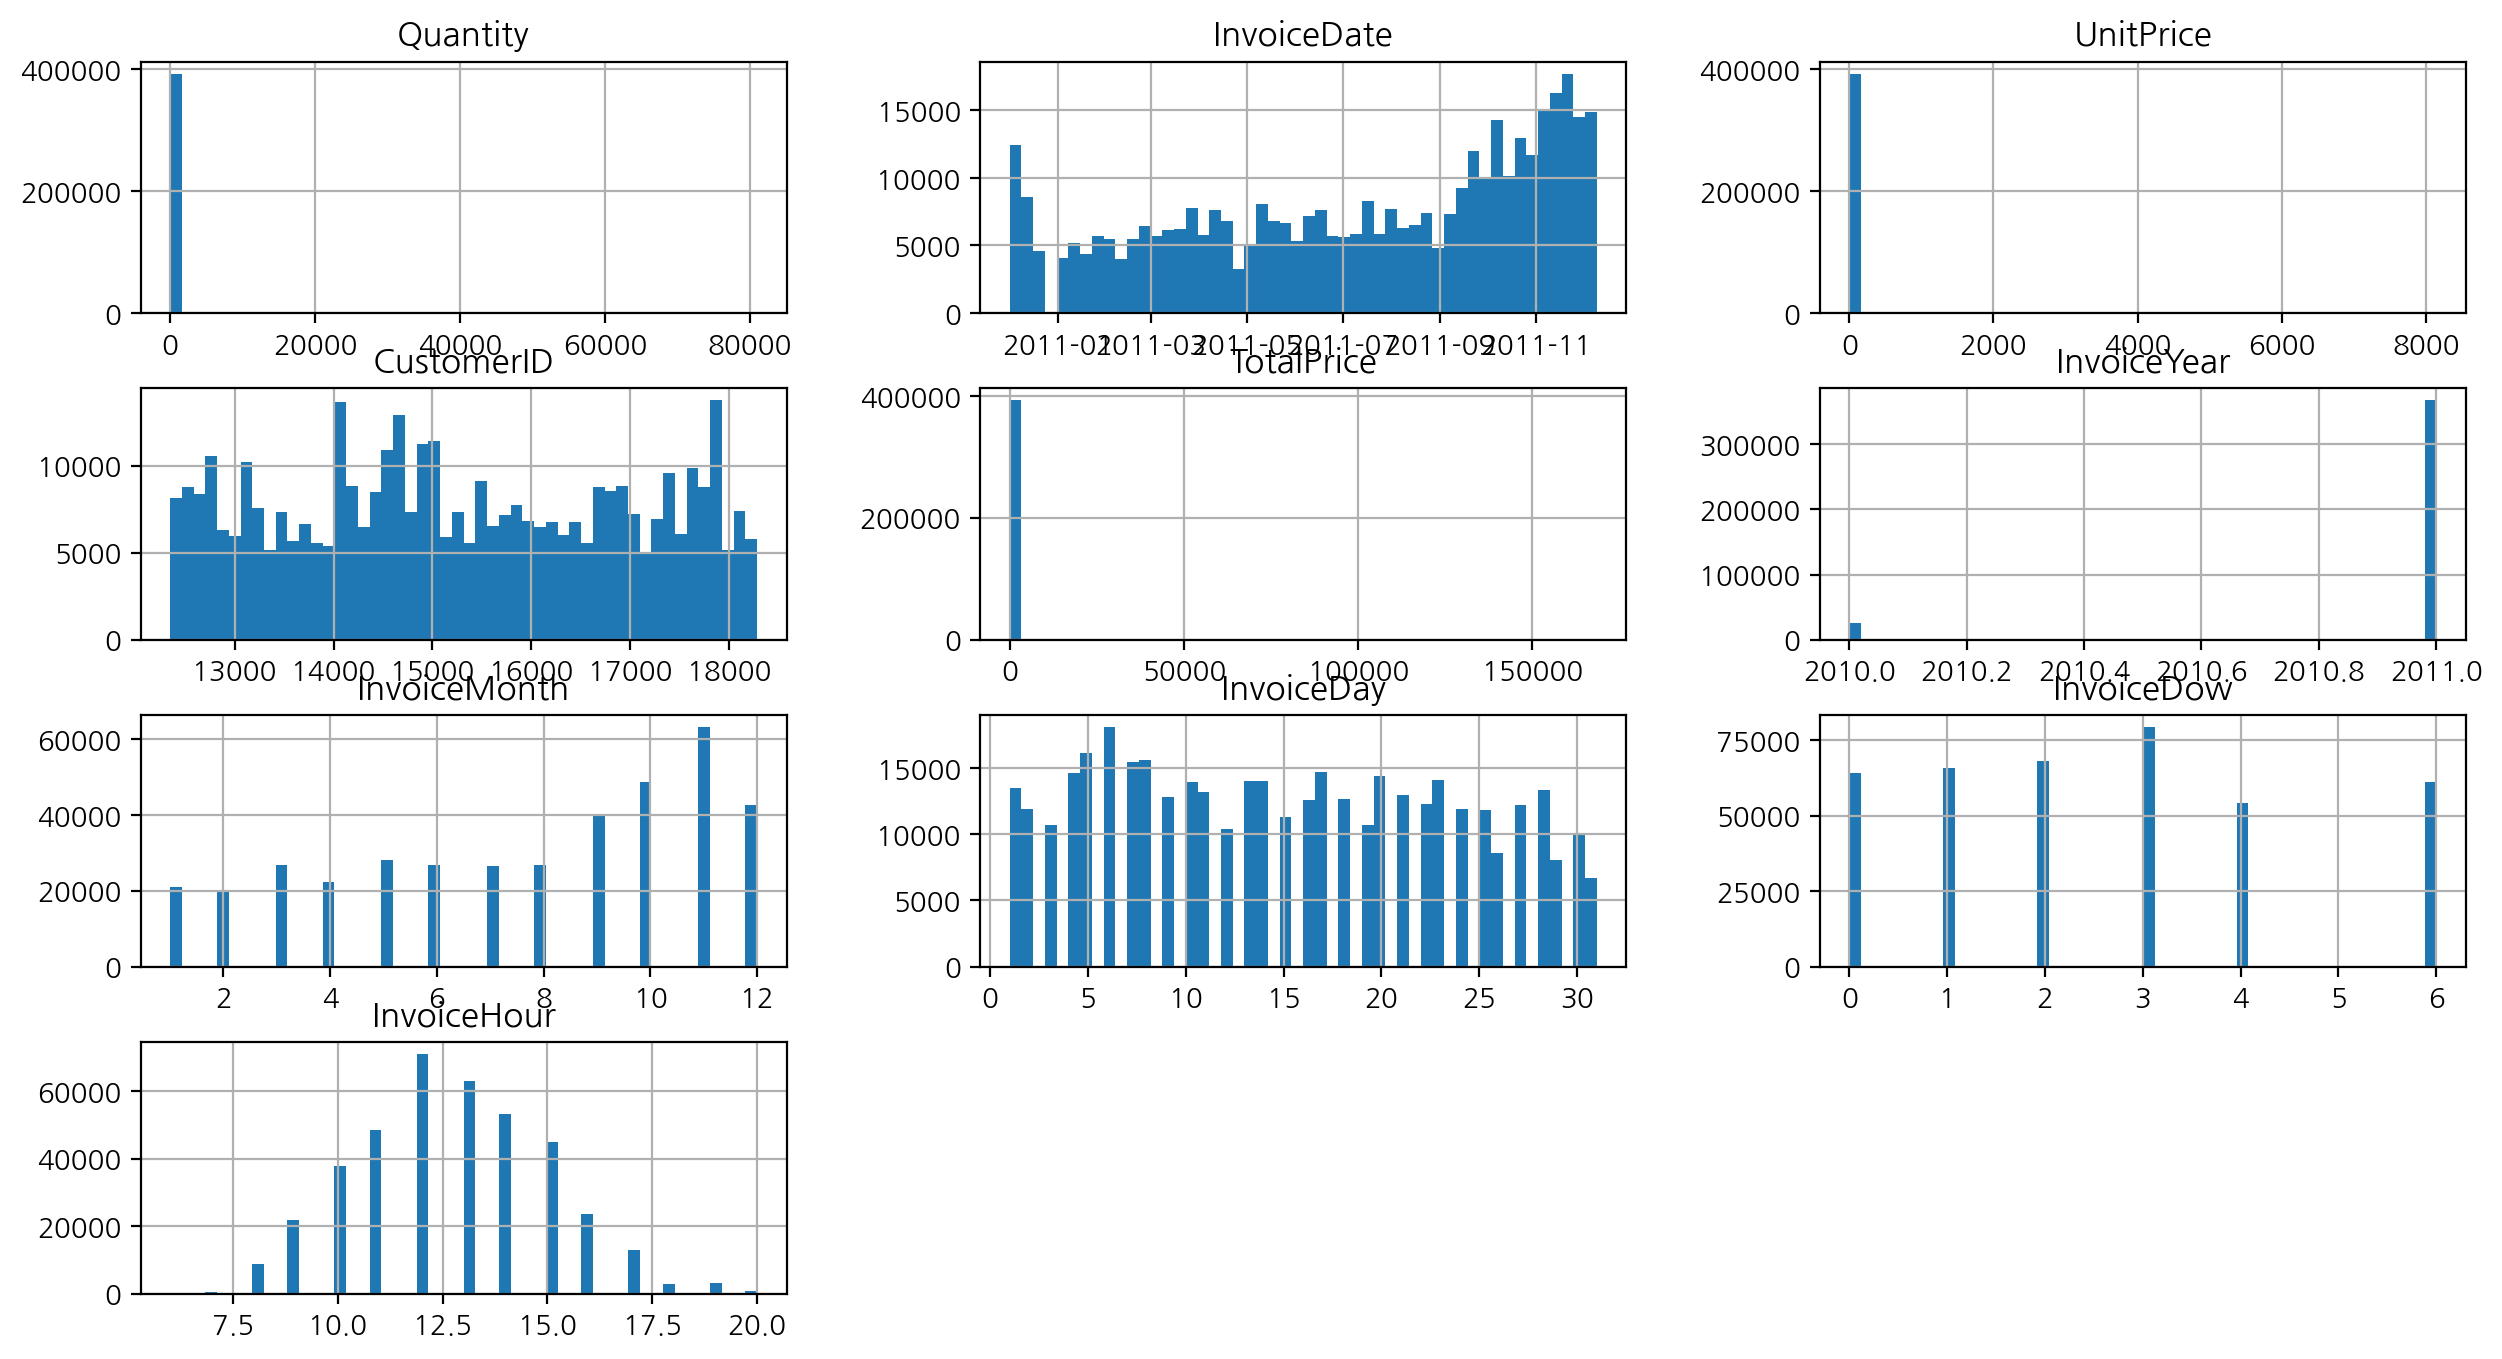

In [59]:
# hist
df_valid.hist(figsize=(15, 8), bins = 50);

- Quantity, UnitPrice는 이상치가 있다.
- InvoiceDate에 비어있는 부분이 있다.
- TotalPrice 또한 이상치가 있다.
- InvoiceYear에 2010 데이터는 적다
- InvoiceMonth 12월은 두 해가 있음에도 데이터가 적다.
- InvoiceDay는 31일인데 bin이 50이라 빠져보인다.
- 토요일 데이터가 거의 없다.
- 시간도 전체가 다 있지 않다.

<Axes: xlabel='InvoiceYear', ylabel='count'>

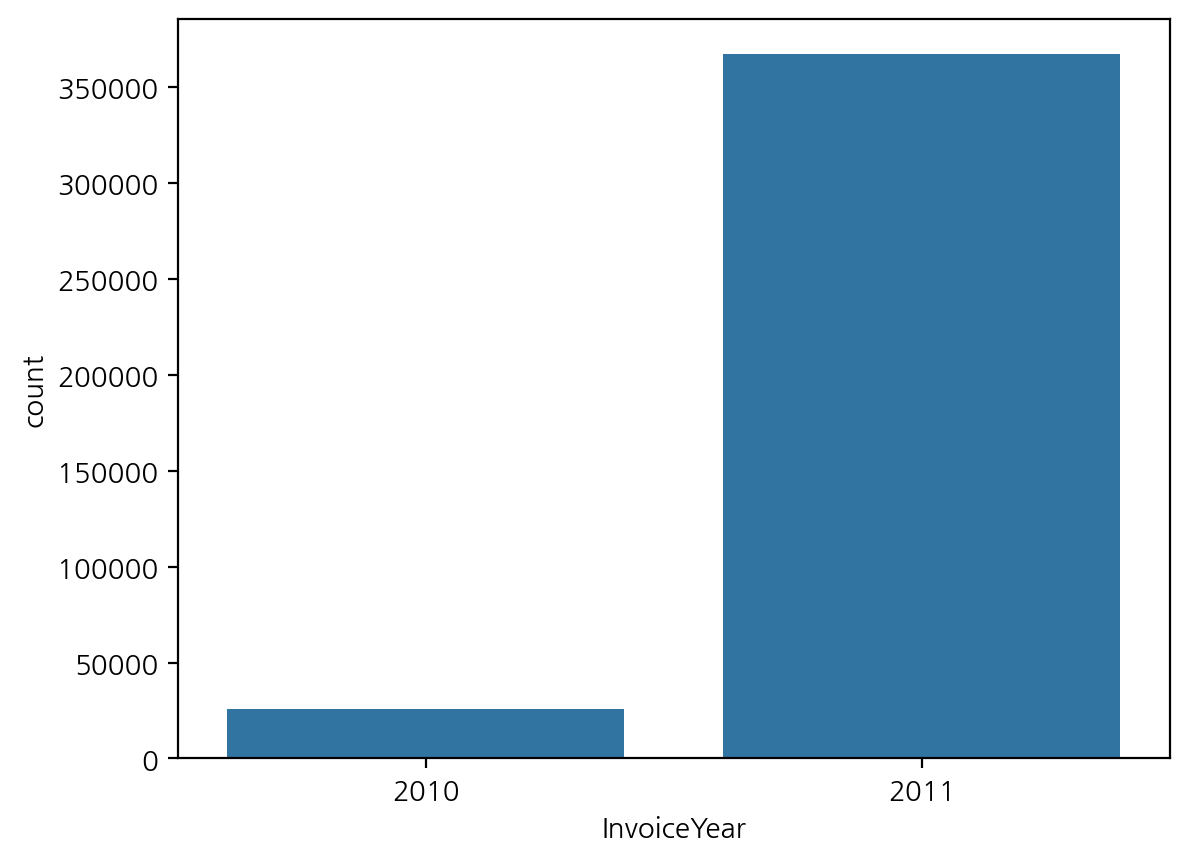

In [60]:
# countplot으로 연도별 구매 빈도수 시각화
sns.countplot(data = df_valid, x = 'InvoiceYear')

<Axes: xlabel='InvoiceMonth', ylabel='count'>

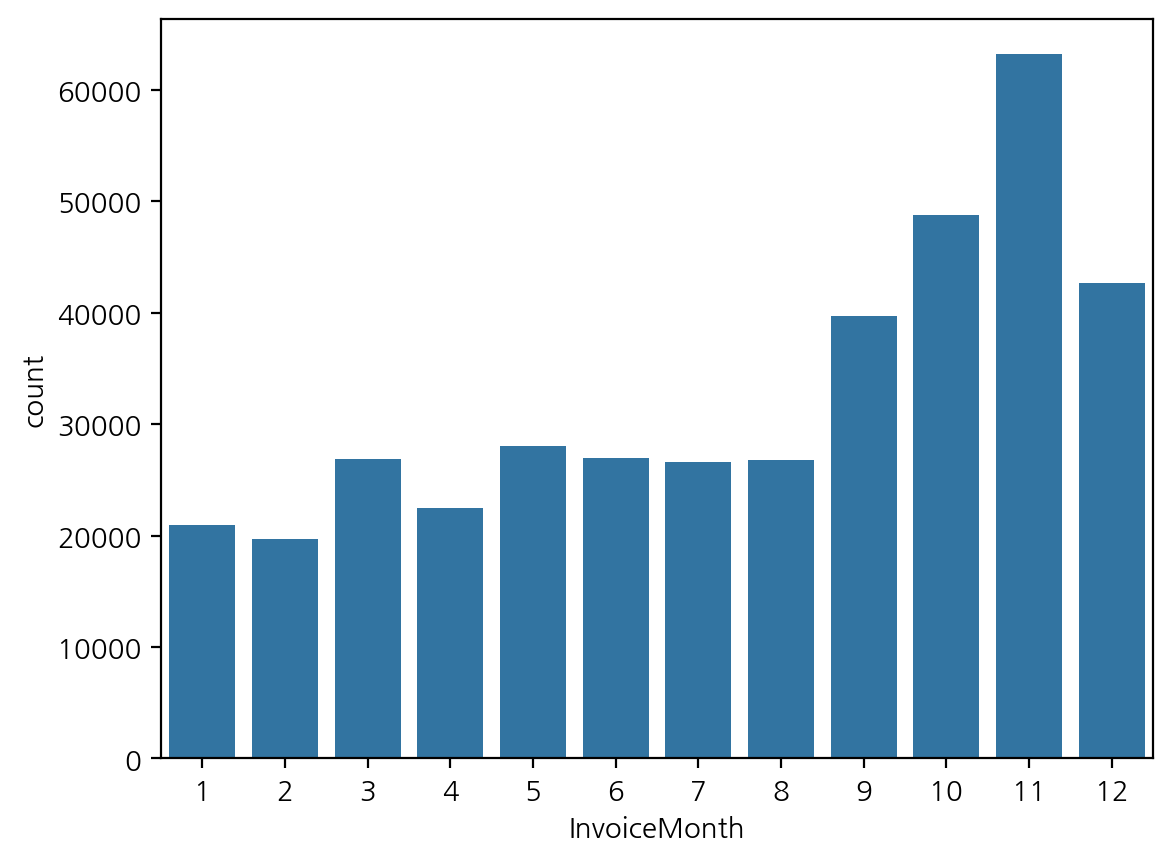

In [61]:
# countplot으로 월별 구매 빈도수 시각화
sns.countplot(data = df_valid, x = 'InvoiceMonth')

<Axes: xlabel='InvoiceMonth', ylabel='count'>

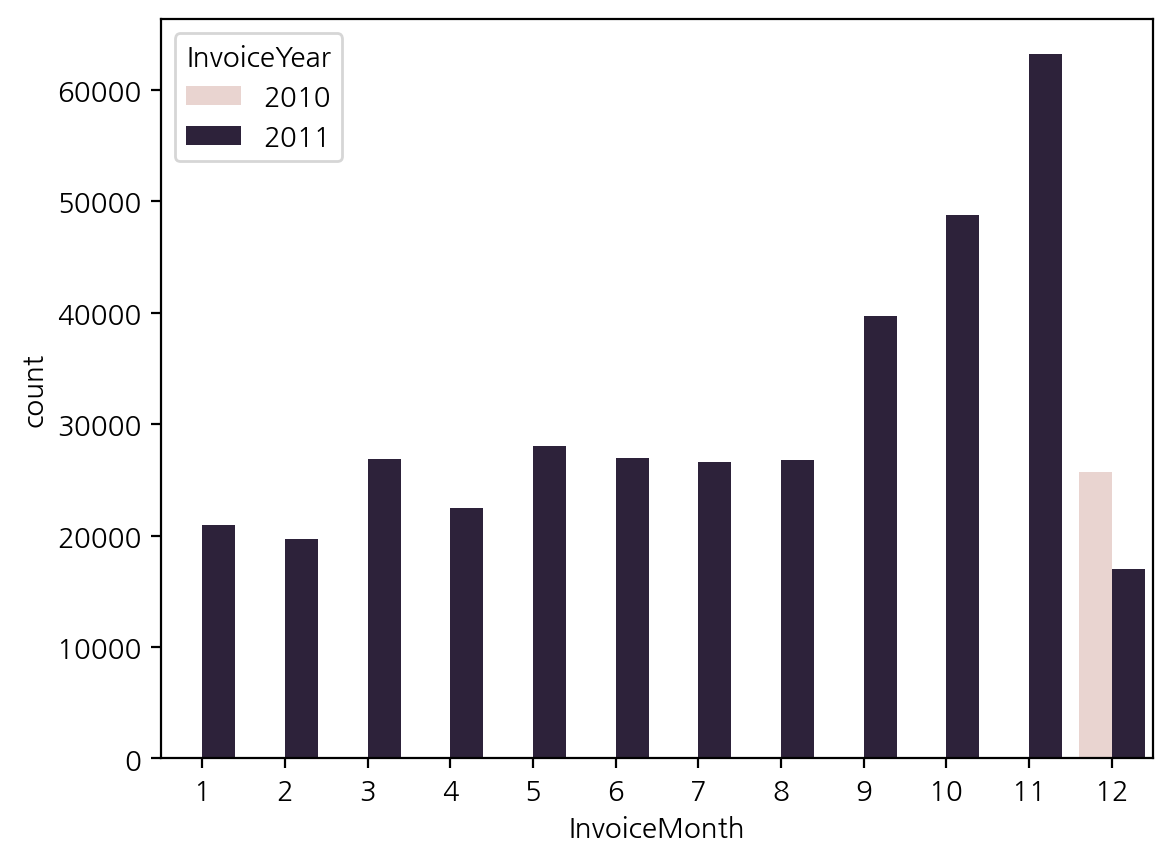

In [62]:
# countplot으로 연도-월별 구매 빈도수 시각화
sns.countplot(data = df_valid, x = 'InvoiceMonth', hue = 'InvoiceYear')

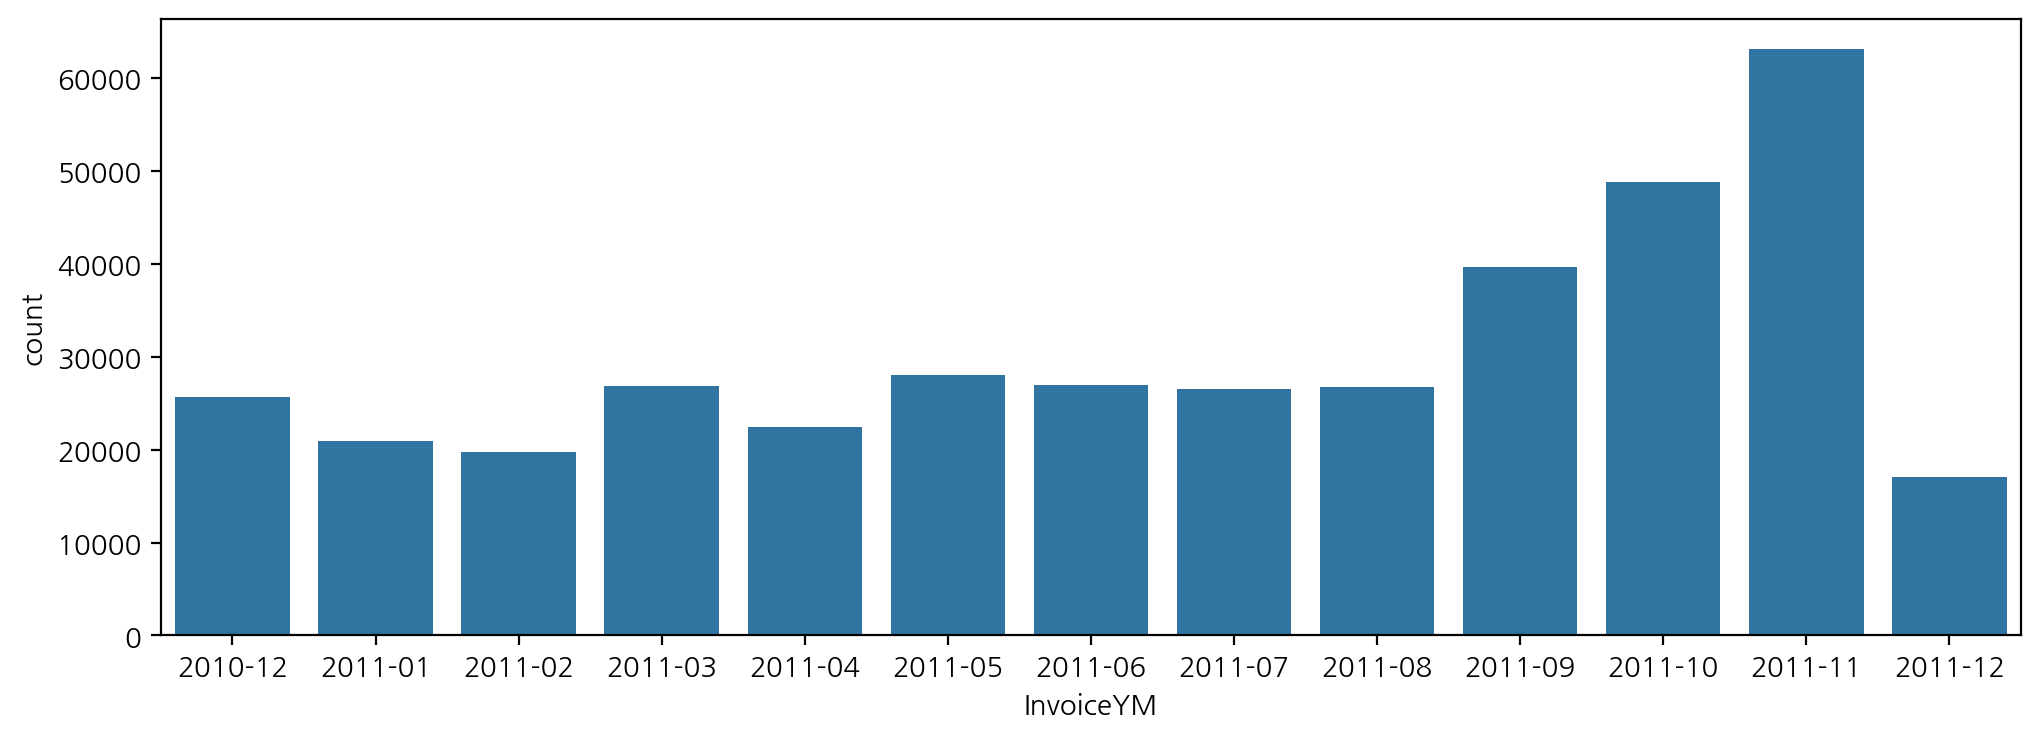

In [63]:
plt.figure(figsize=(12, 4))
sns.countplot(data = df_valid, x = 'InvoiceYM');

## 요일별 빈도수

<Axes: xlabel='InvoiceDow', ylabel='count'>

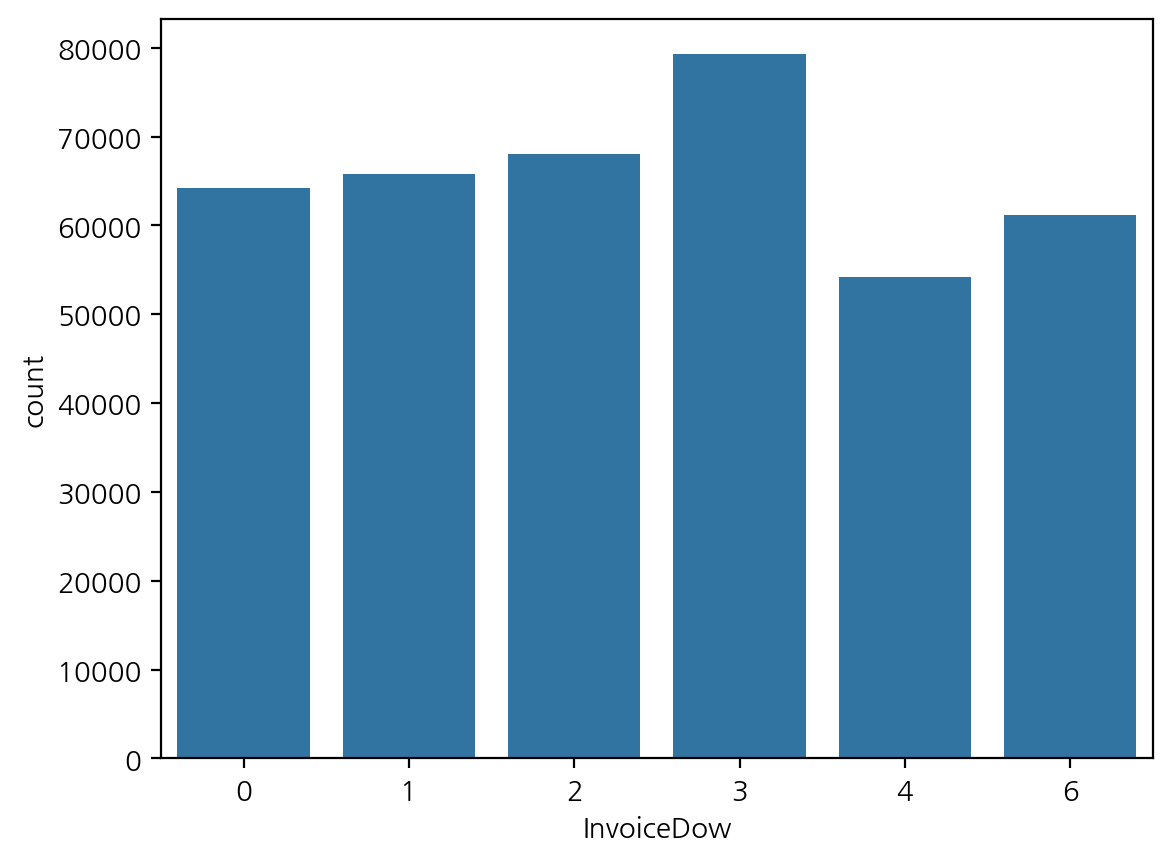

In [64]:
# countplot으로 요일별 구매 빈도수 시각화합니다.
sns.countplot(data = df_valid, x= 'InvoiceDow')

In [65]:
# "월-일"요일 문자열을 리스트로 만듭니다.
day_name = [w for w in "월화수목금토일"]
day_name.remove('토')
day_name

['월', '화', '수', '목', '금', '일']

In [66]:
df_valid['InvoiceDow'].value_counts().sort_index()

InvoiceDow
0    64231
1    65744
2    68040
3    79243
4    54222
6    61212
Name: count, dtype: int64

In [67]:
# 요일별 구매 빈도수를 구합니다.
dow_count = df_valid['InvoiceDow'].value_counts().sort_index()
dow_count.index = day_name
dow_count

월    64231
화    65744
수    68040
목    79243
금    54222
일    61212
Name: count, dtype: int64

<Axes: >

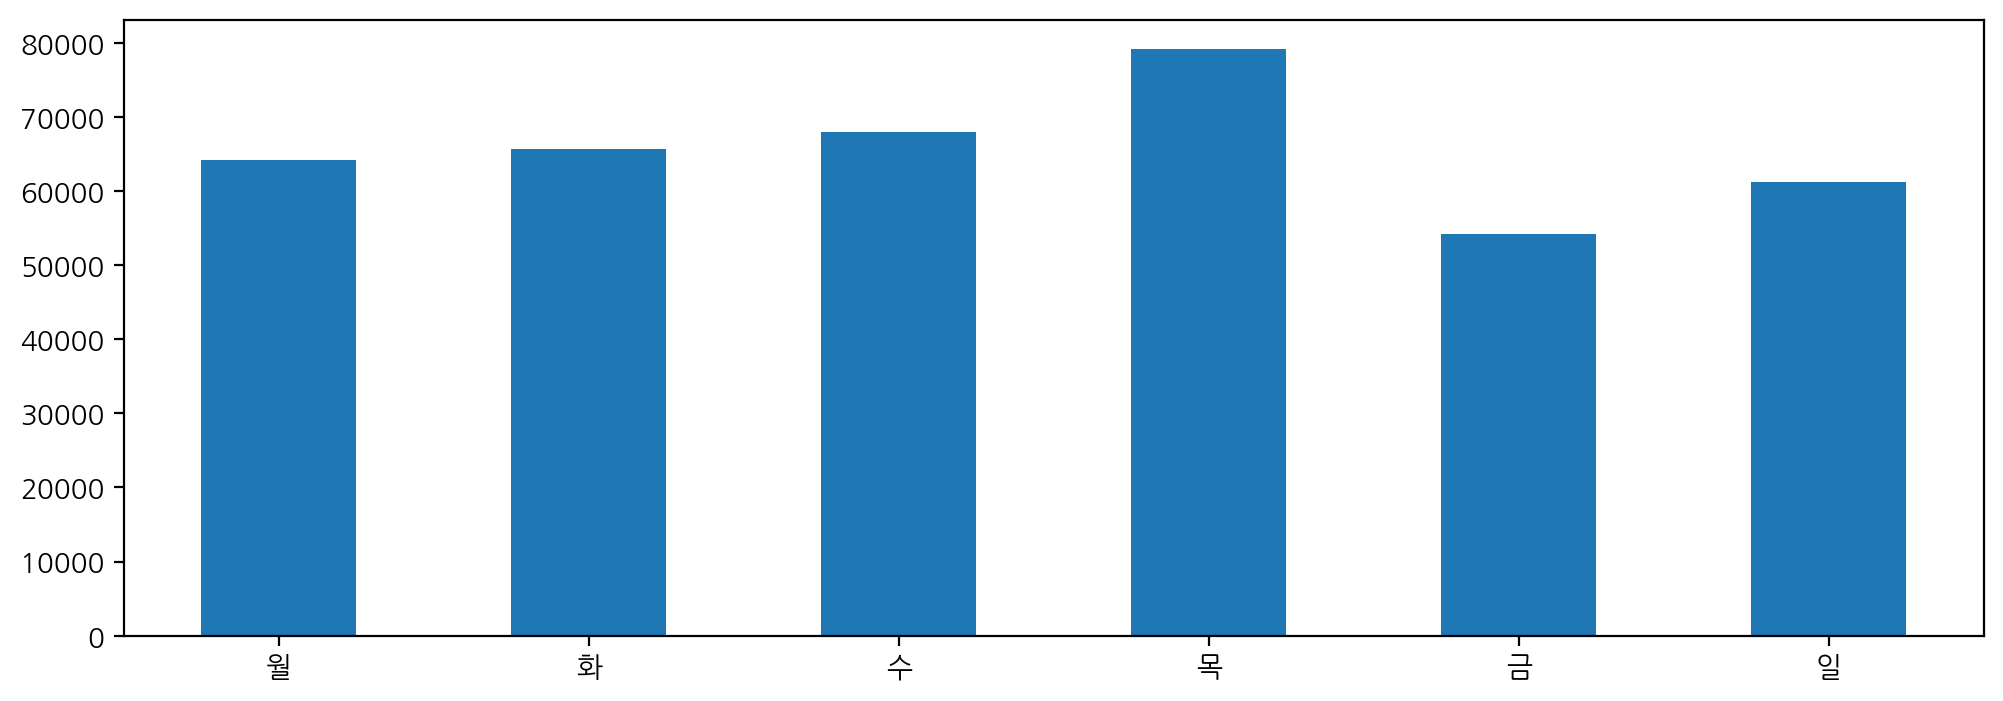

In [68]:
dow_count.plot.bar(figsize = (12, 4), rot = 0)

In [69]:
"월화수목금토일"[0]

'월'

<Axes: xlabel='InvoiceDayName', ylabel='count'>

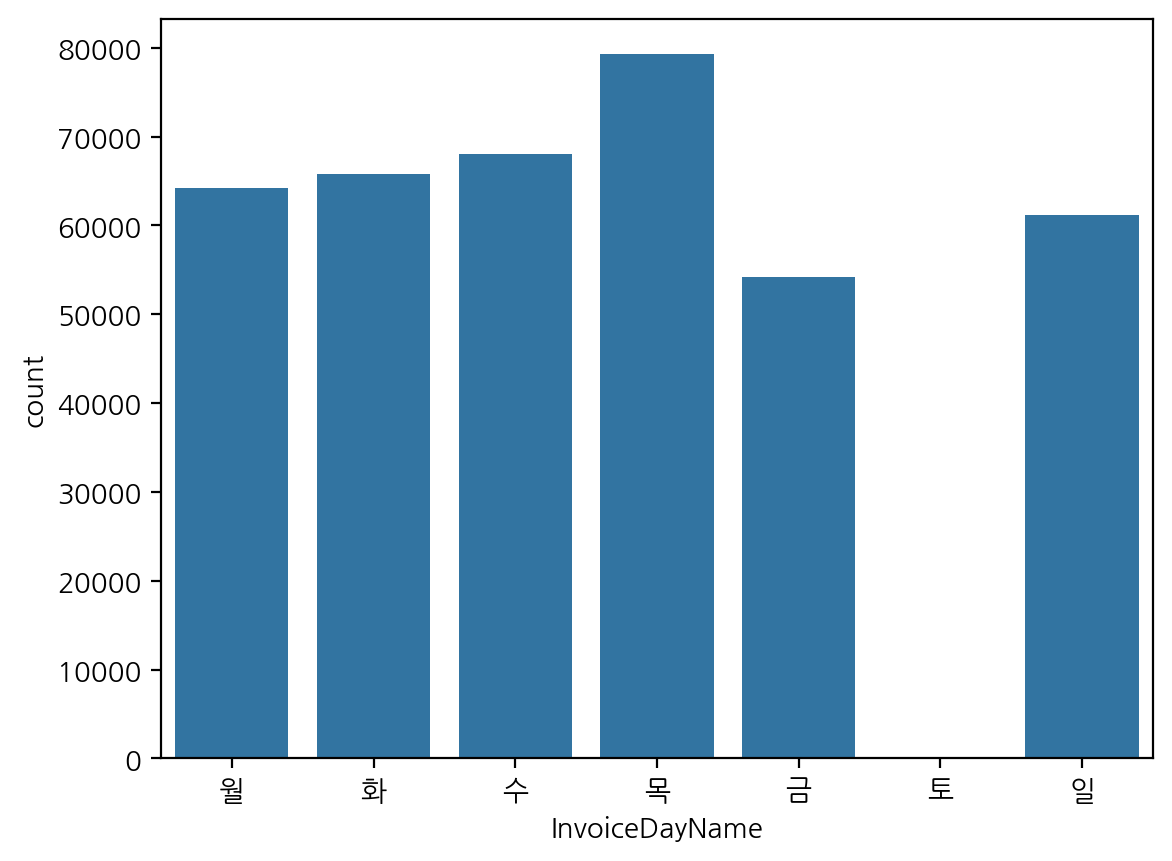

In [70]:
df_valid["InvoiceDayName"] = df_valid['InvoiceDow'].map(lambda x:"월화수목금토일"[x])
sns.countplot(data = df_valid, x= 'InvoiceDayName', order = list("월화수목금토일"))

<Axes: xlabel='InvoiceHour', ylabel='count'>

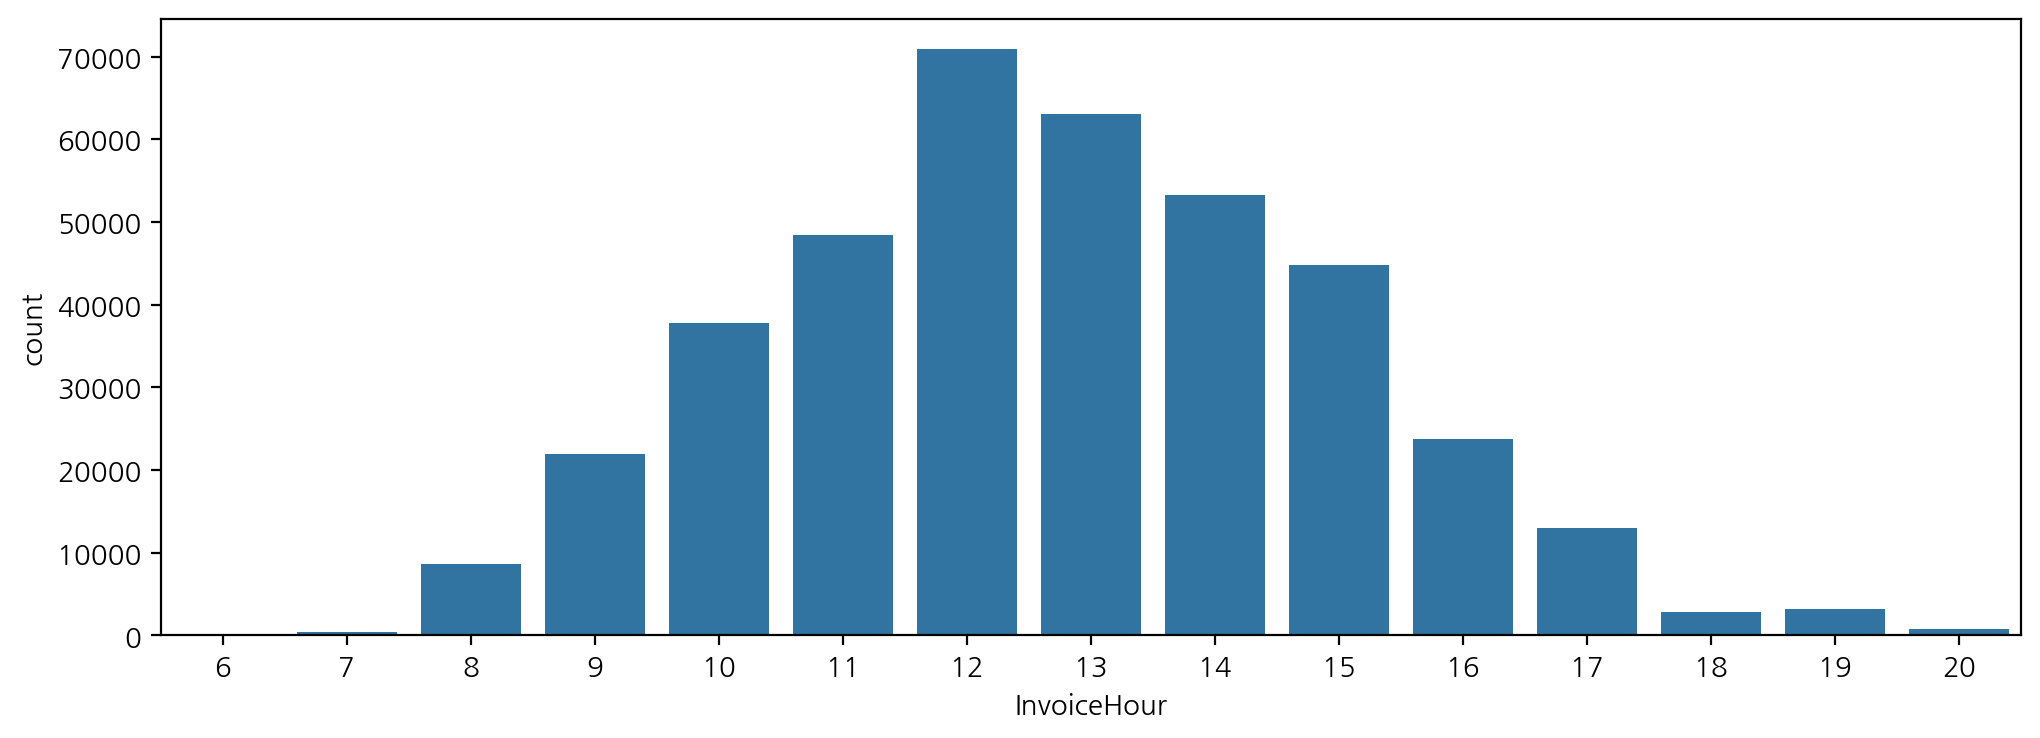

In [71]:
# 시간대별 구매 빈도수를 시각화
plt.figure(figsize=(12,4))
sns.countplot(data = df_valid, x = "InvoiceHour")

Text(0.5, 1.0, '시간대별 주문량')

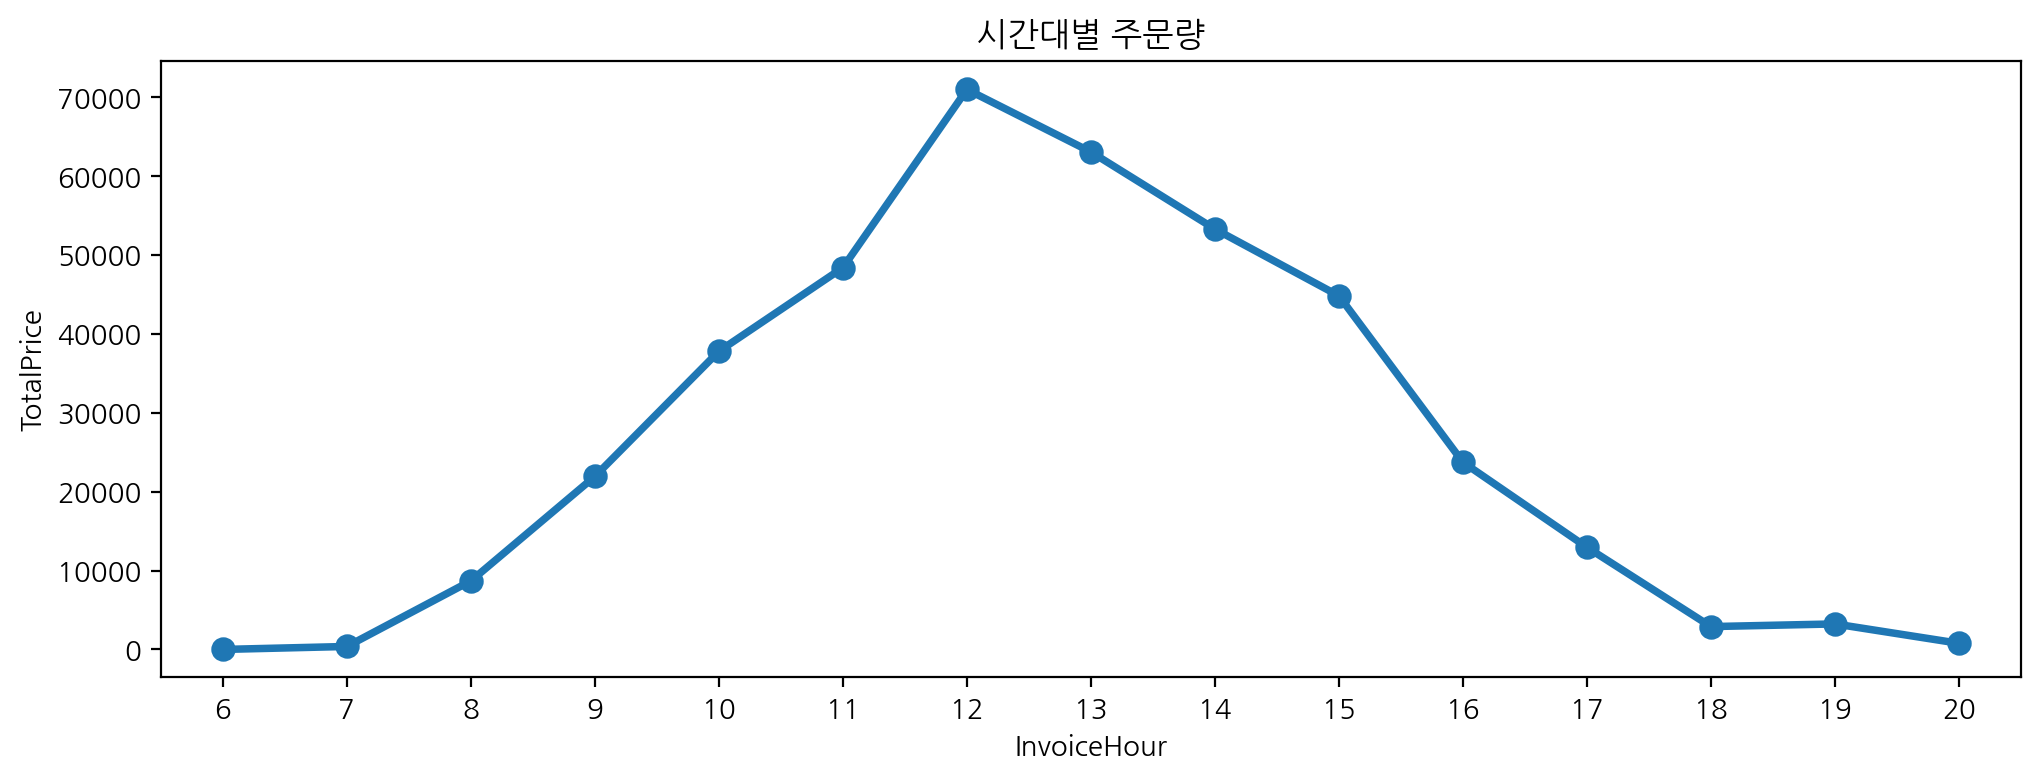

In [72]:
# pointplot으로 시각대 구매 빈도수를 시각화
plt.figure(figsize = (12,4))
sns.pointplot(data = df_valid, x = "InvoiceHour",
            y = "TotalPrice", estimator=len, errorbar=None).set_title('시간대별 주문량')

Text(0.5, 1.0, '시간대별 매출액')

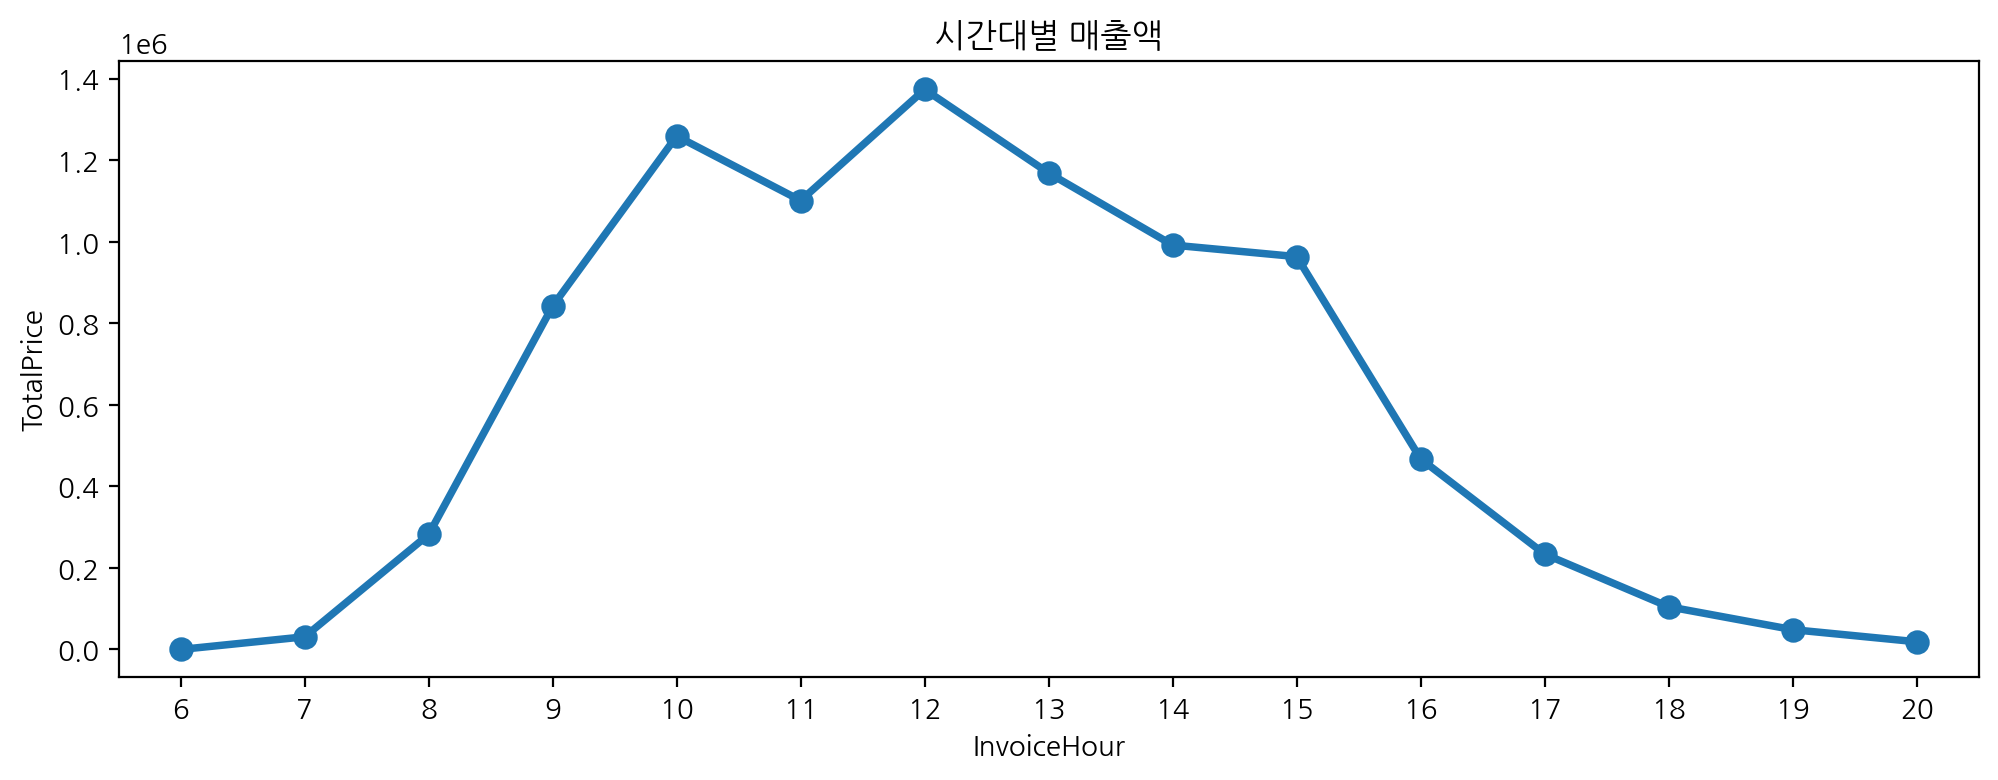

In [73]:
plt.figure(figsize = (12,4))
sns.pointplot(data = df_valid, x = "InvoiceHour", y = "TotalPrice",
            estimator='sum', errorbar=None).set_title('시간대별 매출액')

## 시간별-요일별 빈도수

In [74]:
list("월화수목금일")

['월', '화', '수', '목', '금', '일']

In [75]:
# 시간별, 요일별로 crosstab을 통해 구매 빈도수 구합니다.
# "월화수목금일"요일 문자열을 리스트를 컬럼명으로 대체
hour_dow = pd.crosstab(df_valid['InvoiceHour'], df_valid['InvoiceDayName'])
hour_dow = hour_dow[list("월화수목금일")]
hour_dow

InvoiceDayName      월      화      수      목     금      일
InvoiceHour                                            
6                   0      0      0      1     0      0
7                  61     65     59     64   130      0
8                1563   1710   1818   1763  1833      0
9                4345   4542   4078   4569  4368     25
10               6106   6575   6927   7528  7161   3476
11               7401   8418   8292   7134  7189   9931
12              10585  11903  12684  12908  9765  13093
13              10459  10274  11137  11446  8300  11403
14               9119   9428   8716   9173  7227   9588
15               7634   7219   7752   7616  4682   9887
16               3999   3592   4197   6031  2087   3809
17               2959   1951   2348   4300  1383      0
18                  0     67      0   2826     2      0
19                  0      0     14   3131    88      0
20                  0      0     18    753     7      0

In [76]:
# print(plt.colormaps())

In [77]:
# .style.background_gradient()를 통해서 시각화
# pip install Jinja2
hour_dow.style.background_gradient(axis= None, cmap="autumn_r").format("{:,}")

<Axes: xlabel='InvoiceDayName', ylabel='InvoiceHour'>

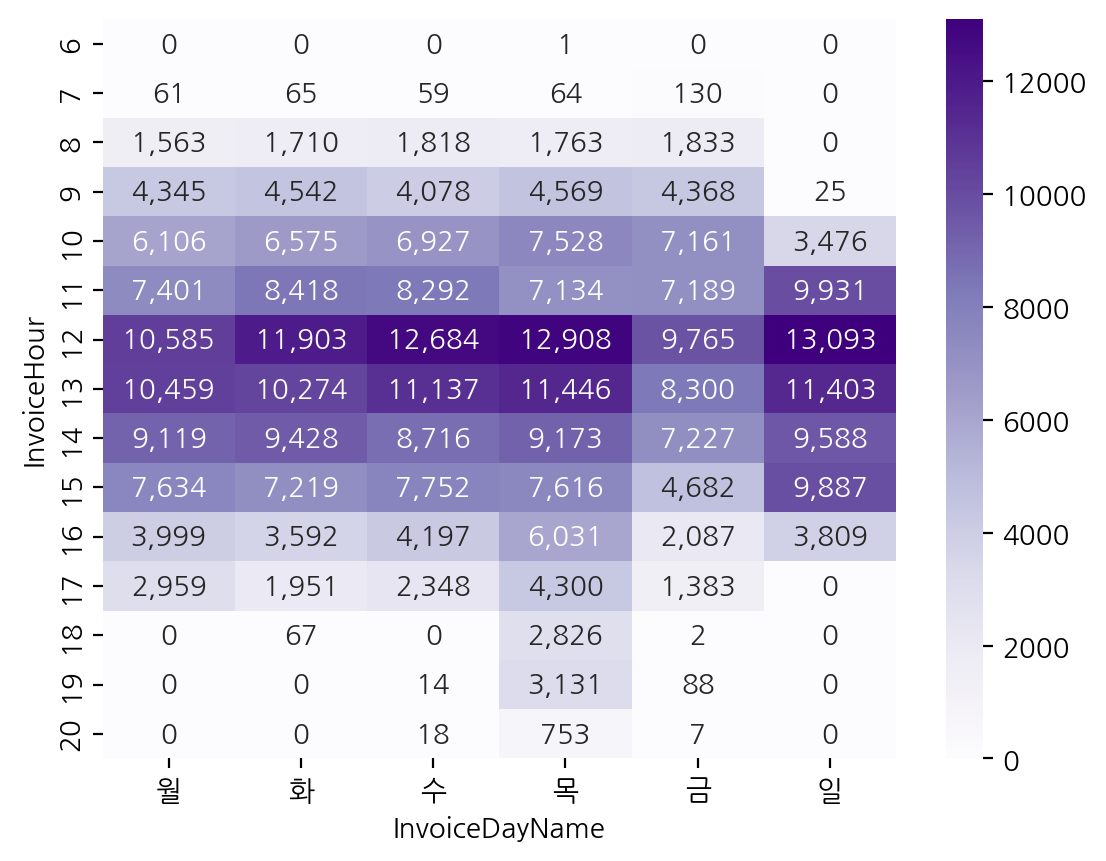

In [78]:
# 시간별_요일별 구매 주문 시각화
sns.heatmap(hour_dow, cmap ="Purples", annot = True, fmt=",.0f")

<Figure size 1200x800 with 0 Axes>

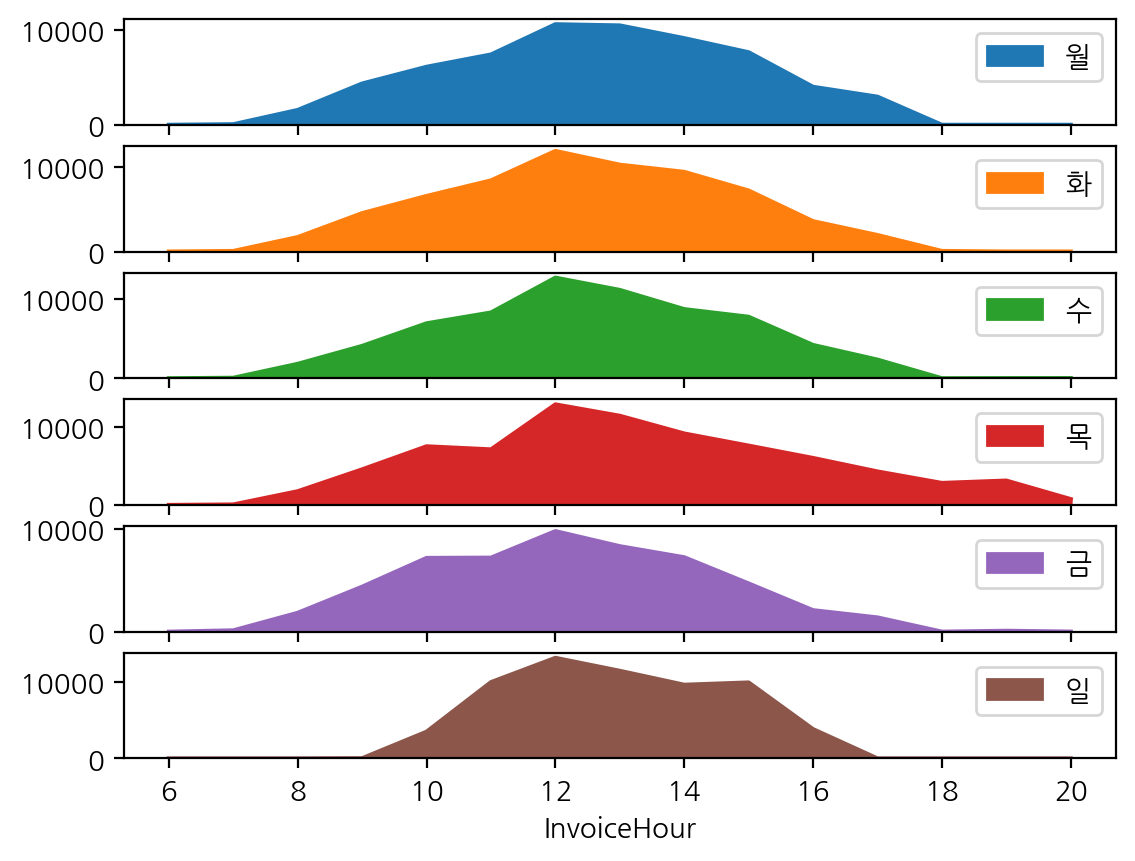

In [79]:
# 시간별_요일별 구매 주문 subplot을 통해 요일별 시각화
plt.figure(figsize=(12, 8))
hour_dow.plot(subplots=True, kind = 'area');

# 고객

- ARPU(Average Revenue Per User):
  - 가입한 서비스에 대해 가입자 1명이 특정 기간 동안 지출한 평균 금액
  - ARPU = 매출 / 중복을 제외한 순수 활동 사용자 수
- ARPPU(Average Revenue Per Paying User):
  - 지불 유저 1명 당 한 달에 결제하는 평균 금액을 산정한 수치

In [80]:
# ARPPU - CustomerID 를 사용할 때는 count가 아닌 nuique를 사용합니다.
# arppu

df_valid.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   isRegistered InvoiceCode  isCancel  InvoiceYear  InvoiceMonth  InvoiceDay  \
0          True                 False         2010            12           1   
1          True                 False         2010            12           1   
2          True                 False         2010            12           1   
3          True                 False         2010            12           1   
4          True                 False         2010            12           1   

   InvoiceDow InvoiceYM InvoiceTime  InvoiceHour InvoiceDayName  
0           2   2010-12    08:26:00            8              수  
1           2   2010-12    08:26:00            8              수  
2           2   2010-12    08:26:00            8              수  
3           2   2010-12    08:26:00            8              수  
4           2   2010-12    08:26:00            8              수

In [81]:
arppu = df_valid.groupby(['InvoiceYM']).agg({"TotalPrice": 'sum',
                                            'CustomerID': "nunique"})
arppu['ARPPU'] = arppu['TotalPrice'] / arppu['CustomerID']
arppu

TotalPrice  CustomerID       ARPPU
InvoiceYM                                     
2010-12     570422.730         885  644.545458
2011-01     568101.310         741  766.668435
2011-02     446084.920         758  588.502533
2011-03     594081.760         974  609.940205
2011-04     468374.331         856  547.166275
2011-05     677355.150        1056  641.434801
2011-06     660046.050         991  666.040414
2011-07     598962.901         949  631.151634
2011-08     644051.040         935  688.824642
2011-09     950690.202        1266  750.940128
2011-10    1035642.450        1364  759.268658
2011-11    1156205.610        1664  694.835102
2011-12     517190.440         615  840.960065

<Axes: title={'center': '매출액'}, xlabel='InvoiceYM'>

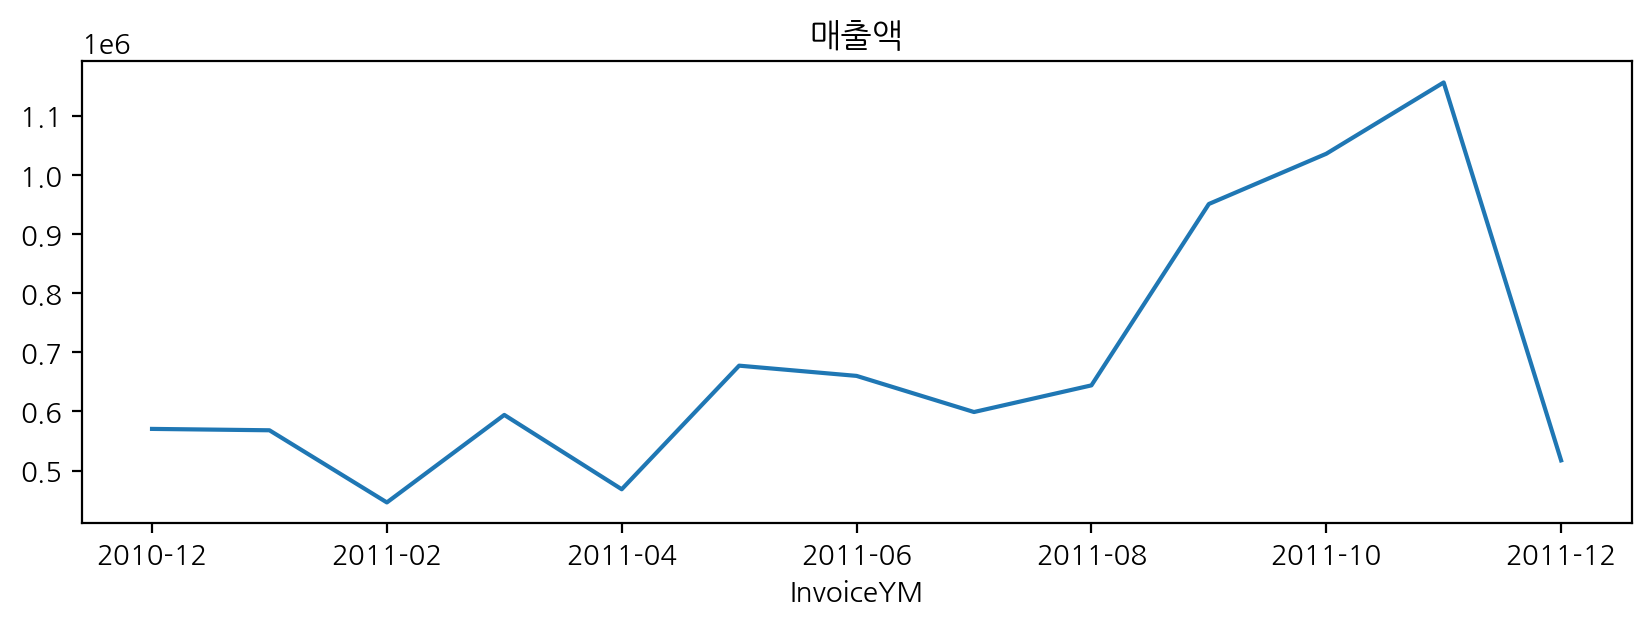

In [82]:
arppu['TotalPrice'].plot(figsize=(10, 3), title = "매출액")

<Axes: title={'center': '월별 고객 수 MAU'}, xlabel='InvoiceYM'>

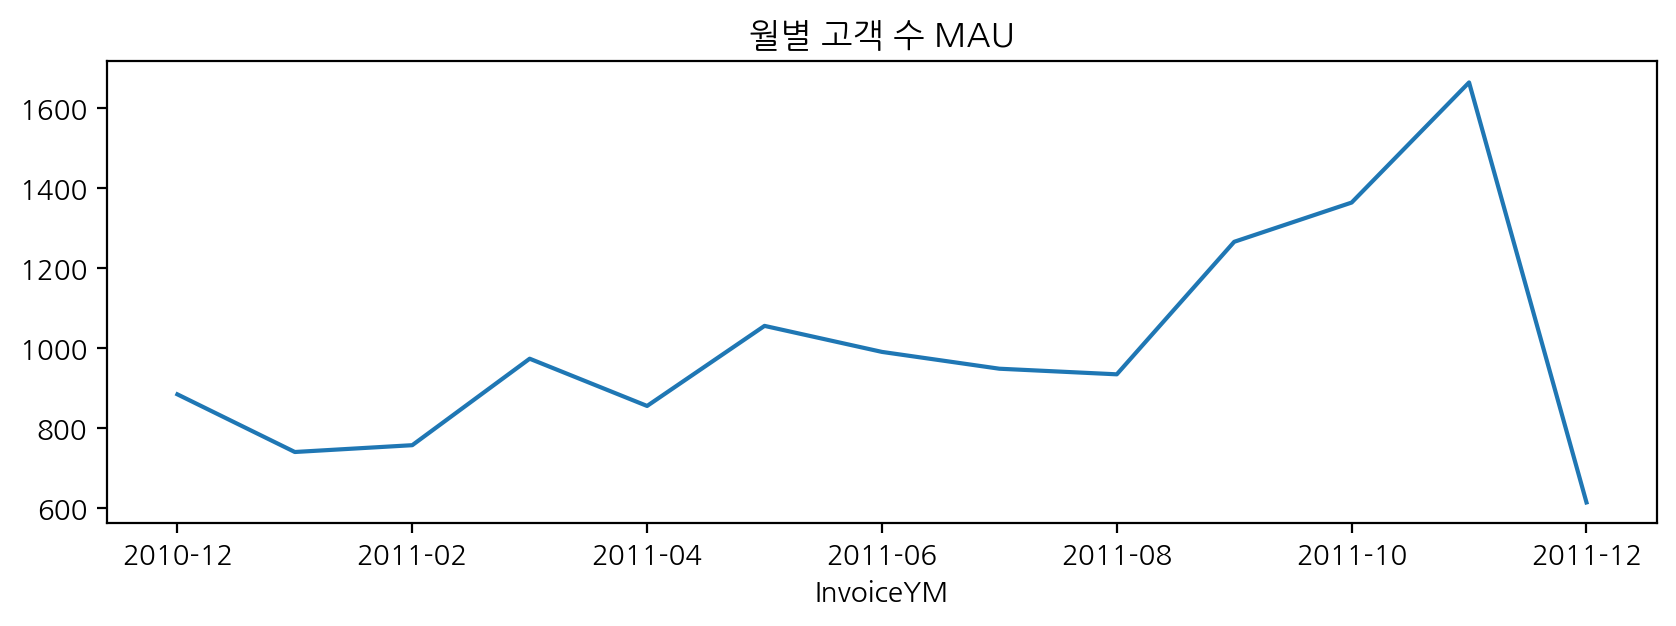

In [83]:
arppu['CustomerID'].plot(figsize=(10, 3), title = "월별 고객 수 MAU")

<Axes: title={'center': 'ARPPU'}, xlabel='InvoiceYM'>

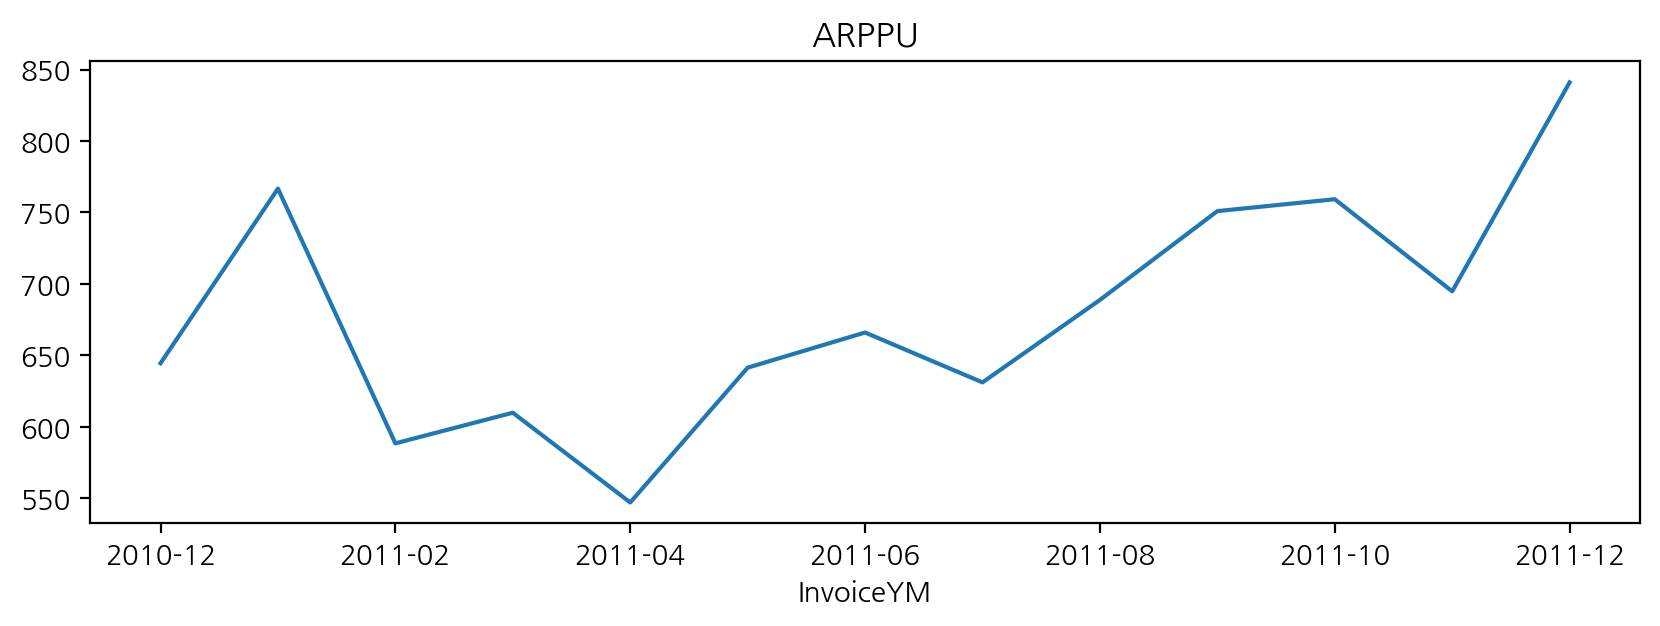

In [84]:
arppu['ARPPU'].plot(figsize=(10, 3), title = "ARPPU")

In [85]:
# df_valid(유효 고객, 유효 주문) 내 고객별 구매 빈도수를 구합니다.
# 고객별 구매 빈도수, 평균 구매 금액, 총 구매금액
cust_agg = df_valid.groupby('CustomerID').agg({"InvoiceNo":"count", "TotalPrice":["mean","sum"]})
cust_agg

InvoiceNo    TotalPrice          
               count          mean       sum
CustomerID                                  
12346.0            1  77183.600000  77183.60
12347.0          182     23.681319   4310.00
12348.0           31     57.975484   1797.24
12349.0           73     24.076027   1757.55
12350.0           17     19.670588    334.40
...              ...           ...       ...
18280.0           10     18.060000    180.60
18281.0            7     11.545714     80.82
18282.0           12     14.837500    178.05
18283.0          721      2.837074   2045.53
18287.0           70     26.246857   1837.28

[4338 rows x 3 columns]

In [86]:
# CustomerID별 TotalPrice의 "count", "mean"과 InvoiceNo의 "count"를 구해주세요
# 고객별 기술 통계 값을 확인합니다.
cust_agg.describe()

InvoiceNo    TotalPrice               
             count          mean            sum
count  4338.000000   4338.000000    4338.000000
mean     90.523744     68.381590    2048.688081
std     225.506968   1467.918294    8985.230220
min       1.000000      2.136970       3.750000
25%      17.000000     12.393196     306.482500
50%      41.000000     17.755000     668.570000
75%      98.000000     24.878950    1660.597500
max    7676.000000  77183.600000  280206.020000

- 평균 금액과 합계 금액에 이상치가 있어 편차가 큰 편이다.

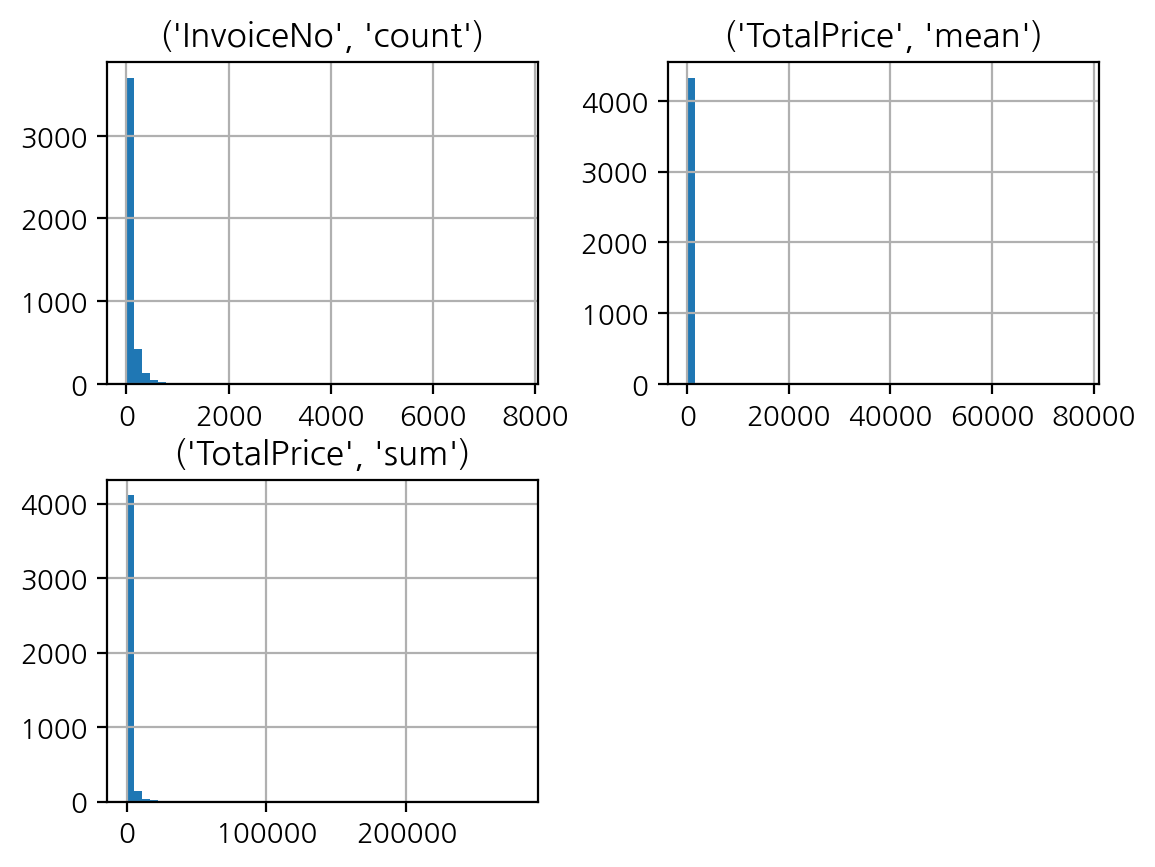

In [87]:
cust_agg.hist(bins = 50);

## MAU(Monthly Active User)


<Axes: title={'center': 'MAU'}, xlabel='InvoiceYM'>

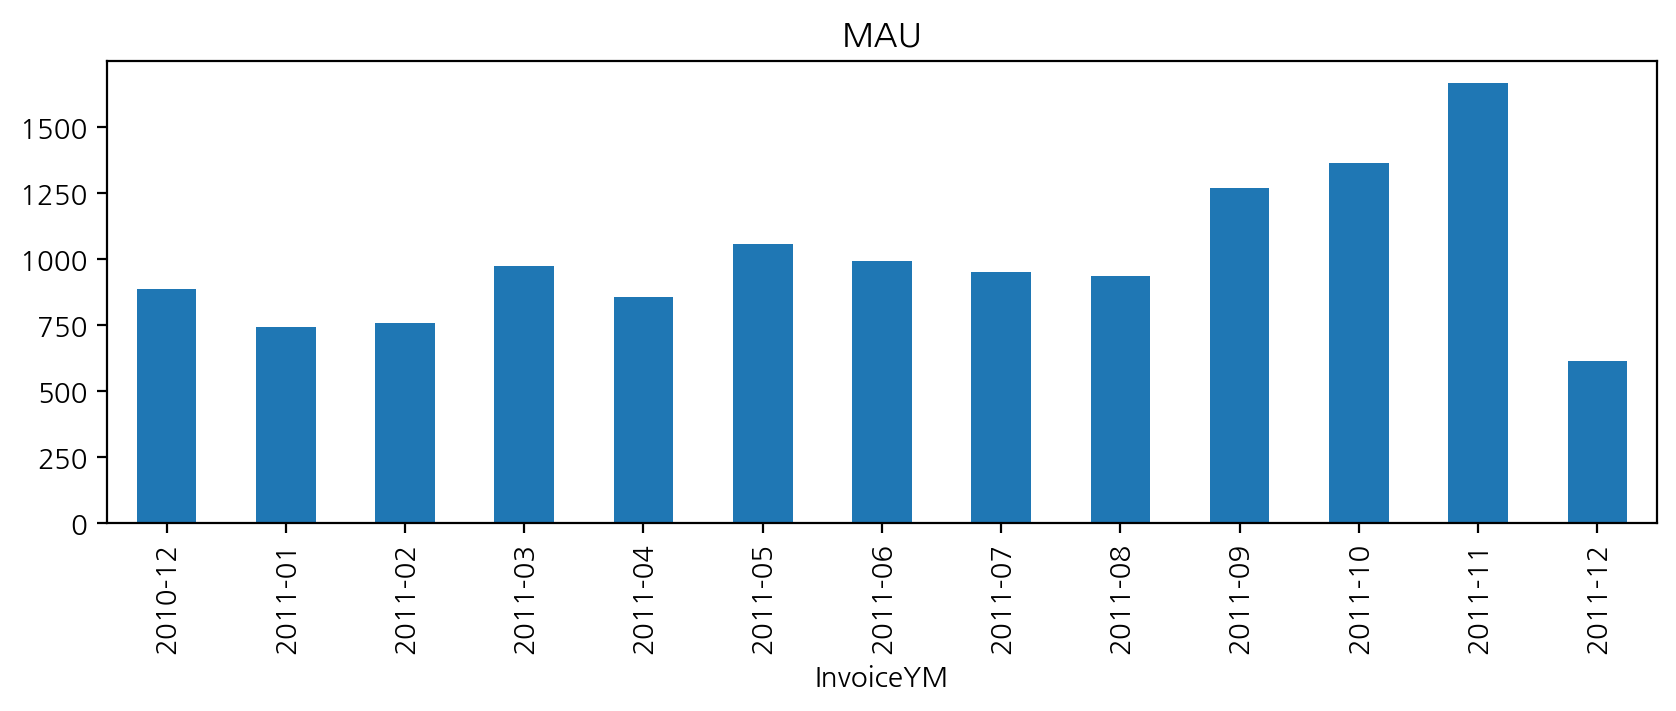

In [88]:
# InvoiceYM으로 그룹화하여 CustomerID의 유일 값의 개수를 구합니다.
MAU = df_valid.groupby('InvoiceYM')['CustomerID'].nunique()
MAU.plot.bar(figsize = (10, 3), title = "MAU")


## 월별, 주문건, 중복을 제외한 주문제품 종류 수, 고객 수, 총 주문금액

In [89]:
# 유효고객, 유효 주문에 대한 우러별 데이터를 확인
# InvoiceNo의 수
# StockCode, CustomerID의 유일값의 수
# UnitPrice, Quantity, TotalPrice의 sum
df_valid.groupby("InvoiceYM").agg({"InvoiceNo":'count',
                                "StockCode":"nunique", # 월별 판매되는 종류
                                "CustomerID":"nunique",
                                "UnitPrice":'mean',
                                "Quantity":"sum",
                                "TotalPrice":"sum"
                                }) 


InvoiceNo  StockCode  CustomerID  UnitPrice  Quantity   TotalPrice
InvoiceYM                                                                    
2010-12        25670       2411         885   3.142953    311048   570422.730
2011-01        20988       2121         741   3.155834    348473   568101.310
2011-02        19706       2124         758   3.177686    265027   446084.920
2011-03        26870       2234         974   3.269996    347582   594081.760
2011-04        22433       2217         856   3.501247    291366   468374.331
2011-05        28073       2219        1056   3.615606    372864   677355.150
2011-06        26926       2339         991   3.142043    363014   660046.050
2011-07        26580       2351         949   2.838771    367360   598962.901
2011-08        26790       2356         935   2.944274    397373   644051.040
2011-09        39669       2545        1266   2.978656    543652   950690.202
2011-10        48793       2622        1364   3.362861    591543  1035642.450
2011-11        63168       2695        1664   2.886590    665923  1156205.610
2011-12        17026       2173         615   2.734624    286777   517190.440

# 리텐션을 구하기 위해 월단위 데이터 전처리

## 월 단위 데이터 전처리 

In [90]:
# "최근 구매일 - 최초 구매일" 로 첫 구매 후 몇 달 후 구매인지를 알 수 있습니다.add()
# 최초 구매일을 구합니다.
df_valid['InvoiceDateFirst'] = df_valid.groupby(['CustomerID'])["InvoiceDate"].transform("min")

In [91]:
df_valid[["CustomerID","InvoiceDate","InvoiceDateFirst"]].sample(5)

CustomerID         InvoiceDate    InvoiceDateFirst
185246     16029.0 2011-05-11 12:15:00 2010-12-01 09:57:00
118836     15493.0 2011-03-14 11:44:00 2011-03-14 11:44:00
288364     16012.0 2011-08-03 11:44:00 2011-07-07 18:02:00
292000     12517.0 2011-08-05 15:02:00 2011-06-02 15:13:00
365147     14911.0 2011-09-28 14:57:00 2010-12-01 14:05:00

## 첫 구매일로부터 몇 달째 구매인가?

In [92]:
# 연도별 차이와 월별 차이를 구합니다.

year_diff = df_valid["InvoiceDate"].dt.year - df_valid['InvoiceDateFirst'].dt.year
month_diff = df_valid["InvoiceDate"].dt.month - df_valid['InvoiceDateFirst'].dt.month
month_diff.value_counts()

 0     124030
-1      21677
 2      18038
 1      17405
 3      15872
 4      15537
 5      14727
-3      14098
-2      13399
 6      12393
 7      11986
-7      11946
 8      11435
-4      11316
-5      11312
-9      11121
-6      11069
-11     10111
-8       9628
 9       8870
-10      8689
 10      6699
 11      1334
Name: count, dtype: int64

In [93]:
year_diff.value_counts()

0    251153
1    141539
Name: count, dtype: int64

In [94]:
# "연도 차이 * 12개월 + 월차이 + 1"로 첫 구매 후 몇달 후 구매인지 알 수 있도록 CohortIndex 변수를 생성한다.
# 2010-12-01부터 2011-12-01의 데이터를 기반으로 진행되어 CohortIndex 변수의 최소값은 1이며, 최대값은 13이다.
df_valid["CohortIndex"] = (year_diff * 12) + month_diff + 1
df_valid['CohortIndex'].head()

0    1
1    1
2    1
3    1
4    1
Name: CohortIndex, dtype: int32

## 코호트 월별 빈도수

In [95]:
# CohortIndex 값으로 월별 잔존 구매에 대한 빈도수를 구합니다.
# 회원가입 후 월별 구매 빈도수를 value_counts로 구합니다.add()
df_valid['CohortIndex'].value_counts()

CohortIndex
1     116857
2      27516
4      26993
3      26727
6      26673
5      25165
7      23462
8      23298
12     23011
10     22968
9      22751
11     20098
13      7173
Name: count, dtype: int64

<Axes: xlabel='CohortIndex', ylabel='count'>

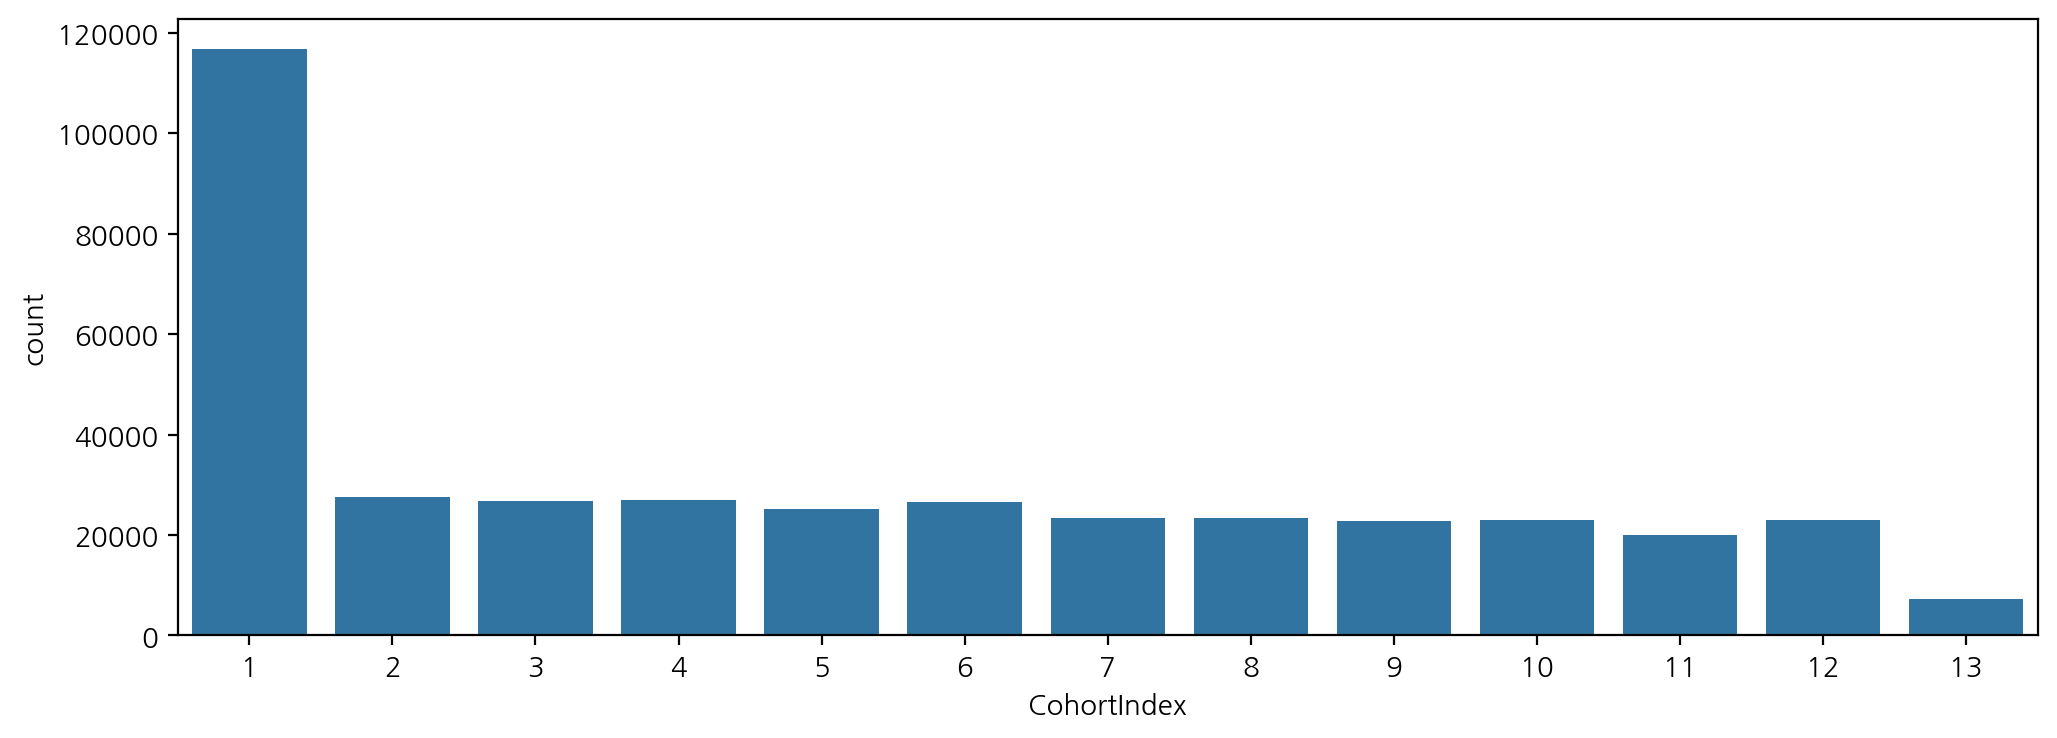

In [96]:
# CohortIndex의 빈도수를 시각화
plt.figure(figsize=(12, 4))
sns.countplot(data = df_valid, x = "CohortIndex")

## 잔존 빈도 구하기

In [97]:
df_valid['InvoiceDateFirstYM'] = df_valid['InvoiceDateFirst'].astype(str).str[:7]

In [98]:
# InvoiceDateFirst, CohortIndex로 그룹화하여 CustomerID의 유일값에 대해 빈도수를 구합니다
cohort_count = df_valid.groupby(['InvoiceDateFirstYM', 'CohortIndex'])['CustomerID'].nunique().unstack()
cohort_count

CohortIndex            1      2      3      4      5      6      7      8   \
InvoiceDateFirstYM                                                           
2010-12             885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01             417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02             380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03             452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04             300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   
2011-05             284.0   54.0   49.0   49.0   59.0   66.0   75.0   27.0   
2011-06             242.0   42.0   38.0   64.0   56.0   81.0   23.0    NaN   
2011-07             188.0   34.0   39.0   42.0   51.0   21.0    NaN    NaN   
2011-08             169.0   35.0   42.0   41.0   21.0    NaN    NaN    NaN   
2011-09             299.0   70.0   90.0   34.0    NaN    NaN    NaN    NaN   
2011-10             358.0   86.0   41.0    NaN    NaN    NaN    NaN    NaN   
2011-11             323.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12              41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex            9      10     11     12     13  
InvoiceDateFirstYM                                     
2010-12             313.0  350.0  331.0  445.0  235.0  
2011-01             125.0  136.0  152.0   49.0    NaN  
2011-02              94.0  116.0   26.0    NaN    NaN  
2011-03             126.0   39.0    NaN    NaN    NaN  
2011-04              22.0    NaN    NaN    NaN    NaN  
2011-05               NaN    NaN    NaN    NaN    NaN  
2011-06               NaN    NaN    NaN    NaN    NaN  
2011-07               NaN    NaN    NaN    NaN    NaN  
2011-08               NaN    NaN    NaN    NaN    NaN  
2011-09               NaN    NaN    NaN    NaN    NaN  
2011-10               NaN    NaN    NaN    NaN    NaN  
2011-11               NaN    NaN    NaN    NaN    NaN  
2011-12               NaN    NaN    NaN    NaN    NaN

- 순수한 유저의 첫 구매일자와 구매자들이 다음달 구매자, 그 다음달 구매자의 숫자를 알 수 있습니다.

In [99]:
# print(plt.colormaps())

<Axes: xlabel='CohortIndex', ylabel='InvoiceDateFirstYM'>

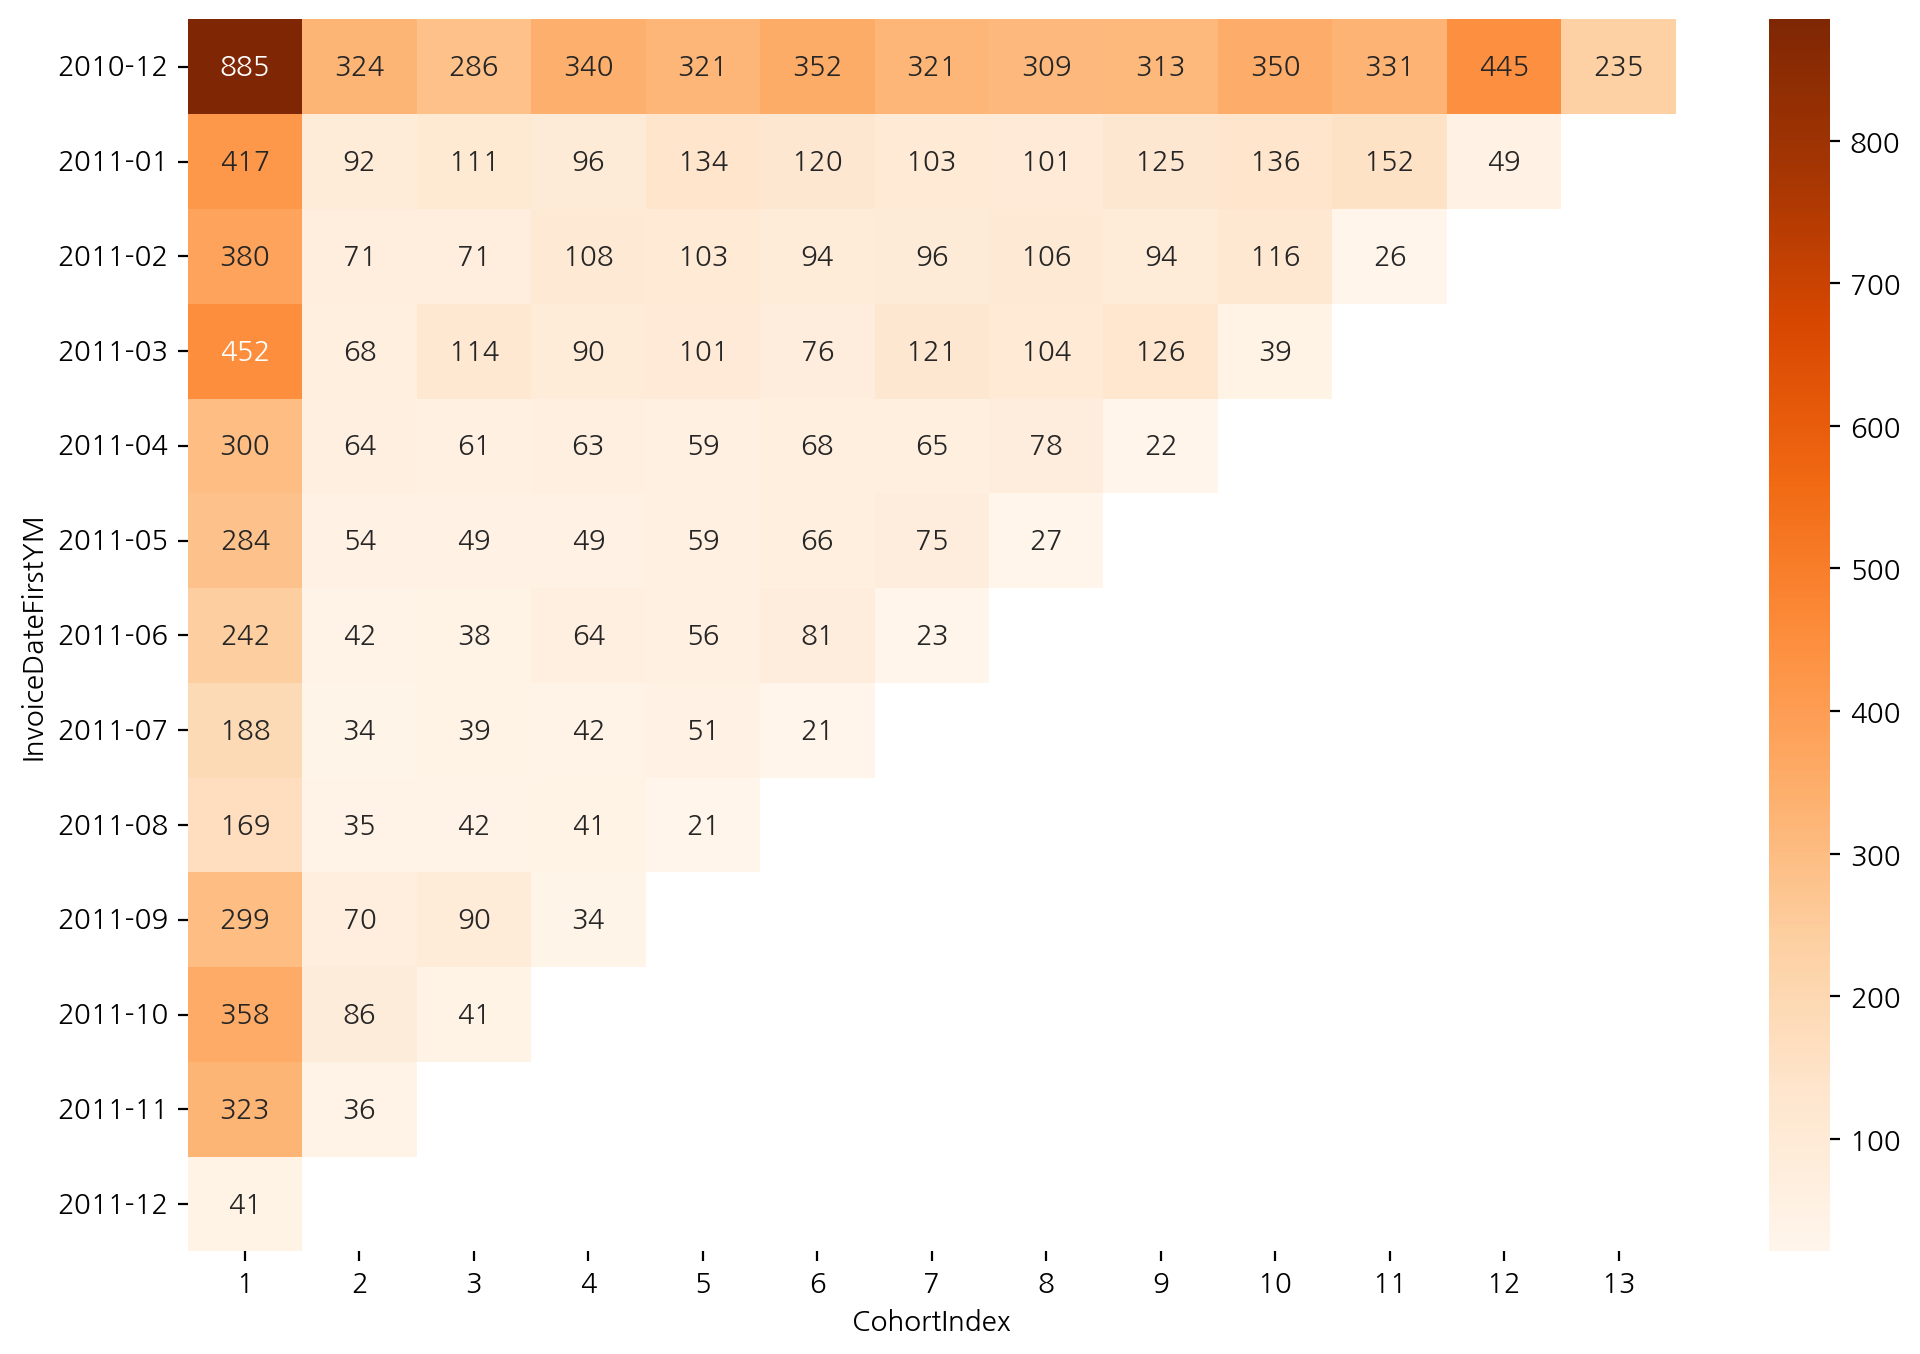

In [100]:
# heatmap을 통해 위에서 구한 잔존수를 시각화
plt.figure(figsize=(12,8))
sns.heatmap(cohort_count, cmap = "Oranges", annot = True, fmt = ".0f")

## 월별 신규 유입 고객 수
- Acquistion

In [101]:
cohort_count[1]

InvoiceDateFirstYM
2010-12    885.0
2011-01    417.0
2011-02    380.0
2011-03    452.0
2011-04    300.0
2011-05    284.0
2011-06    242.0
2011-07    188.0
2011-08    169.0
2011-09    299.0
2011-10    358.0
2011-11    323.0
2011-12     41.0
Name: 1, dtype: float64

<Axes: title={'center': 'Monthly Acqusition'}, xlabel='InvoiceDateFirstYM'>

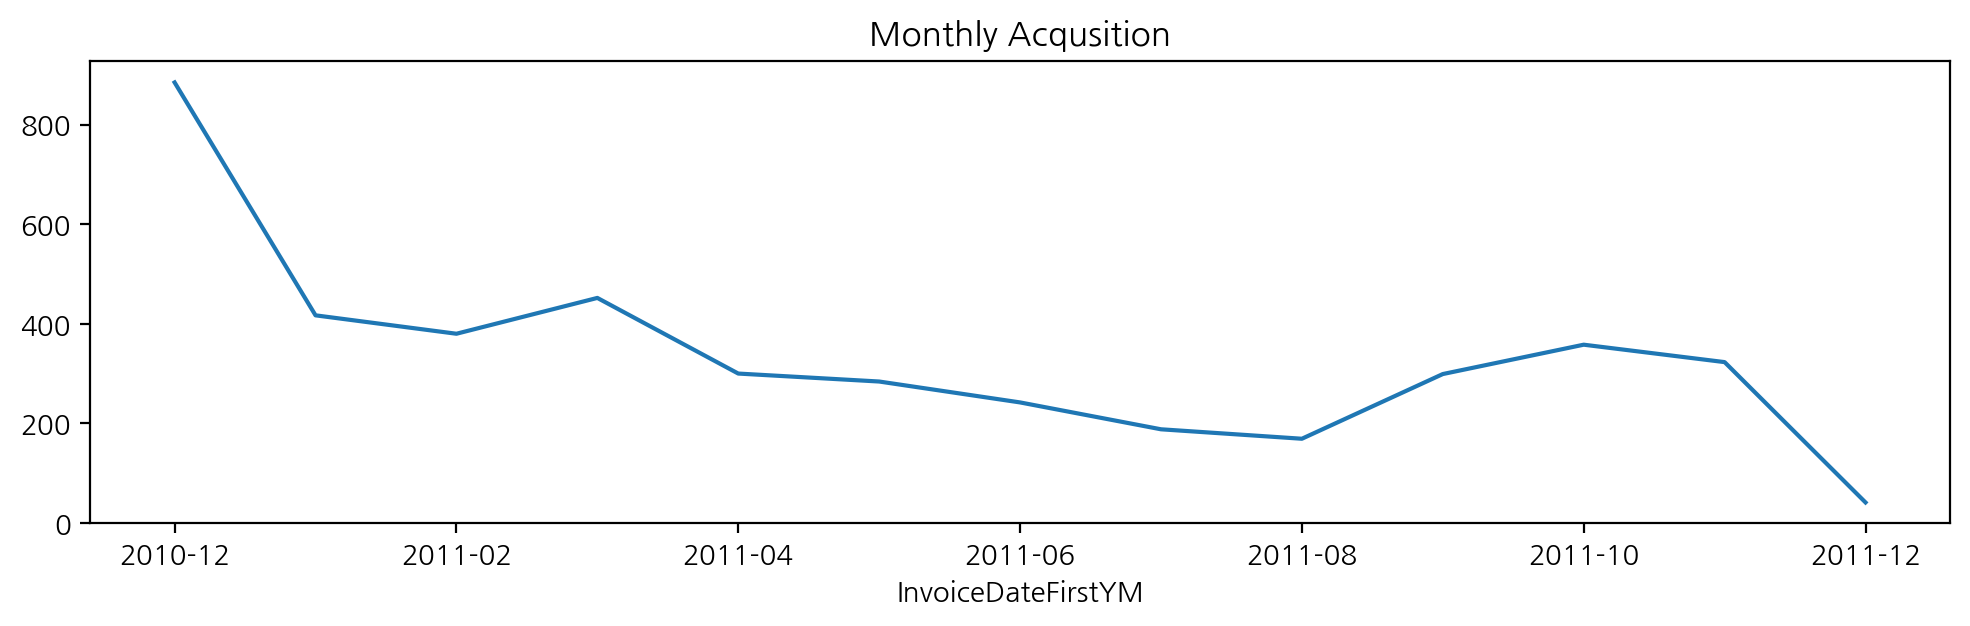

In [102]:
cohort_count[1].plot( figsize=(12, 3), rot = 0, title="Monthly Acqusition")

<Axes: title={'center': 'Monthly Acqusition'}, xlabel='InvoiceDateFirstYM'>

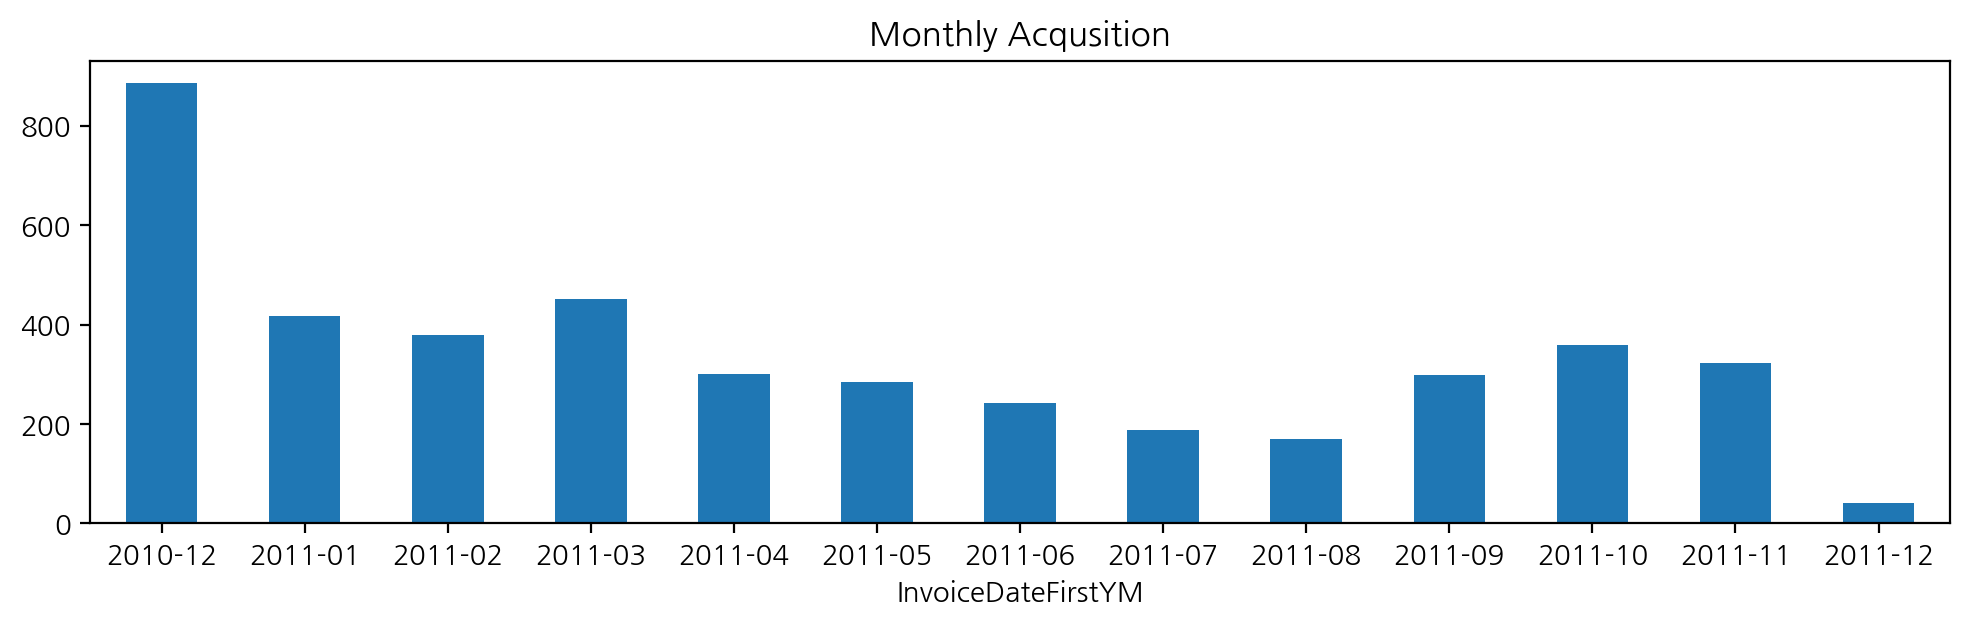

In [103]:
cohort_count[1].plot(kind='bar', figsize=(12, 3), rot = 0, title="Monthly Acqusition")

## 잔존율 구하기

In [104]:
# 가입한 달을 1로 나누면 잔존률을 구할 수 있습니다.
# div를 통해 구하며 axis = 0으로 설정하면 첫 달을 기주능로 나머지 달을 나누게 됩니다.
cohort_norm = cohort_count.div(cohort_count[1], axis = 0)
cohort_norm

CohortIndex          1         2         3         4         5         6   \
InvoiceDateFirstYM                                                          
2010-12             1.0  0.366102  0.323164  0.384181  0.362712  0.397740   
2011-01             1.0  0.220624  0.266187  0.230216  0.321343  0.287770   
2011-02             1.0  0.186842  0.186842  0.284211  0.271053  0.247368   
2011-03             1.0  0.150442  0.252212  0.199115  0.223451  0.168142   
2011-04             1.0  0.213333  0.203333  0.210000  0.196667  0.226667   
2011-05             1.0  0.190141  0.172535  0.172535  0.207746  0.232394   
2011-06             1.0  0.173554  0.157025  0.264463  0.231405  0.334711   
2011-07             1.0  0.180851  0.207447  0.223404  0.271277  0.111702   
2011-08             1.0  0.207101  0.248521  0.242604  0.124260       NaN   
2011-09             1.0  0.234114  0.301003  0.113712       NaN       NaN   
2011-10             1.0  0.240223  0.114525       NaN       NaN       NaN   
2011-11             1.0  0.111455       NaN       NaN       NaN       NaN   
2011-12             1.0       NaN       NaN       NaN       NaN       NaN   

CohortIndex               7         8         9         10        11  \
InvoiceDateFirstYM                                                     
2010-12             0.362712  0.349153  0.353672  0.395480  0.374011   
2011-01             0.247002  0.242206  0.299760  0.326139  0.364508   
2011-02             0.252632  0.278947  0.247368  0.305263  0.068421   
2011-03             0.267699  0.230088  0.278761  0.086283       NaN   
2011-04             0.216667  0.260000  0.073333       NaN       NaN   
2011-05             0.264085  0.095070       NaN       NaN       NaN   
2011-06             0.095041       NaN       NaN       NaN       NaN   
2011-07                  NaN       NaN       NaN       NaN       NaN   
2011-08                  NaN       NaN       NaN       NaN       NaN   
2011-09                  NaN       NaN       NaN       NaN       NaN   
2011-10                  NaN       NaN       NaN       NaN       NaN   
2011-11                  NaN       NaN       NaN       NaN       NaN   
2011-12                  NaN       NaN       NaN       NaN       NaN   

CohortIndex               12        13  
InvoiceDateFirstYM                      
2010-12             0.502825  0.265537  
2011-01             0.117506       NaN  
2011-02                  NaN       NaN  
2011-03                  NaN       NaN  
2011-04                  NaN       NaN  
2011-05                  NaN       NaN  
2011-06                  NaN       NaN  
2011-07                  NaN       NaN  
2011-08                  NaN       NaN  
2011-09                  NaN       NaN  
2011-10                  NaN       NaN  
2011-11                  NaN       NaN  
2011-12                  NaN       NaN

<Axes: xlabel='CohortIndex', ylabel='InvoiceDateFirstYM'>

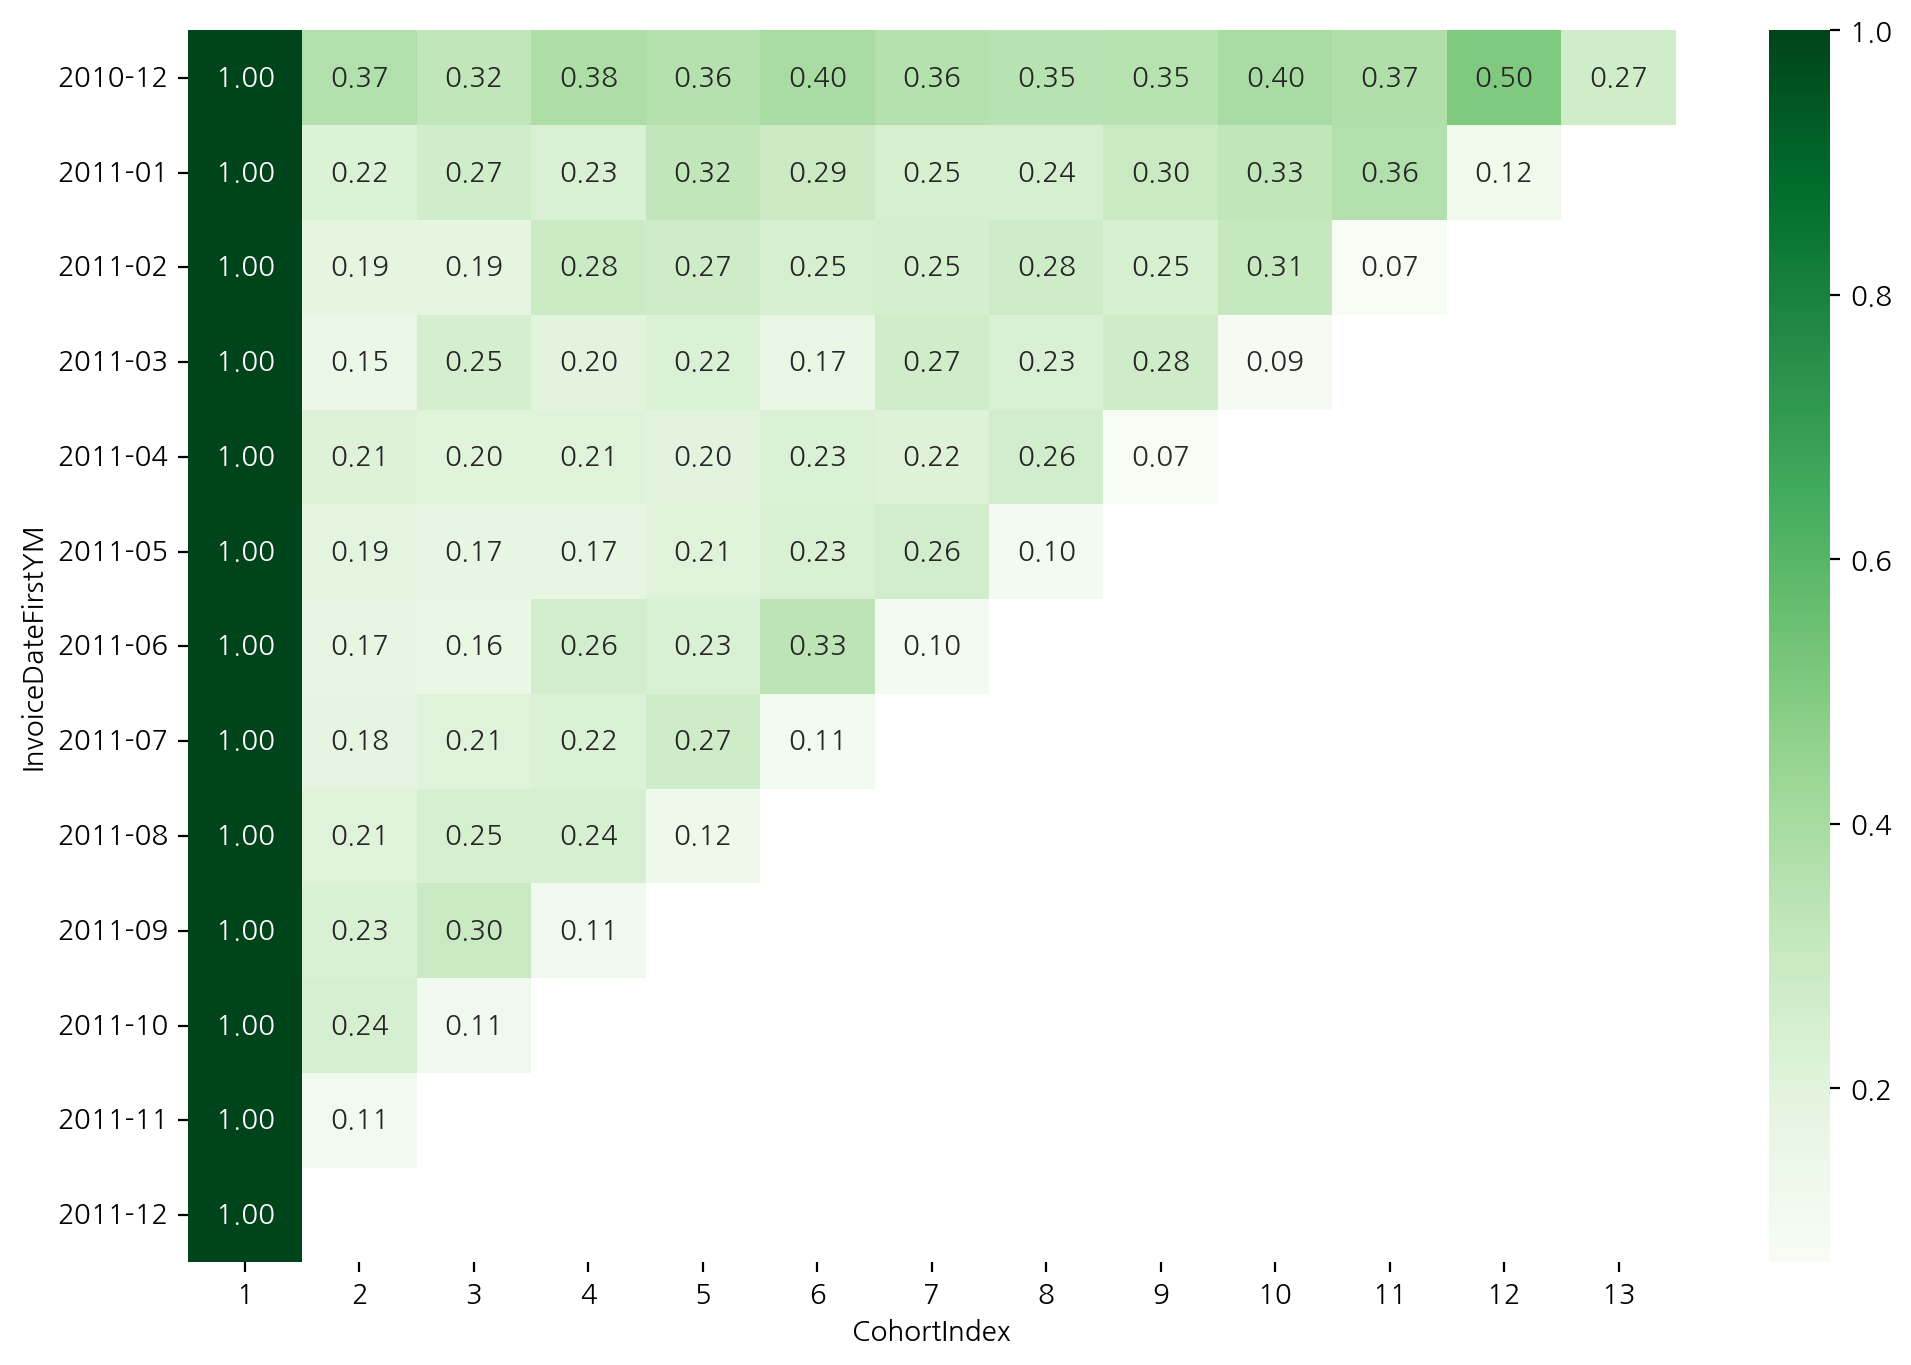

In [105]:
# heatmap을 통해 잔존율을 구합니다.
plt.figure(figsize = (12, 8))
sns.heatmap(cohort_norm, cmap = "Greens", annot = True, fmt = ".2f")

## 고객별 매출액

In [106]:
df_valid.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   isRegistered  ... InvoiceMonth  InvoiceDay  InvoiceDow  InvoiceYM  \
0          True  ...           12           1           2    2010-12   
1          True  ...           12           1           2    2010-12   

   InvoiceTime  InvoiceHour InvoiceDayName    InvoiceDateFirst  CohortIndex  \
0     08:26:00            8              수 2010-12-01 08:26:00            1   
1     08:26:00            8              수 2010-12-01 08:26:00            1   

  InvoiceDateFirstYM  
0            2010-12  
1            2010-12  

[2 rows x 23 columns]

In [107]:
cohort_total_price = df_valid.groupby(["InvoiceDateFirstYM", "CohortIndex"])["TotalPrice"].sum().unstack()
cohort_total_price

CohortIndex                 1          2          3          4          5   \
InvoiceDateFirstYM                                                           
2010-12             570422.730  275734.47  233390.47  302367.44  204034.38   
2011-01             292366.840   54993.86   63157.01   71526.09   80989.77   
2011-02             157700.590   28937.64   40964.47   48155.39   40089.17   
2011-03             199619.670   30040.34   58958.41   42739.08   51392.44   
2011-04             121809.051   29398.59   25028.57   24282.79   26253.16   
2011-05             123739.300   18641.70   20155.73   19162.17   27752.62   
2011-06             135414.800   14738.49   14104.37   30898.56   26669.90   
2011-07              73860.401   11789.67   15488.37   17391.93   19156.82   
2011-08              79601.140   20933.76   35458.48   44487.65   15284.36   
2011-09             154734.091   28701.15   36898.95   12299.53        NaN   
2011-10             173425.190   39691.40   12567.28        NaN        NaN   
2011-11             135131.330   15223.34        NaN        NaN        NaN   
2011-12              27005.460        NaN        NaN        NaN        NaN   

CohortIndex                6          7          8           9          10  \
InvoiceDateFirstYM                                                           
2010-12             336113.69  313668.16  310304.03  331001.070  471792.13   
2011-01              84464.57   70073.35   72503.42   71870.481  111370.70   
2011-02              34155.67   49673.71   62292.80   55241.340   64688.86   
2011-03              39962.33   64824.15   70523.62   70847.620   12761.10   
2011-04              30103.24   28505.90   34009.61    6332.000        NaN   
2011-05              32875.34   33168.34  179184.23         NaN        NaN   
2011-06              42531.09    8143.22        NaN         NaN        NaN   
2011-07               6040.70        NaN        NaN         NaN        NaN   
2011-08                   NaN        NaN        NaN         NaN        NaN   
2011-09                   NaN        NaN        NaN         NaN        NaN   
2011-10                   NaN        NaN        NaN         NaN        NaN   
2011-11                   NaN        NaN        NaN         NaN        NaN   
2011-12                   NaN        NaN        NaN         NaN        NaN   

CohortIndex                11         12         13  
InvoiceDateFirstYM                                   
2010-12             455478.90  512341.08  185360.97  
2011-01             123252.86   26388.03        NaN  
2011-02              10600.22        NaN        NaN  
2011-03                   NaN        NaN        NaN  
2011-04                   NaN        NaN        NaN  
2011-05                   NaN        NaN        NaN  
2011-06                   NaN        NaN        NaN  
2011-07                   NaN        NaN        NaN  
2011-08                   NaN        NaN        NaN  
2011-09                   NaN        NaN        NaN  
2011-10                   NaN        NaN        NaN  
2011-11                   NaN        NaN        NaN  
2011-12                   NaN        NaN        NaN

<Axes: xlabel='CohortIndex', ylabel='InvoiceDateFirstYM'>

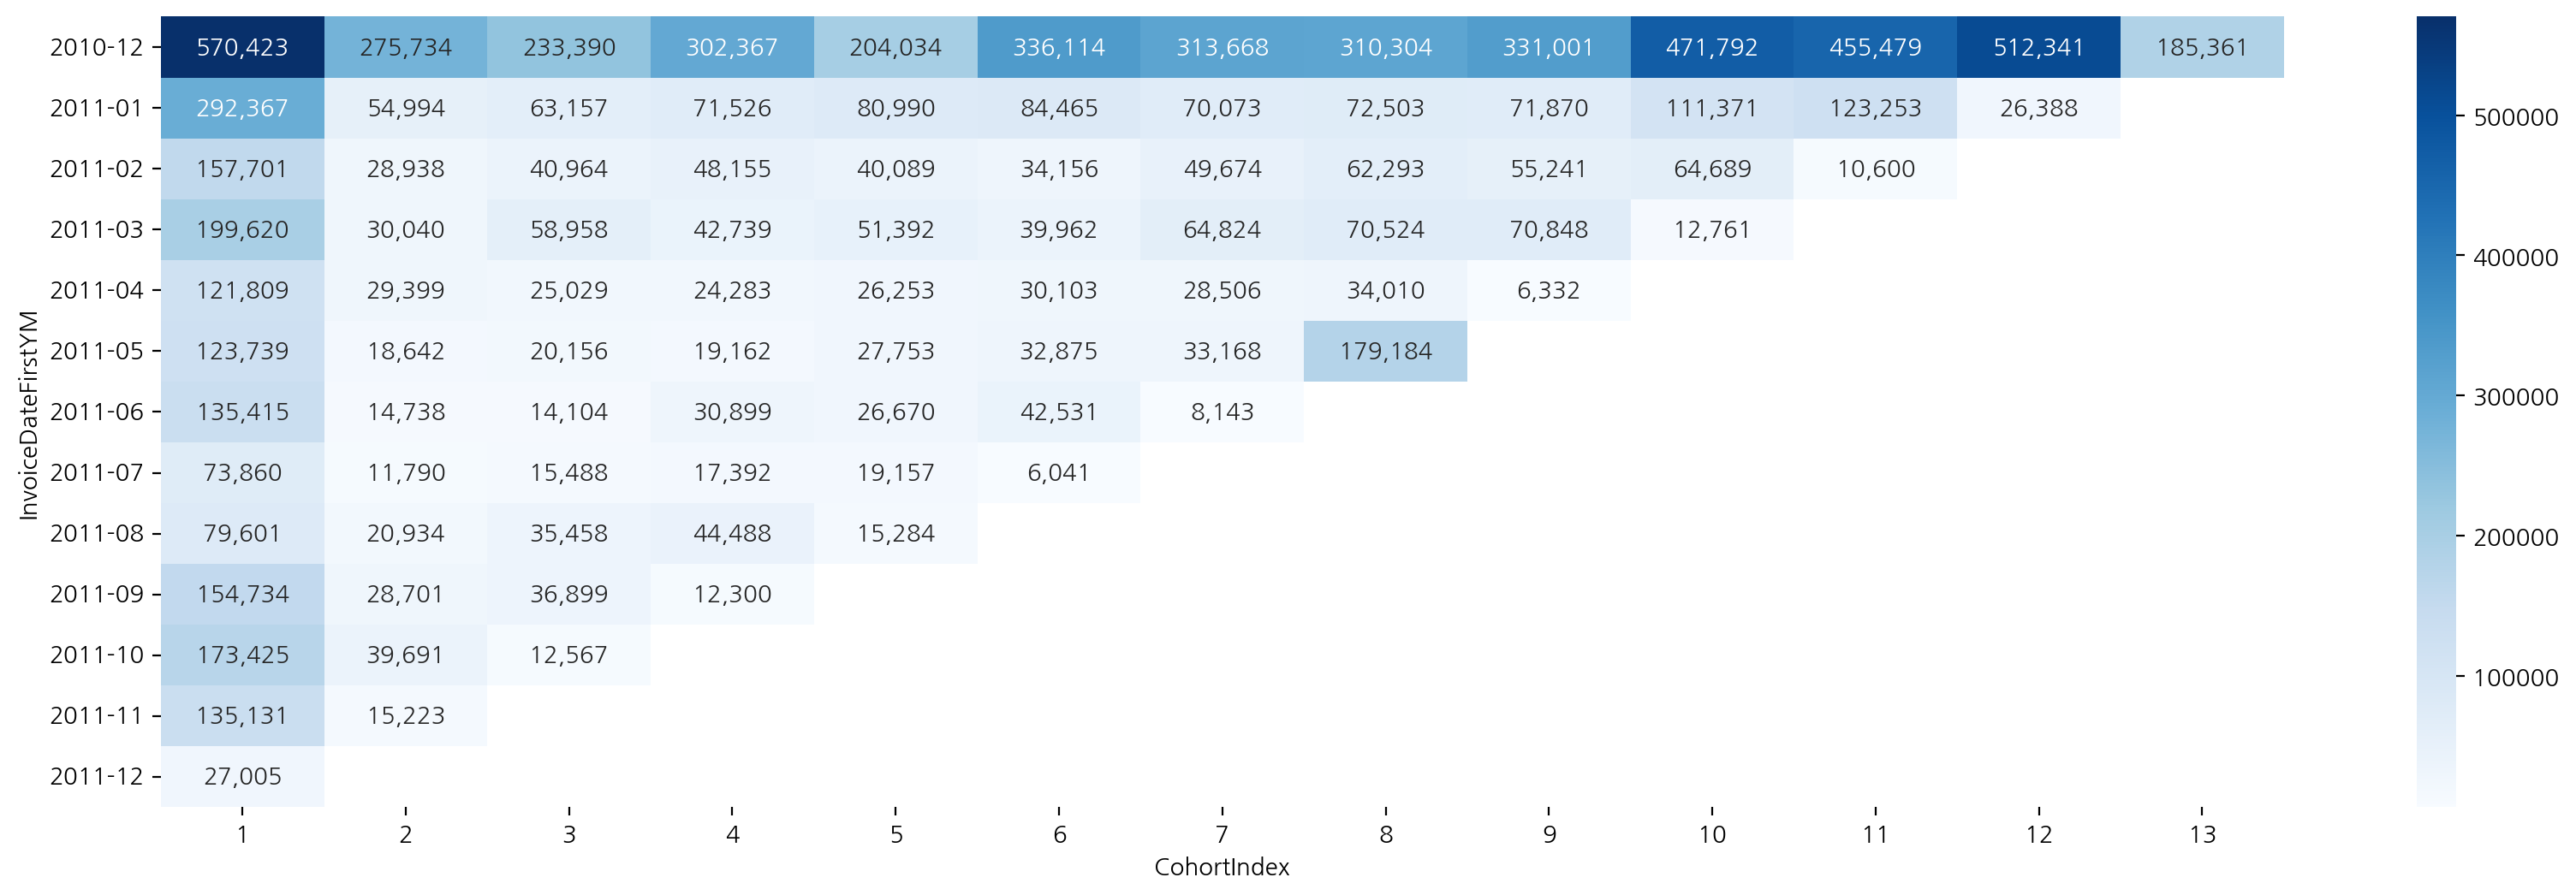

In [108]:
plt.figure(figsize = (20,6))
sns.heatmap(cohort_total_price, cmap = "Blues", annot = True, fmt = ",.0f")

# RFM

## library

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

## 데이터 로드

In [110]:
raw = pd.read_parquet("online_retail.gzip")
raw.shape

(541909, 8)

In [111]:
raw.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom

## 유효한 데이터만 추출

In [112]:
# "CustomerID"가 있고 "Quantity". "UnitPrice"가 0보다 큰 데이터를 가져옵니다.
# 구매하고 취소한 건 중 취소한 건만 제외하고 구매 건은 남깁니다.

In [113]:
raw_valid = raw[(raw["CustomerID"].notnull()) & (raw["Quantity"] > 0) & (raw["UnitPrice"] > 0)].copy()
raw_valid.shape


(397884, 8)

## 구매 금액 계산

In [114]:
# TotalPrice는 RFM 중 MonetaryValue의 값이 된다.
raw_valid['TotalPrice'] = raw_valid["Quantity"] * raw_valid['UnitPrice']
raw_valid.head(1)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.3

In [115]:
raw_valid.describe()

Quantity      UnitPrice     CustomerID     TotalPrice
count  397884.000000  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.421875      22.397000
std       179.331775      22.097877    1713.141602     309.071041
min         1.000000       0.001000   12346.000000       0.001000
25%         2.000000       1.250000   13969.000000       4.680000
50%         6.000000       1.950000   15159.000000      11.800000
75%        12.000000       3.750000   16795.000000      19.800000
max     80995.000000    8142.750000   18287.000000  168469.600000

## 이상치 제거

In [116]:
# 비즈니스 상황
# 범위를 설정하여 이상치를 찾습니다.
# 160000 보다 큰 값을 찾습니다.
raw_valid[raw_valid["TotalPrice"] > 160000]

InvoiceNo StockCode                  Description  Quantity  \
540421    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   

                InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
540421  2011-12-09 09:15:00       2.08     16446.0  United Kingdom    168469.6

In [117]:
raw_valid[raw_valid['CustomerID']==16446]

InvoiceNo StockCode                  Description  Quantity  \
194354    553573     22980       PANTRY SCRUBBING BRUSH         1   
194355    553573     22982          PANTRY PASTRY BRUSH         1   
540421    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   

                InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
194354  2011-05-18 09:52:00       1.65     16446.0  United Kingdom        1.65  
194355  2011-05-18 09:52:00       1.25     16446.0  United Kingdom        1.25  
540421  2011-12-09 09:15:00       2.08     16446.0  United Kingdom   168469.60

In [118]:
# 160000 보다 큰 값을 제외합니다.
raw_valid = raw_valid[raw_valid["TotalPrice"] < 160000].copy()
raw_valid.shape

(397883, 9)

## 중복 데이터 확인

- 중복 데이터는 여러 이유로 발생할 수 있습니다. 네트워크 통신 문제나 쇼핑몰의 UI구성 등의 다양한 이슈로 발생할 수 있습니다.
- 예를 들면 주문을 하고 새로고침을 했을 때 다시 주문 트랜잭션에 들어가거나 하는 이슈가 발생할 가능성도 있습니다.

In [119]:
# 중복 데이터 중 첫번째 것만 (keep='fisrt') 봅니다.
# keep은 중복 데이터 발견시에 어떤 데이터를 유지하고 제외할지 결정해주는 변수입니다. ('first', 'last', 'False'로 선택적 입력 가능)
raw_valid[raw_valid.duplicated(keep='first')].head(2)

InvoiceNo StockCode                    Description  Quantity  \
517    536409     21866    UNION JACK FLAG LUGGAGE TAG         1   
527    536409     22866  HAND WARMER SCOTTY DOG DESIGN         1   

             InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
517  2010-12-01 11:45:00       1.25     17908.0  United Kingdom        1.25  
527  2010-12-01 11:45:00       2.10     17908.0  United Kingdom        2.10

In [120]:
# 중복 데이터 모두 출력 (keep = False)합니다.
raw_valid[raw_valid.duplicated(keep=False)].sort_values(['InvoiceNo', 'StockCode'])

InvoiceNo StockCode                       Description  Quantity  \
494       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
485       536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
539       536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
...          ...       ...                               ...       ...   
541655    581538     23275  SET OF 3 HANGING OWLS OLLIE BEAK         1   
541656    581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
541689    581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
541666    581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   
541701    581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   

                InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
494     2010-12-01 11:45:00       1.25     17908.0  United Kingdom        1.25  
517     2010-12-01 11:45:00       1.25     17908.0  United Kingdom        1.25  
485     2010-12-01 11:45:00       4.95     17908.0  United Kingdom        4.95  
539     2010-12-01 11:45:00       4.95     17908.0  United Kingdom        4.95  
489     2010-12-01 11:45:00       2.10     17908.0  United Kingdom        2.10  
...                     ...        ...         ...             ...         ...  
541655  2011-12-09 11:34:00       1.25     14446.0  United Kingdom        1.25  
541656  2011-12-09 11:34:00       2.49     14446.0  United Kingdom        2.49  
541689  2011-12-09 11:34:00       2.49     14446.0  United Kingdom        2.49  
541666  2011-12-09 11:34:00       2.08     14446.0  United Kingdom        2.08  
541701  2011-12-09 11:34:00       2.08     14446.0  United Kingdom        2.08  

[10001 rows x 9 columns]

## 중복 데이터 제거

In [121]:
# drop_duplicates로 중복을 제거합니다.
df = raw_valid.drop_duplicates().copy()
df.shape

(392691, 9)

## RFM 계산

### 전체 주문에서 최근 주문일 구하기

In [122]:
# InvoiceDate를 날짜 형식으로 반환해 줍니다.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].head(1)

0   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [123]:
# Recency 계산을 위해 해당 주문에서 가장 최근 구매가 일어난 시간을 가져옵니다.
# 최근 거래 기준일 (last_timestamp)을 만들기 위해 timedelta로 날짜를 더해줍니다. (최소값: 1 설정)
last_timestamp = df['InvoiceDate'].max() + dt.timedelta(days= 1)
last_timestamp

Timestamp('2011-12-10 12:50:00')

### 고객별 Recency, Frequency, Monetary 값 구하기

In [124]:
# RFM 값을 정의합니다.
# Recency : 최근 거래 기준일(last_stamp)과 고객별 최근 구매한 날짜 (x.max())와 차이값
# Frequency : 구매 빈도수
# Monetary : 총 구매 금액
rfm = df.groupby("CustomerID").agg({"InvoiceDate": lambda x : (last_timestamp - x.max()).days,
                            "InvoiceNo" : "count",
                            "TotalPrice" : "sum"
                            })

- 최근 일로부터 며칠 전에 구매했는지 구했다

In [125]:
# RFM으로 변수의 이름을 변경합니다.
# InvoiceDate 는 Recency
# InvoiceNo 는 Frequency
# TotalPrice 는 MonetaryValue
rfm = rfm.rename(columns={"InvoiceDate": "Recency",
                    "InvoiceNo" : "Frequency",
                    "TotalPrice" : "MonetaryValue"
})
rfm.head(2)

Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0         326          1        77183.6
12347.0           2        182         4310.0

In [126]:
rfm.describe()

Recency    Frequency  MonetaryValue
count  4338.000000  4338.000000    4338.000000
mean     92.583679    90.523513    2009.852304
std     100.019339   225.507058    8622.507371
min       1.000000     1.000000       2.900000
25%      18.000000    17.000000     306.452500
50%      51.000000    41.000000     668.495000
75%     142.750000    98.000000    1659.132500
max     374.000000  7676.000000  280206.020000

<Axes: >

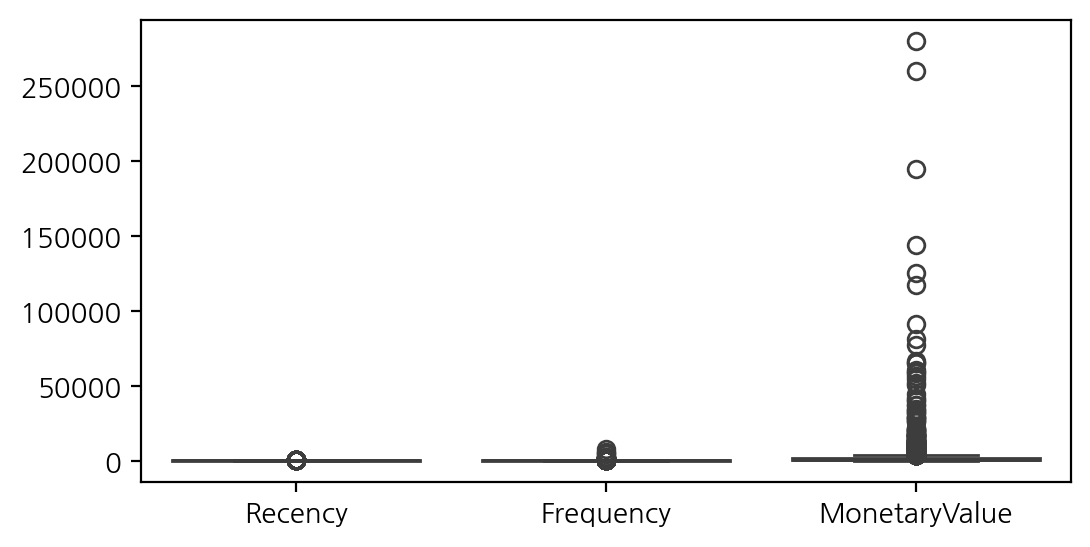

In [127]:
plt.figure(figsize = (6, 3))
sns.boxplot(rfm)

<Axes: xlabel='Recency'>

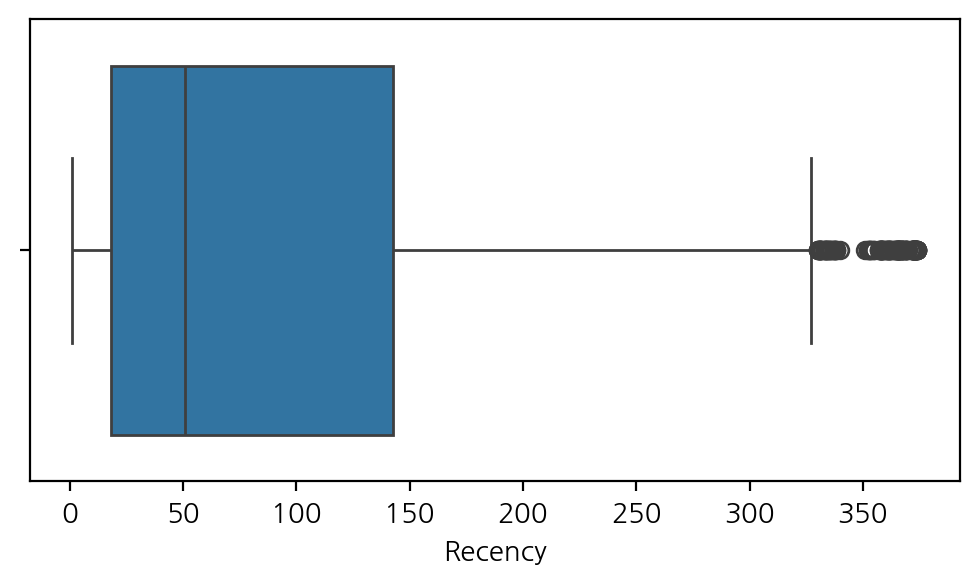

In [128]:
plt.figure(figsize = (6, 3))
sns.boxplot(data=rfm, x = 'Recency')

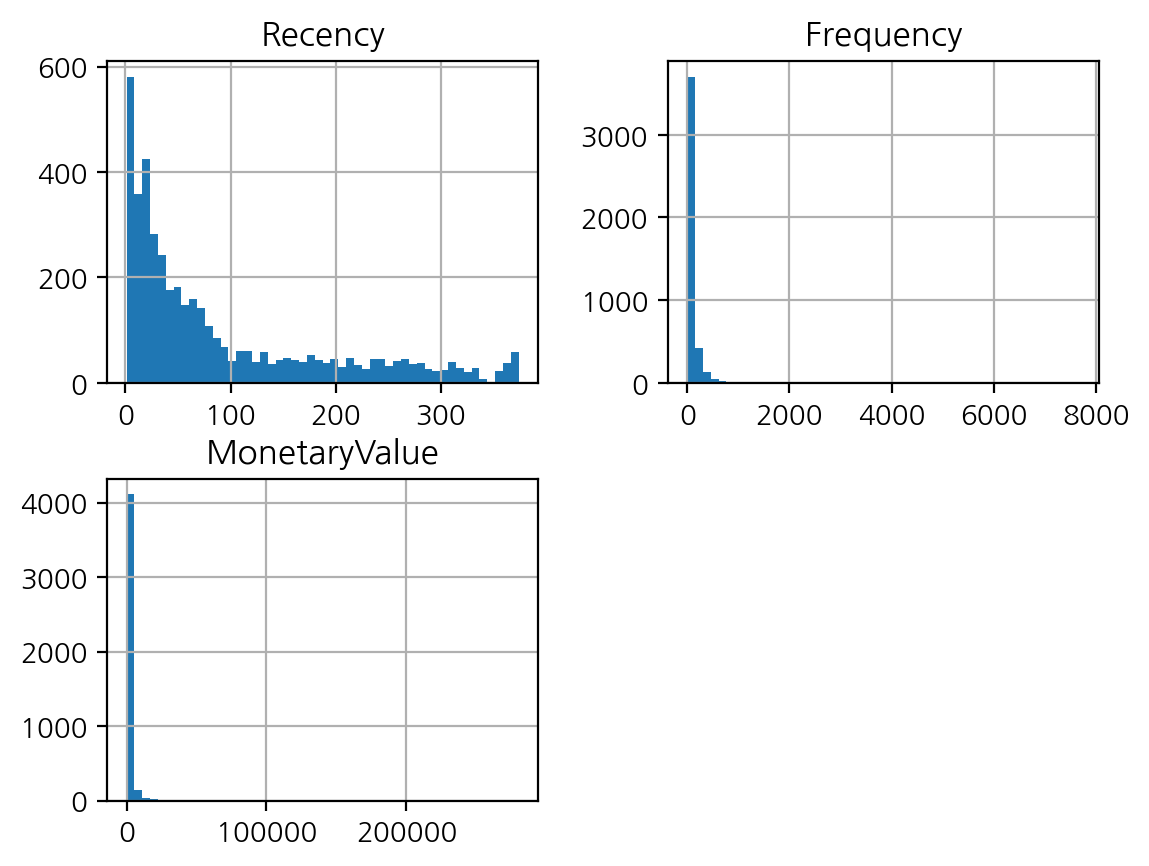

In [129]:
rfm.hist(bins = 50);

## RFM 모형

- Scoring 기법 : RFM의 요인을 각각 5등급으로 등간격으로 분류하는 방법이다.
- 현재 개발된 RFM 모형은 크게 4가지로 분류 할 수 있다. 
- 문서의 내용들은 정설이 아니며 신뢰하기 어렵고 비즈니스 상황에 따라 새롭게 선택할 수도 있다.
  - 모델 1. RFM 각 요소의 20% rule의 적용
  - 모델 2. 비율 척도에 의한 양적인 정도의 차이에 따른 등간격의 5등급 분류
  - 모델 3. 상하 20%를 제외한 등간격 척도에 의한 그룹 분류
  - 모델 4. 군집 분석에 의한 각 요소 별 5개의 그룹 분류

### qcut을 통한 RFM 변수 만들기

- cut() : Equal-length bucket, 동일한 길이로 나누기 (e.g. 히스토그램, 절대평가)
- qcut() : Equal-size bucket, 동일한 개수로 나누기 (e.g. 4분위 수, 상대평가)

In [130]:
# Recency 는 최근일수록 높은 스코어를 갖도록 합니다.
# Frequency, MonetaryValue 는 값이 클 수록 높은 스코어를 갖도록 합니다.

r_labels = list(range(5, 0, -1))
f_labels = list(range(1, 6))
m_labels = list(range(1, 6))
cut_size = 5

In [131]:
# pd.qcut?

In [132]:
r_qcut = pd.qcut(rfm['Recency'], q = cut_size, labels = r_labels)
f_qcut = pd.qcut(rfm['Frequency'], q = cut_size, labels = f_labels)
m_qcut = pd.qcut(rfm['MonetaryValue'], q = cut_size, labels = m_labels)

In [133]:
r_qcut.value_counts()

Recency
4    888
5    883
1    866
3    858
2    843
Name: count, dtype: int64

In [134]:
f_qcut.value_counts(1)

Frequency
1    0.213693
4    0.199401
5    0.198709
3    0.195251
2    0.192946
Name: proportion, dtype: float64

In [135]:
m_qcut.value_counts(1)

MonetaryValue
1    0.200092
3    0.200092
5    0.200092
2    0.199862
4    0.199862
Name: proportion, dtype: float64

In [136]:
# assign 을 사용하면 여러 변수를 한 번에 만들 수 있습니다.
rfm = rfm.assign(R = r_qcut, F = f_qcut, M = m_qcut)
rfm.head(2)

Recency  Frequency  MonetaryValue  R  F  M
CustomerID                                            
12346.0         326          1        77183.6  1  1  5
12347.0           2        182         4310.0  5  5  5

## RFM Segment

In [137]:
# RFM_segment 값을 구합니다. 
# R, F, M 값을 문자 그대로 붙여서 세그먼트를 구분합니다.
rfm['RFM_segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm.head(2)

Recency  Frequency  MonetaryValue  R  F  M RFM_segment
CustomerID                                                        
12346.0         326          1        77183.6  1  1  5         115
12347.0           2        182         4310.0  5  5  5         555

### RFM Score

In [138]:
# R, F, M 값의 합계를 구해서 세그먼트 점수를 구합니다.
rfm['RFM_score'] = rfm[['R','F','M']].astype(int).sum(axis = 1)
rfm.head(2)

Recency  Frequency  MonetaryValue  R  F  M RFM_segment  RFM_score
CustomerID                                                                   
12346.0         326          1        77183.6  1  1  5         115          7
12347.0           2        182         4310.0  5  5  5         555         15

<Axes: xlabel='RFM_segment', ylabel='RFM_score'>

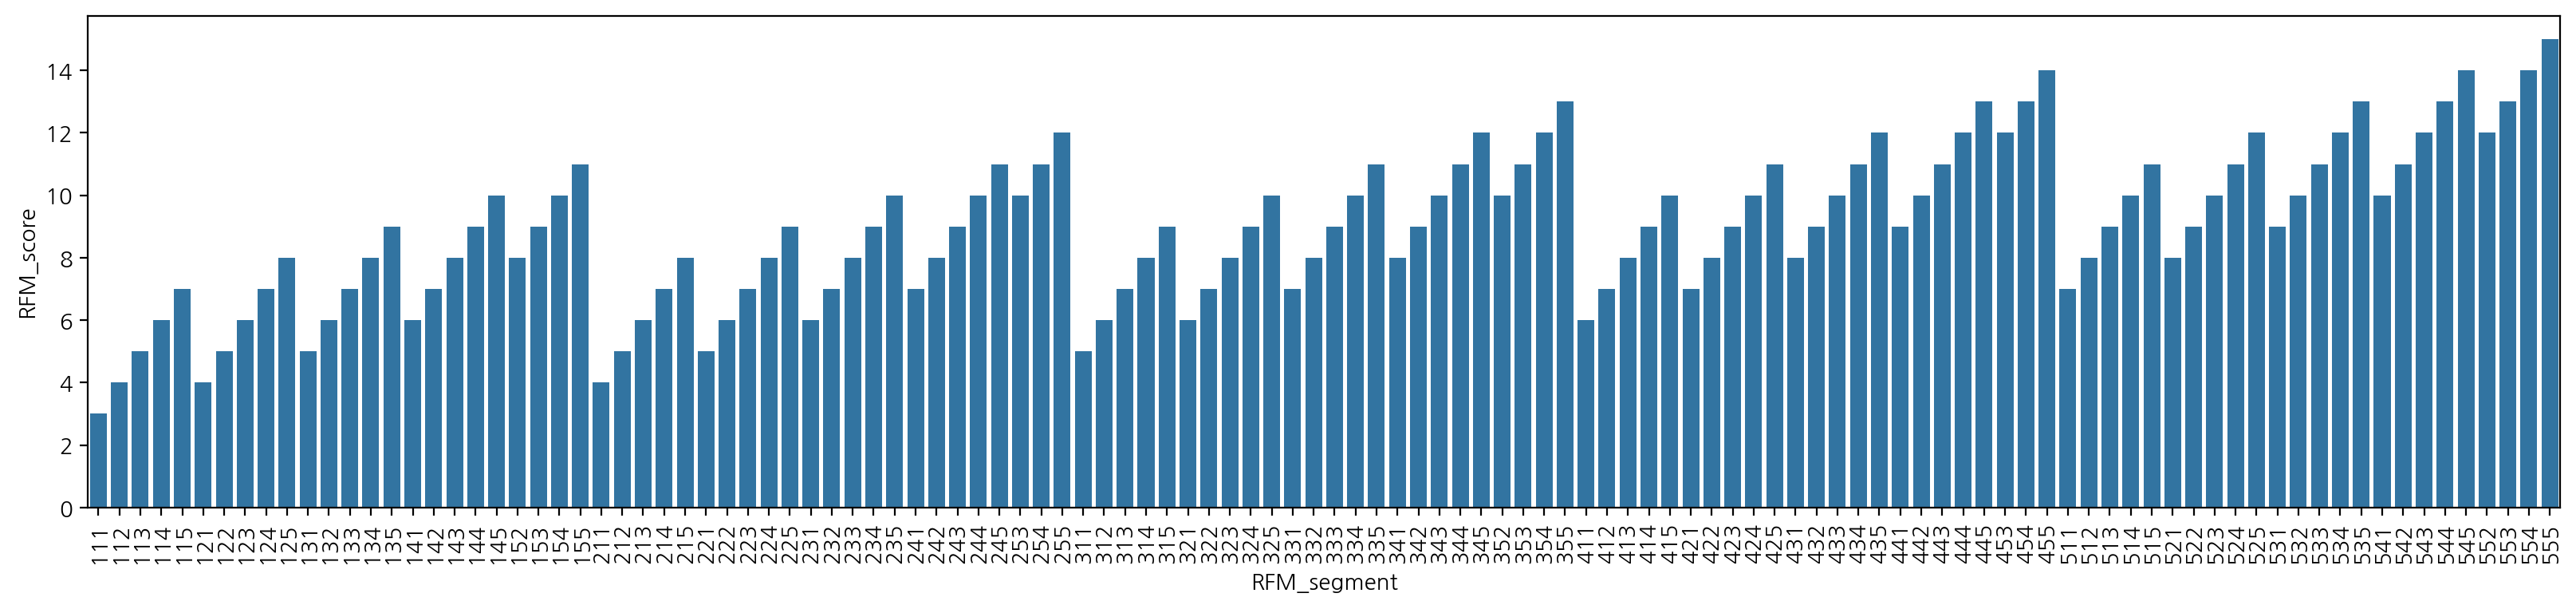

In [139]:
# RFM segment 값에 따라 정렬합니다.
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 90)
sns.barplot(data = rfm.sort_values("RFM_segment"), x="RFM_segment", y = "RFM_score")

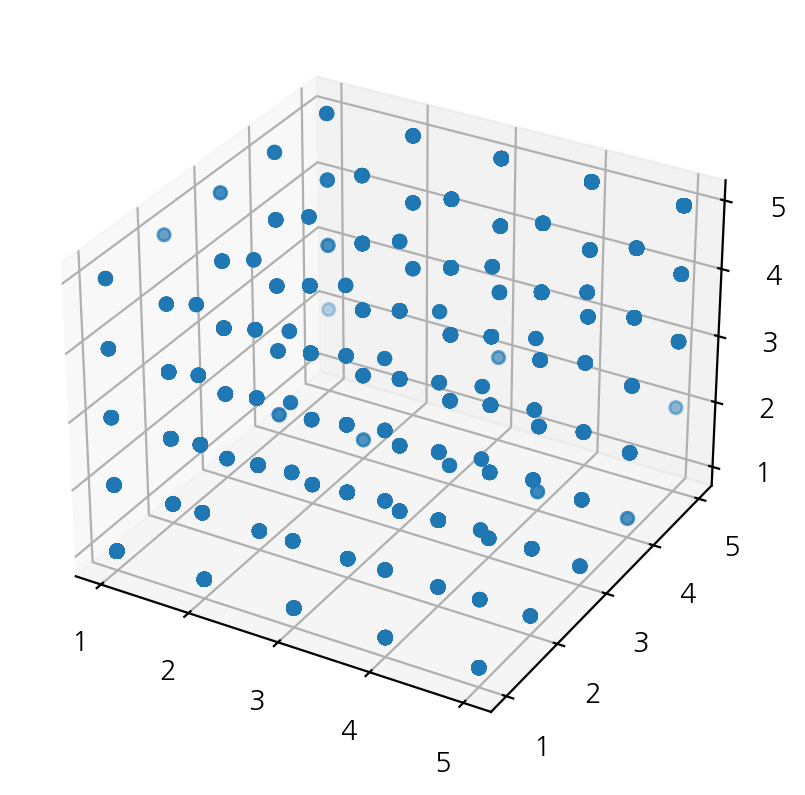

In [140]:
# 3d projection ax.scatter3D 
ax = plt.axes(projection = "3d")
ax.scatter3D(rfm['R'], rfm['F'], rfm['M'])

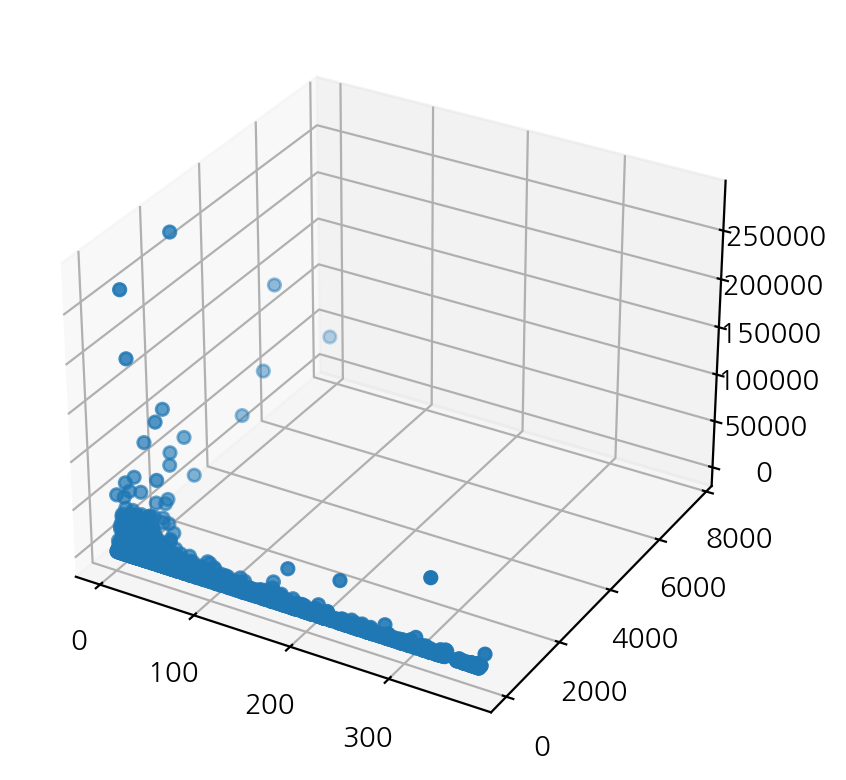

In [141]:
# 원래 값
ax = plt.axes(projection = "3d")
ax.scatter3D(rfm['Recency'], rfm['Frequency'], rfm['MonetaryValue'])

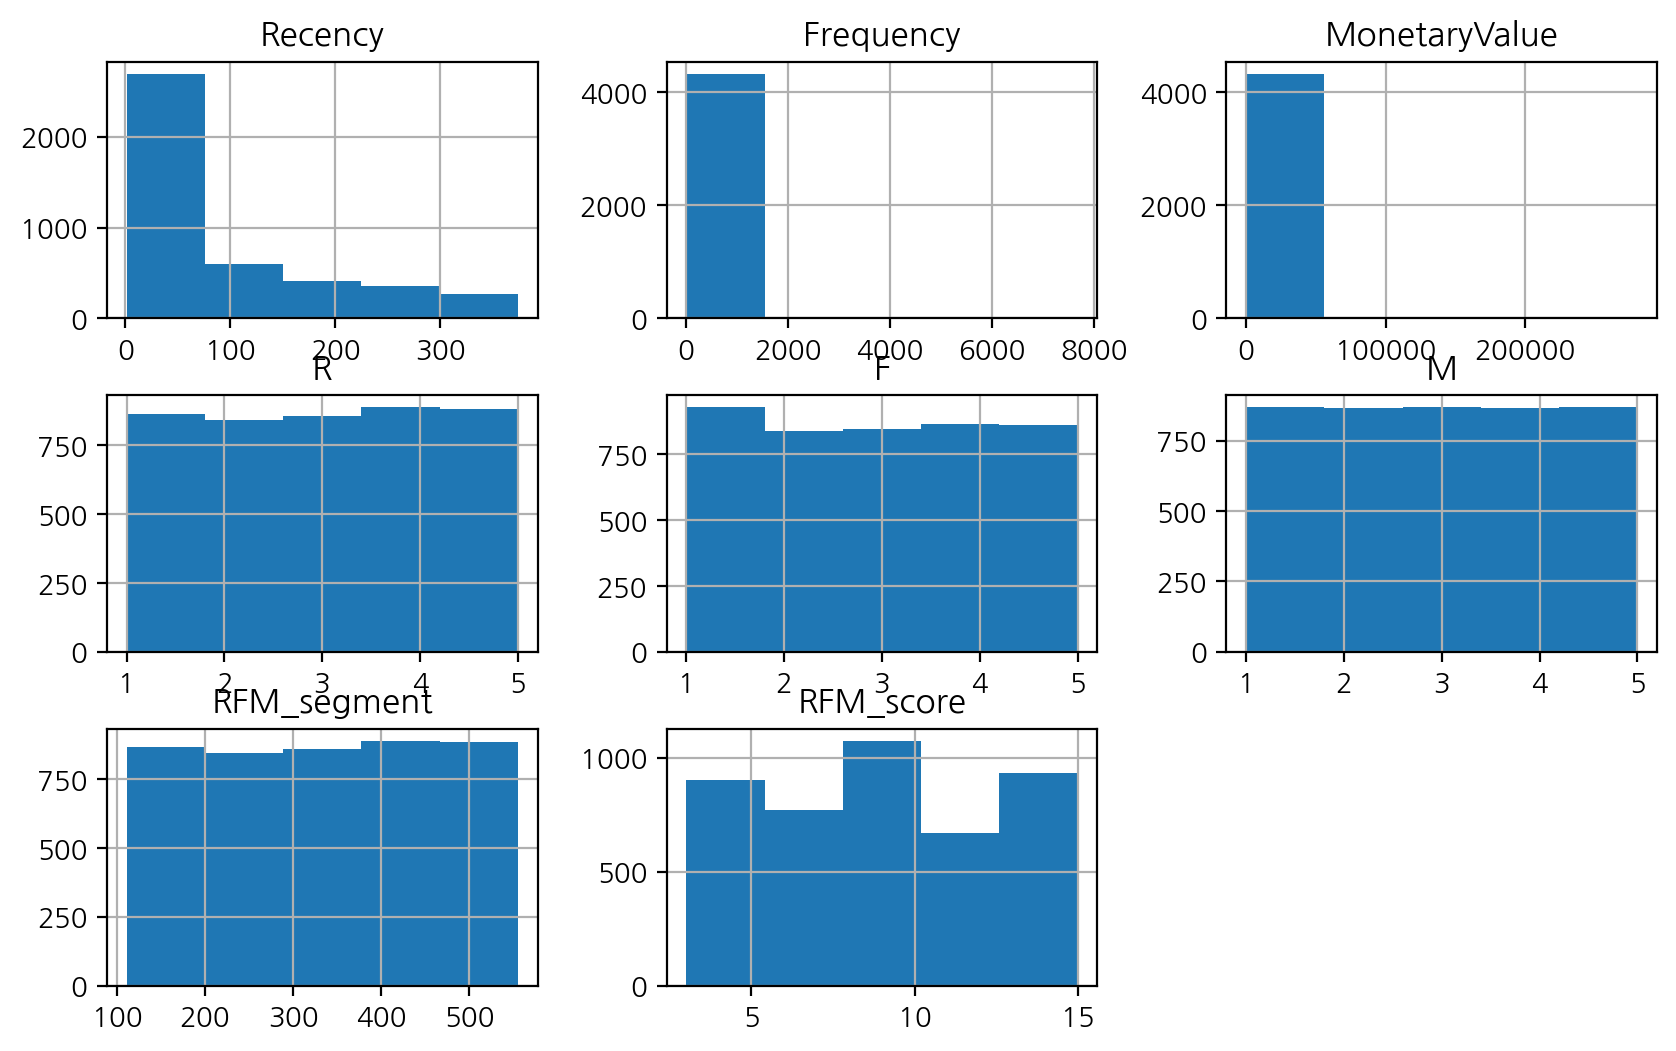

In [145]:
rfm.astype(int).hist(bins = 5, figsize = (10, 6));

In [151]:
# 실제값과 rfm score 비교
rfm.groupby("RFM_score").agg({"Recency":"mean",
                            "Frequency": "mean",
                            "MonetaryValue" : ["mean","sum"]
}).style.background_gradient().format("{:,.0f}")

In [152]:
# qcut을 통해 3단계로 "silver", "gold", "platinum" 고객군을 나눕니다.
rfm

Recency  Frequency  MonetaryValue  R  F  M RFM_segment  RFM_score
CustomerID                                                                   
12346.0         326          1       77183.60  1  1  5         115          7
12347.0           2        182        4310.00  5  5  5         555         15
12348.0          75         31        1797.24  2  3  4         234          9
12349.0          19         73        1757.55  4  4  4         444         12
12350.0         310         17         334.40  1  2  2         122          5
...             ...        ...            ... .. .. ..         ...        ...
18280.0         278         10         180.60  1  1  1         111          3
18281.0         181          7          80.82  1  1  1         111          3
18282.0           8         12         178.05  5  1  1         511          7
18283.0           4        721        2045.53  5  5  4         554         14
18287.0          43         70        1837.28  3  4  4         344         11

[4338 rows x 8 columns]

In [154]:
rfm['RFM_class'] = pd.qcut(x = rfm['RFM_score'], q = 3, labels = ["silver", "gold", "platinum"])
rfm

Recency  Frequency  MonetaryValue  R  F  M RFM_segment  RFM_score  \
CustomerID                                                                      
12346.0         326          1       77183.60  1  1  5         115          7   
12347.0           2        182        4310.00  5  5  5         555         15   
12348.0          75         31        1797.24  2  3  4         234          9   
12349.0          19         73        1757.55  4  4  4         444         12   
12350.0         310         17         334.40  1  2  2         122          5   
...             ...        ...            ... .. .. ..         ...        ...   
18280.0         278         10         180.60  1  1  1         111          3   
18281.0         181          7          80.82  1  1  1         111          3   
18282.0           8         12         178.05  5  1  1         511          7   
18283.0           4        721        2045.53  5  5  4         554         14   
18287.0          43         70        1837.28  3  4  4         344         11   

           RFM_class  
CustomerID            
12346.0       silver  
12347.0     platinum  
12348.0         gold  
12349.0     platinum  
12350.0       silver  
...              ...  
18280.0       silver  
18281.0       silver  
18282.0       silver  
18283.0     platinum  
18287.0         gold  

[4338 rows x 9 columns]

In [158]:
# 'RFM_class" 별로 그룹화 하고 "RFM_score"의 describe 값을 구합니다.
rfm.groupby('RFM_class',observed=False )['RFM_score'].describe()

count       mean       std   min   25%   50%   75%   max
RFM_class                                                           
silver     1668.0   5.209832  1.384324   3.0   4.0   5.0   6.0   7.0
gold       1409.0   9.469127  1.114505   8.0   8.0   9.0  10.0  11.0
platinum   1261.0  13.471055  1.124120  12.0  12.0  13.0  14.0  15.0

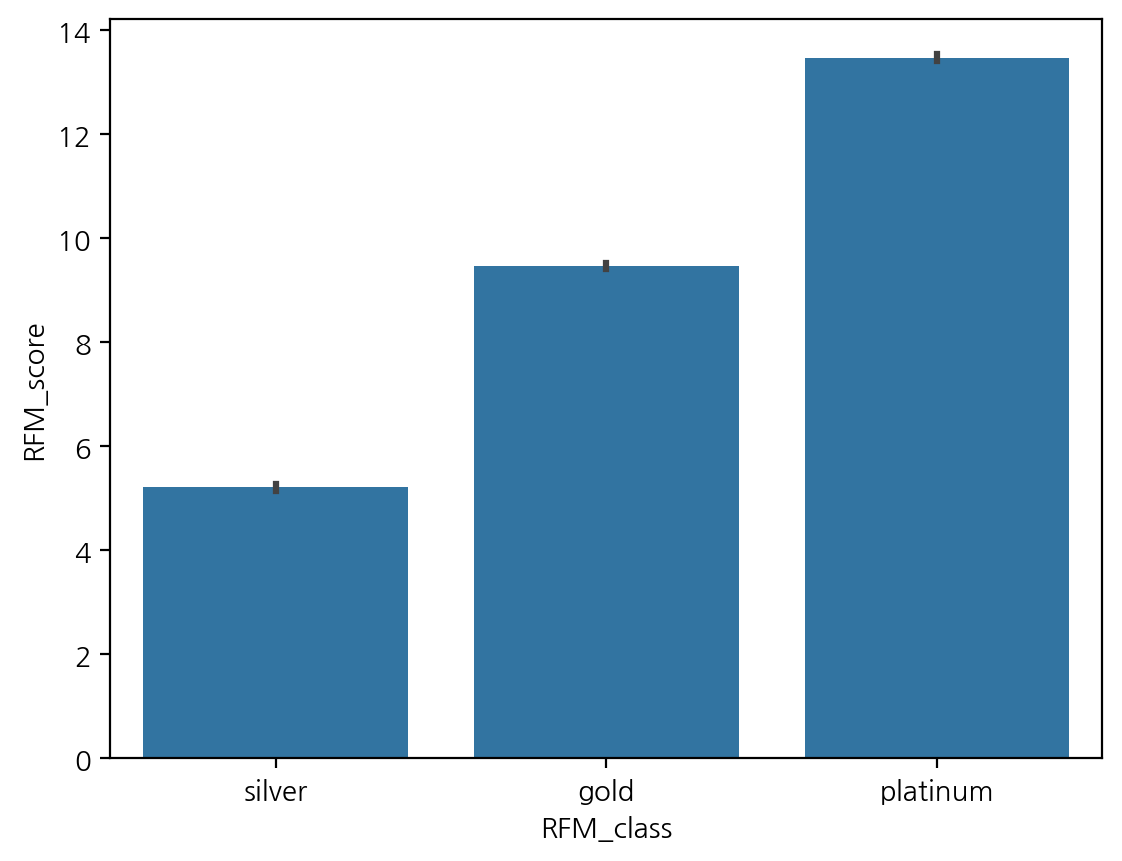

In [160]:
# RFM_class별 평균 RFM_score 나타냅니다.
sns.barplot(data = rfm, x = "RFM_class", y = "RFM_score");

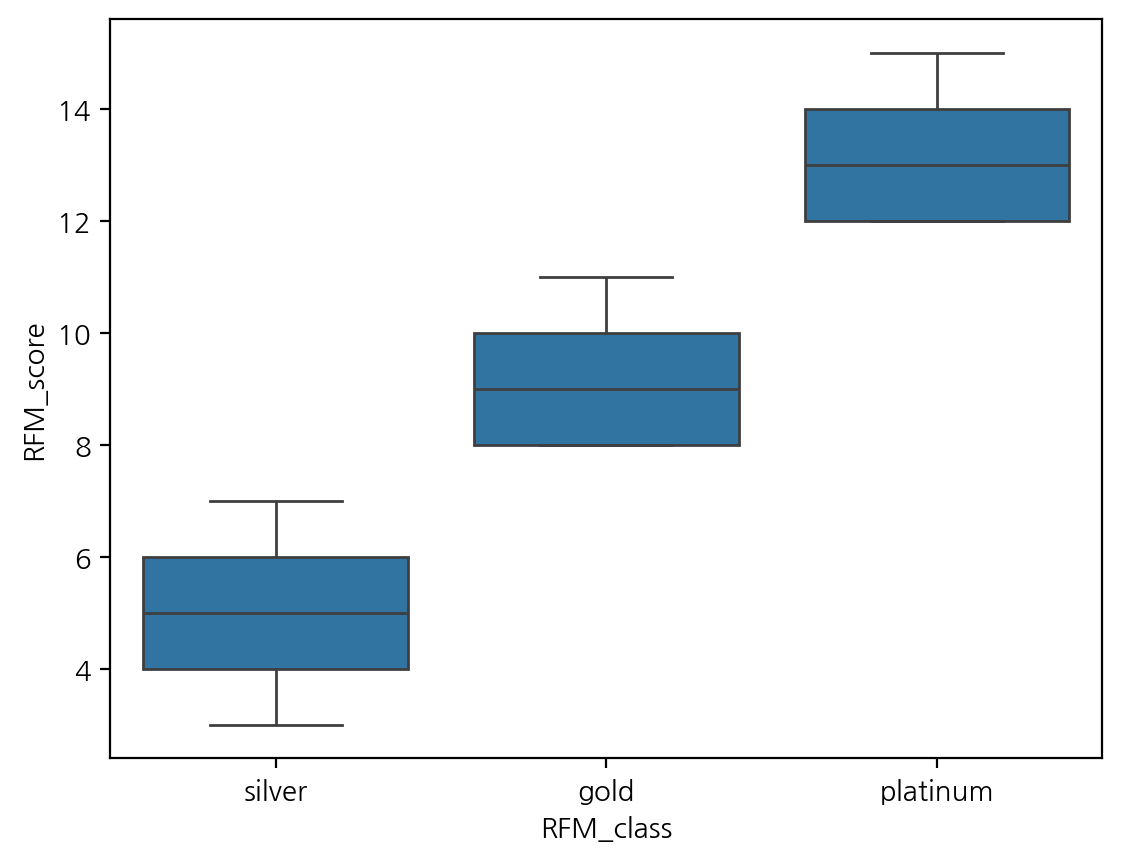

In [163]:
# RFM_class별 평균 RFM_score 나타냅니다.
sns.boxplot(data = rfm, x = "RFM_class", y = "RFM_score");

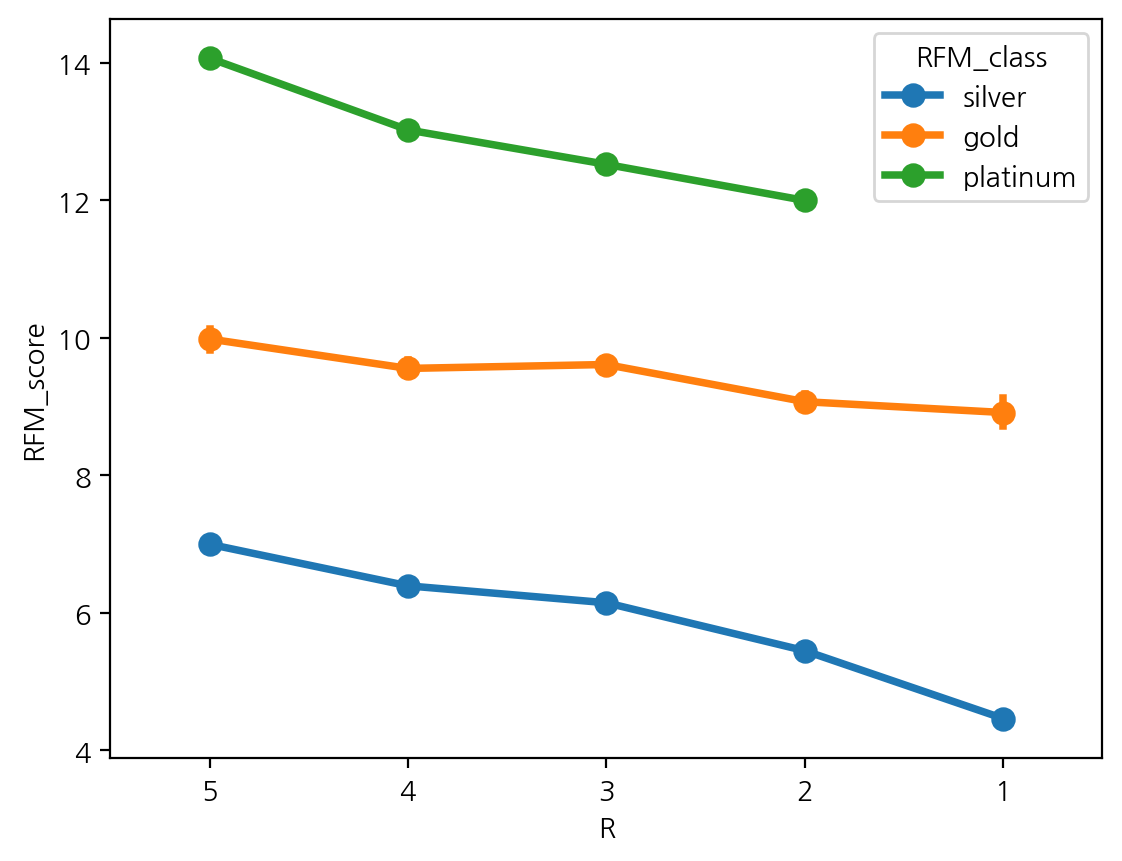

In [165]:
# x=R, hue = RFM_class 별 평균 y=RFM_score 나타냅니다.
# hue 옵션을 사용하면 특정 컬럼을 지정해서 표기할 수 있습니다.
sns.pointplot(data = rfm, x= "R", y = "RFM_score", hue="RFM_class");

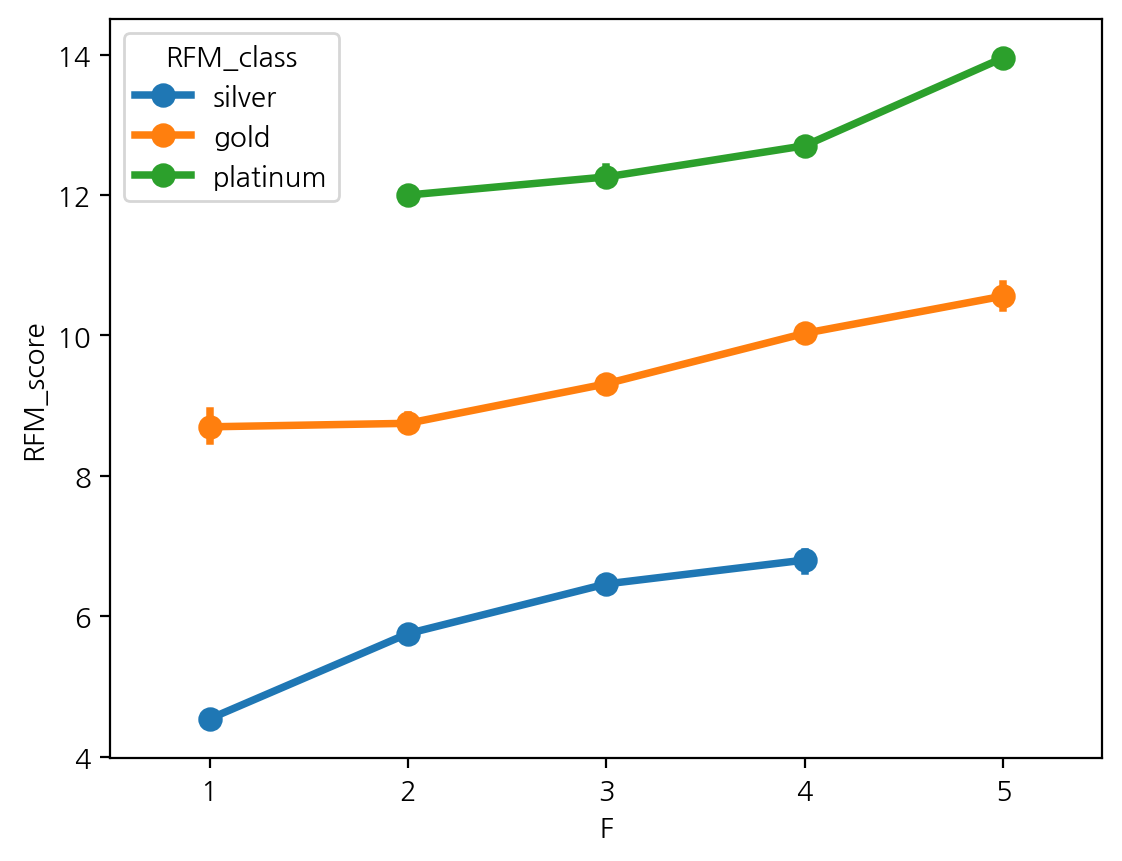

In [167]:
# x = F, hue = RFM_class 별 평균 y=RFM_score 나타냅니다.
sns.pointplot(data = rfm, x= "F", y="RFM_score", hue = "RFM_class");

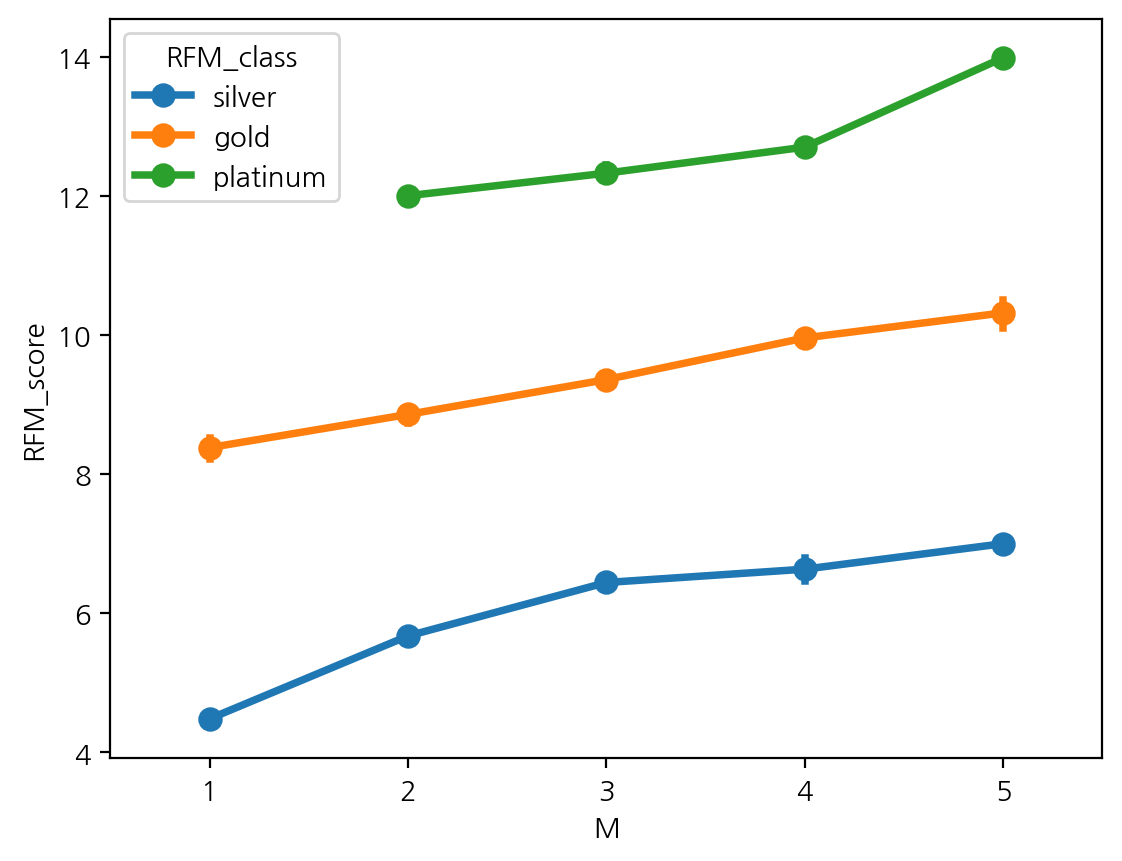

In [168]:
# x = M, hue = RFM_class 별 평균 y=RFM_score 나타냅니다.
sns.pointplot(data = rfm, x= "M", y="RFM_score", hue = "RFM_class");

In [175]:
# "RFM_class"별로 그룹화합니다.
# "Recency", "Frequency"의 평균을 구합니다.
# "MonetaryValue"의 "mean", "sum", "count" 값을 구합니다.
rfm.groupby("RFM_class", observed = False).agg({'Recency':"mean",
                                                "Frequency" : "mean",
                                                "MonetaryValue" : ["mean","sum","count"]
                                                }).style.background_gradient().format("{:,.0f}")

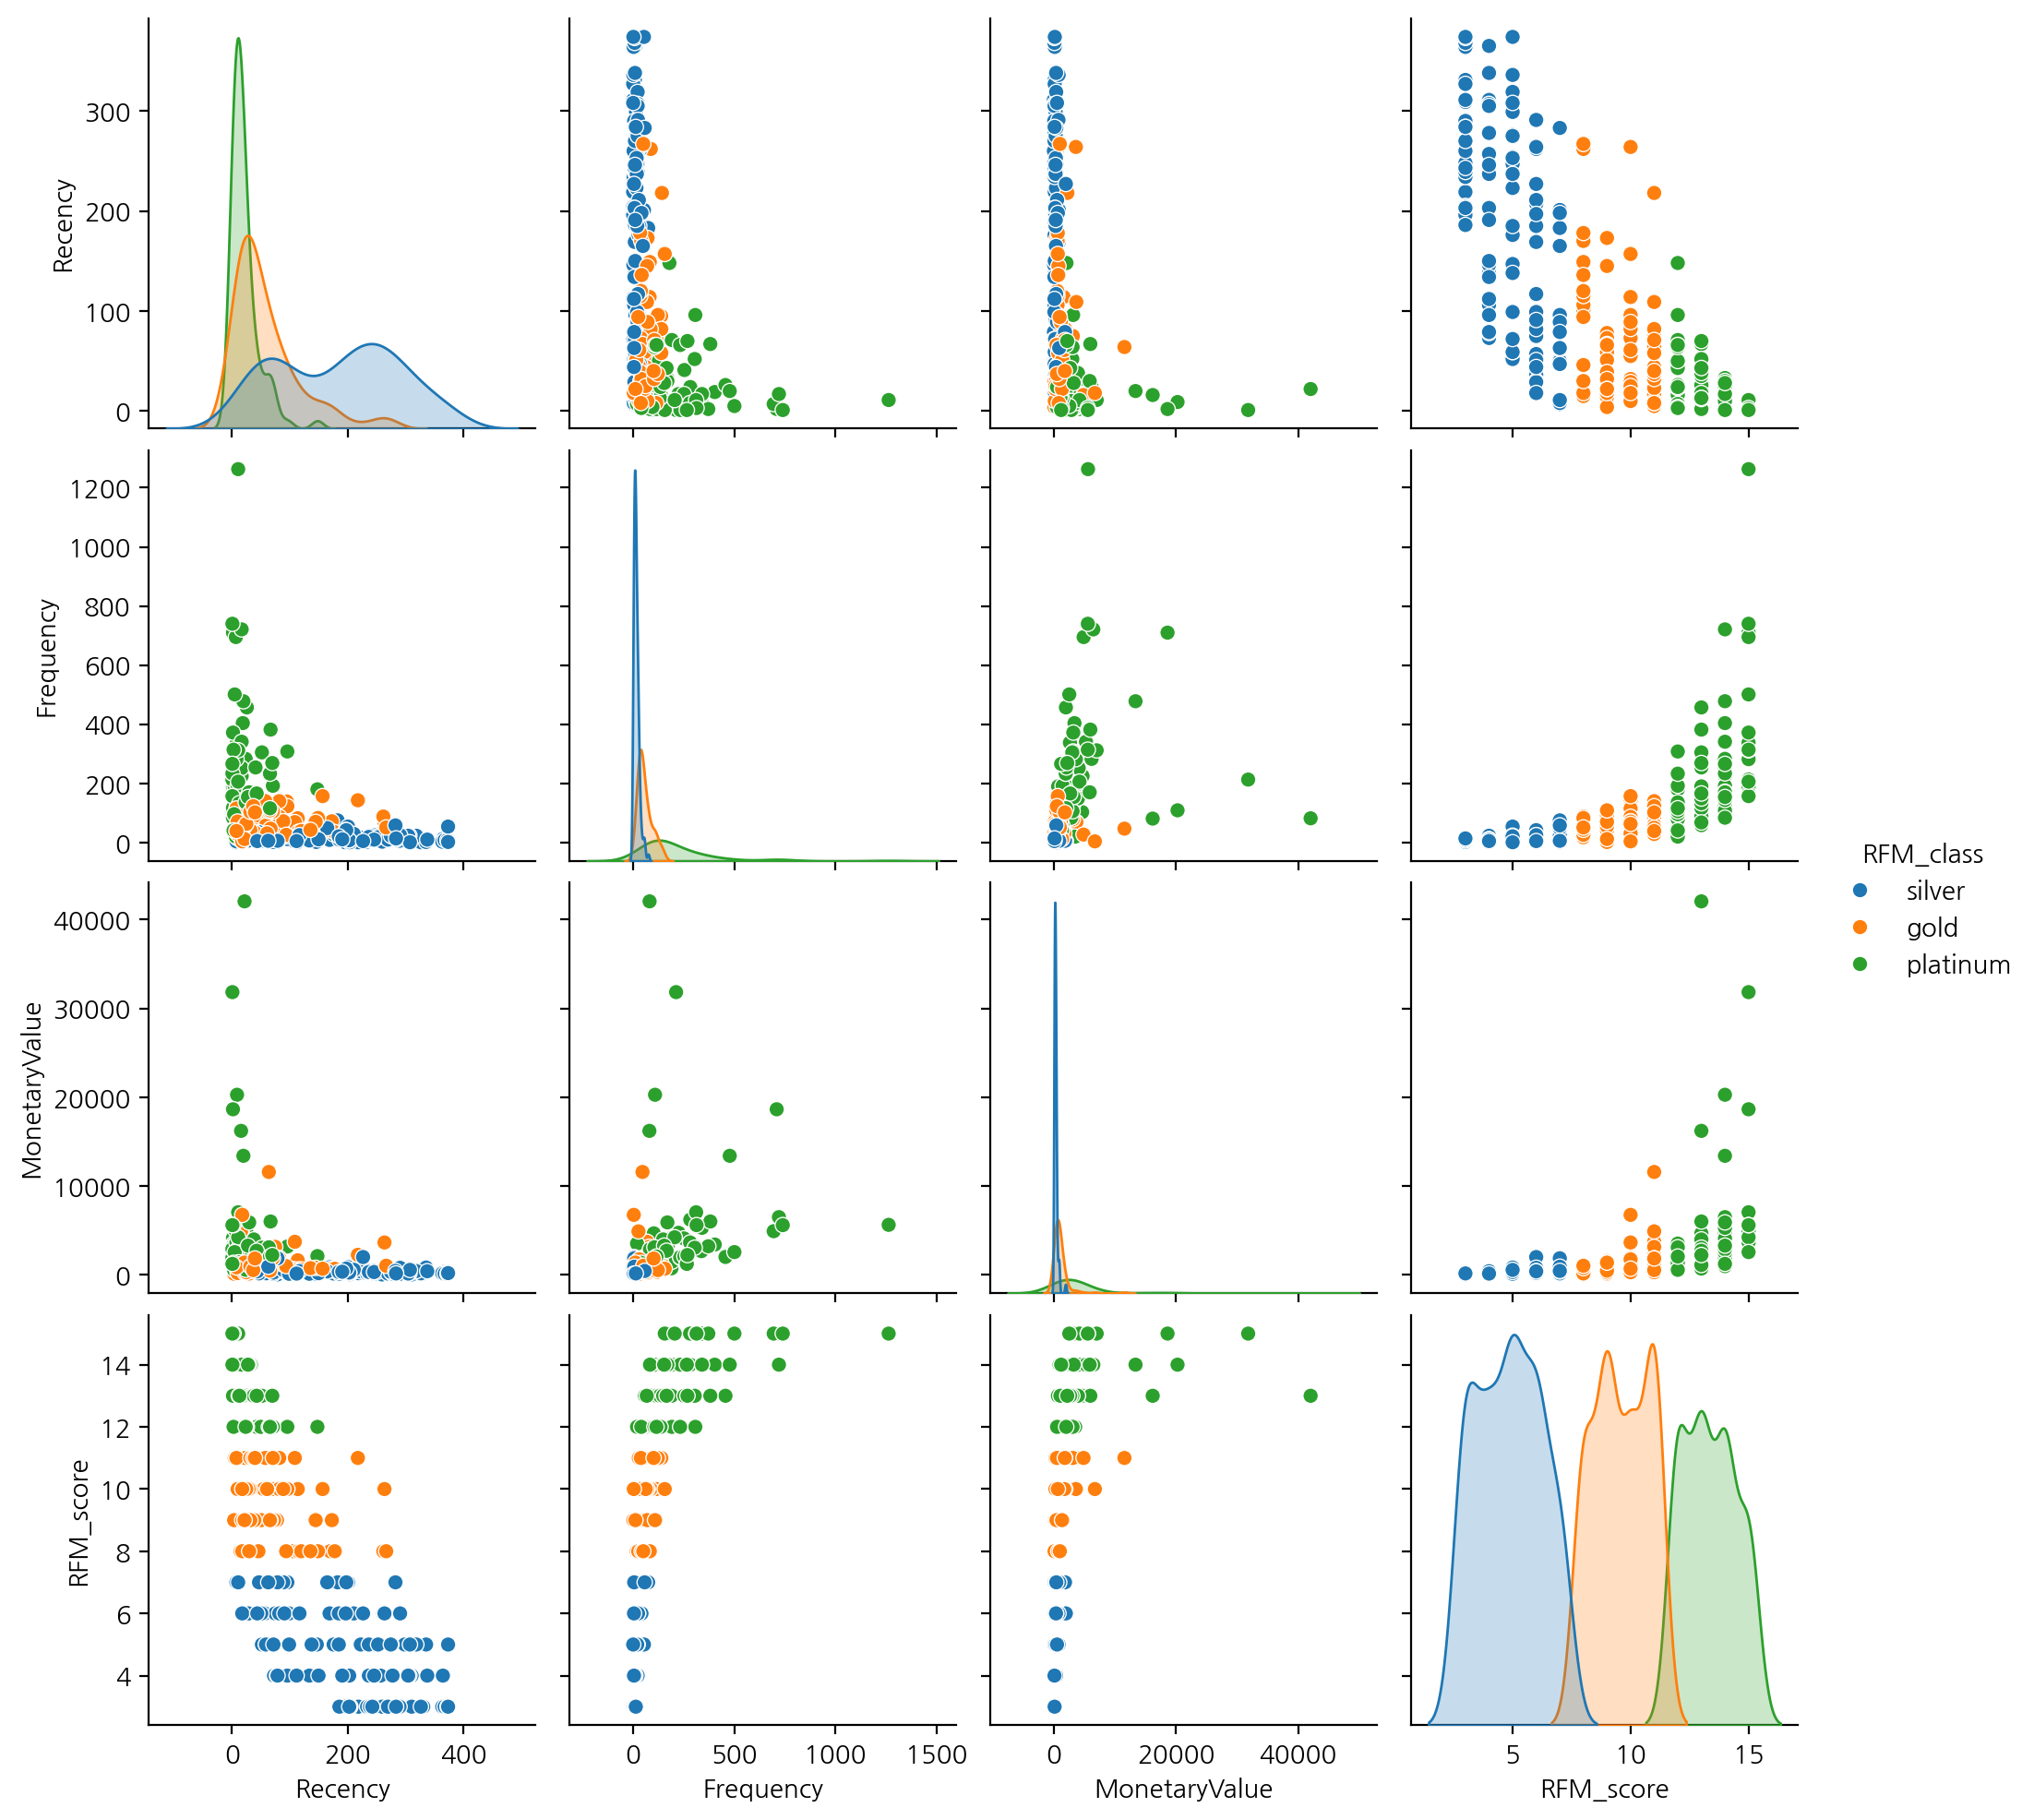

In [177]:
# "RFM_class"별로 분포를 시각화
sns.pairplot(data = rfm.sample(300), hue = "RFM_class")

In [179]:
# 1에 가까울 수록 양의 상관관계, -1에 가까울수록 음의 상관관계를 나타냅니다.
corr = rfm.select_dtypes(include = "number").corr()
corr

Recency  Frequency  MonetaryValue  RFM_score
Recency        1.000000  -0.206618      -0.122937  -0.700621
Frequency     -0.206618   1.000000       0.444920   0.404260
MonetaryValue -0.122937   0.444920       1.000000   0.250433
RFM_score     -0.700621   0.404260       0.250433   1.000000

In [181]:
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

<Axes: >

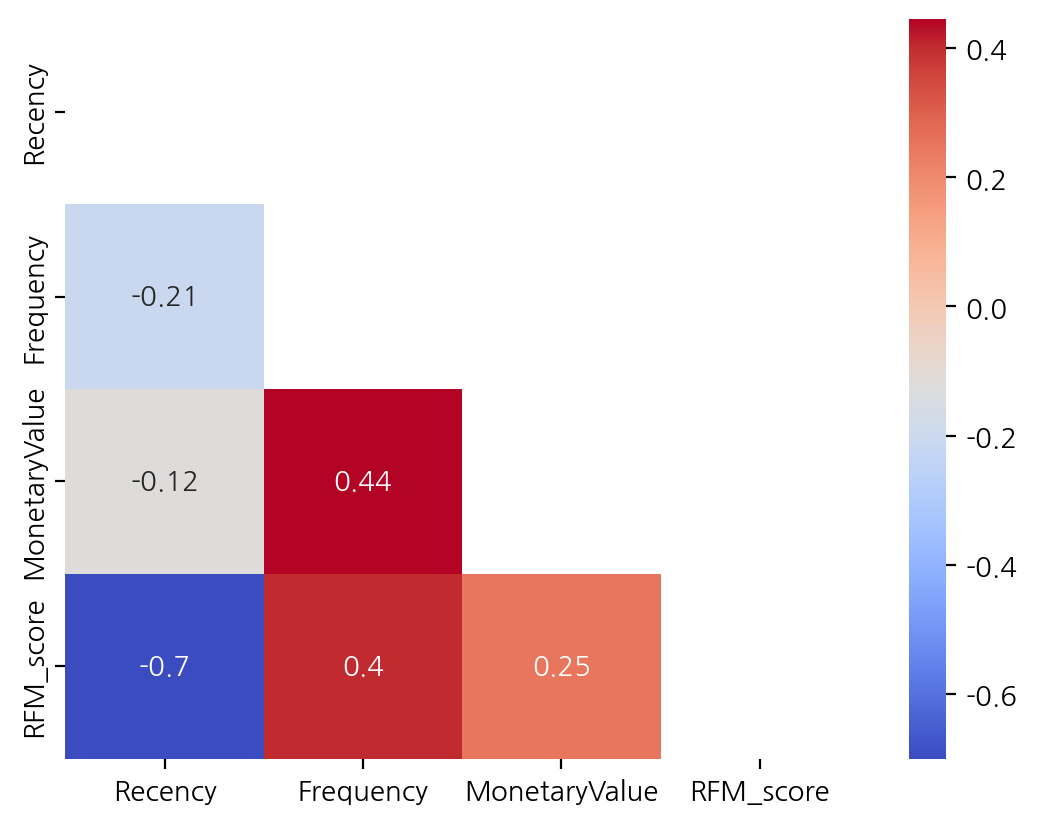

In [182]:
sns.heatmap(corr, annot = True, cmap = "coolwarm", mask = mask)

In [183]:
rfm.to_csv("rfm.csv")

In [184]:
pd.read_csv('rfm.csv')

CustomerID  Recency  Frequency  MonetaryValue  R  F  M  RFM_segment  \
0        12346.0      326          1       77183.60  1  1  5          115   
1        12347.0        2        182        4310.00  5  5  5          555   
2        12348.0       75         31        1797.24  2  3  4          234   
3        12349.0       19         73        1757.55  4  4  4          444   
4        12350.0      310         17         334.40  1  2  2          122   
...          ...      ...        ...            ... .. .. ..          ...   
4333     18280.0      278         10         180.60  1  1  1          111   
4334     18281.0      181          7          80.82  1  1  1          111   
4335     18282.0        8         12         178.05  5  1  1          511   
4336     18283.0        4        721        2045.53  5  5  4          554   
4337     18287.0       43         70        1837.28  3  4  4          344   

      RFM_score RFM_class  
0             7    silver  
1            15  platinum  
2             9      gold  
3            12  platinum  
4             5    silver  
...         ...       ...  
4333          3    silver  
4334          3    silver  
4335          7    silver  
4336         14  platinum  
4337         11      gold  

[4338 rows x 10 columns]